# Pre-processing test datasets

The aim of this notebook is to demonstrate the pre-processing methods used on the 3 test datasets; Gab, Reddit and Twitter. The datasets' length have been reduced to accommodate the text-length requirement in this project. It has been done so to in relation the length of the fine-tuning dataset (maximum length being 100~120). 

The functions used in this notebook have been to reduce the unnecessary noise in the datasets while also attempting to expand the possible contractions in the text. Furthermore, a function to describe the emoji icons in the text, in an attempt to replicate the attempts of Mody et al., (2023). 

In [1]:
#import the necessary modules 
import re
import emoji
import string

# Function to remove multiple spaces
def remove_multiple_spaces(text):
    return re.sub(r'\s+', ' ', text)

# Function to remove hyperlinks
def remove_hyperlinks(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Function to remove user mentions (starting with '@')
def remove_user_mentions(text):
    return re.sub(r'@\w+', '', text)

# Function to remove emojis
def emoji2description(text):
    return emoji.replace_emoji(text, replace=lambda chars, data_dict: ' '.join(data_dict['en'].split('_')).strip(':'))

# Function to remove emoticons converted to text

# Function to remove new line characters
def remove_new_lines(text):
    return re.sub(r'\n', '', text)

def date_and_time(text):
    # Remove date
    text_without_date = re.sub(date_pattern, '', text)
    
    # Remove time
    text = re.sub(time_pattern, '', text_without_date)
    
    return text

def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')
    text = text.replace("-*-*-*-",'')
    text = text.replace("/",'')
    text = text.replace("[",'')
    text = text.replace("]",'')
    text = text.replace("<>",'')

    return text

def remove_symbols(text):
    # Define the regular expression pattern to match symbols
    symbol_pattern = r'[^\w\s]'
    # Use re.sub() to replace symbols with an empty string
    clean_text = re.sub(symbol_pattern, '', text)
    return clean_text

#https://www.kaggle.com/code/soumyakushwaha/ethicalcommunicationai

#to further clean the text with any missed out symbols
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

#to replace profanities 
def replace_profanities_with_regex(text, profanities_list):
    # Function definition (same as before)
    for profanity in profanities_list:
        # The regex pattern uses \b to match whole words and ignores case with re.IGNORECASE
        pattern = r'\b' + re.escape(profanity) + r'\b'
        # Replace the profanity with its correct spelling
        text = re.sub(pattern, profanity.upper(), text, flags=re.IGNORECASE)
    return text

#to expand contractions using a contraction dictionary provided 
def expand_contractions(text, contraction_dict):
    escaped_contractions = {re.escape(k): v for k, v in contraction_dict.items()}

    # The regex pattern searches for contractions with word boundaries
    pattern = re.compile(r'\b(?:' + '|'.join(escaped_contractions.keys()) + r')\b')

    # Replace contractions with their expanded forms using a lambda function
    expanded_text = pattern.sub(lambda match: contraction_dict.get(match.group(0), match.group(0)), text)

    return expanded_text


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Reddit 

In [3]:
data_path ="https://raw.githubusercontent.com/nacho1907/Bases/main/Reddit/reddit_comments.json"
comments = pd.read_json(data_path, encoding='utf8')
print(comments.columns)
comments

Index(['_replies', 'id', 'total_awards_received', 'approved_at_utc',
       'comment_type', 'edited', 'mod_reason_by', 'banned_by',
       'author_flair_type', 'removal_reason', 'link_id',
       'author_flair_template_id', 'likes', 'user_reports', 'saved',
       'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 'no_follow',
       'author', 'can_mod_post', 'created_utc', 'send_replies', 'parent_id',
       'score', 'author_fullname', 'approved_by', 'mod_note', 'all_awardings',
       'subreddit_id', 'body', 'awarders', 'author_flair_css_class', 'name',
       'author_patreon_flair', 'downs', 'author_flair_richtext',
       'is_submitter', 'body_html', 'gildings', 'collapsed_reason',
       'distinguished', 'associated_award', 'stickied', 'author_premium',
       'can_gild', 'top_awarded_type', 'author_flair_text_color',
       'score_hidden', 'permalink', 'num_reports', 'locked', 'report_reasons',
       'created', 'subreddit', 'author_flair_text', 'treatment_tags',
       '

,_replies,id,total_awards_received,approved_at_utc,comment_type,edited,mod_reason_by,banned_by,author_flair_type,removal_reason,...,collapsed,subreddit_name_prefixed,controversiality,author_flair_background_color,collapsed_because_crowd_control,mod_reports,subreddit_type,ups,is_hate,author_cakeday
0,[],e8q18lf,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/KotakuInAction,0,,NaN,[],public,4,1.0,NaN
1,[],e8q9w5s,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/KotakuInAction,0,,NaN,[],public,20,0.0,NaN
2,[],e8qbobk,0,NaN,NaN,0,NaN,NaN,NaN,NaN,...,False,r/KotakuInAction,0,,NaN,[],public,11,0.0,NaN
3,[],e8qfn91,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/KotakuInAction,0,,NaN,[],public,9,0.0,NaN
4,[],e84rl2i,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/KotakuInAction,0,None,NaN,[],public,406,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18865,[],dwp8jut,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/pussypassdenied,0,None,NaN,[],public,2,1.0,NaN
18866,[],e76148j,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/KotakuInAction,0,None,NaN,[],public,-4,1.0,NaN
18867,[],e76uzdz,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/KotakuInAction,0,None,NaN,[],public,5,0.0,NaN
18868,[],e772r42,0,NaN,NaN,0,NaN,NaN,text,NaN,...,False,r/KotakuInAction,0,None,NaN,[],public,0,0.0,NaN


In [4]:
comments2 = comments.dropna(subset=["is_hate"])
comments3 = comments2[['body','is_hate']].copy() #create a copy of the dataset 
comments3.head()

,body,is_hate
0,A subsection of retarded Hungarians? Ohh boy. ...,1.0
1,Hiii. Just got off work. 444 is mainly the typ...,0.0
2,wow i guess soyboys are the same in every country,0.0
3,Owen Benjamin's soyboy song goes for every cou...,0.0
4,wouldn't the defenders or whatever they are as...,1.0


In [5]:
comments3['body']=comments3['body'].astype('string')#convert data type to string
comments3['is_hate']= comments3['is_hate'].astype('int') #convert label type to integer 


In [6]:
comments3 = comments3.rename(columns={'body':'Content','is_hate':'Label'}) #rename to align with column names used in the training dataset 

In [7]:
comments3

,Content,Label
0,A subsection of retarded Hungarians? Ohh boy. ...,1
1,Hiii. Just got off work. 444 is mainly the typ...,0
2,wow i guess soyboys are the same in every country,0
3,Owen Benjamin's soyboy song goes for every cou...,0
4,wouldn't the defenders or whatever they are as...,1
...,...,...
18865,"OP, stop being a faggot and post videos next t...",1
18866,"In this 20 minute long video, Top Hate and Cha...",1
18867,"No clue whos these e-celebs are, but at this p...",0
18868,"I didn’t insult you, why would you insult me?",0


In [8]:
comments4 = comments3.loc[comments3['Content'].str.len()<=150].copy()
comments4

,Content,Label
0,A subsection of retarded Hungarians? Ohh boy. ...,1
2,wow i guess soyboys are the same in every country,0
3,Owen Benjamin's soyboy song goes for every cou...,0
5,'inclusive' = not white,0
7,"""Oh yeah and that lawsuit? Going to benefit w...",0
...,...,...
18864,"> This relationship i have with you guys, the ...",0
18865,"OP, stop being a faggot and post videos next t...",1
18866,"In this 20 minute long video, Top Hate and Cha...",1
18868,"I didn’t insult you, why would you insult me?",0


In [9]:
comments3.Label.value_counts()

Label
0    14795
1     4065
Name: count, dtype: int64

In [10]:
#to reduce the number of comments 
# Fraction of unique values to maintain
fraction = 0.2

# Shuffle the rows in the DataFrame
shuffled_df = comments4.sample(frac=1, random_state=42)  # Use random_state for reproducibility

# Determine unique values and their counts in the original dataset
unique_values_counts = comments4['Label'].value_counts()

# Calculate the number of rows to extract for each unique value
rows_to_extract = {value: int(count * fraction) for value, count in unique_values_counts.items()}

# Extract the required number of rows for each unique value
comments4 = []

for value, count in rows_to_extract.items():
    rows_with_value = shuffled_df[shuffled_df['Label'] == value]
    comments4.extend(rows_with_value.head(count).values.tolist())

# Create a new DataFrame with the selected rows
comments4 = pd.DataFrame(comments4, columns=shuffled_df.columns)

# Print the new DataFrame with the same fraction of unique values
print(comments4)


                                                Content  Label
0                       That doesn't answer my question      0
1     I see you haven’t been paying attention. How m...      0
2        Do we have a story for this? Totally curious..      0
3                                Mate, that's amazing.       0
4                             but is pizza a sandwich?       0
...                                                 ...    ...
2122     Sjws gotta be political but no one else can be      1
2123  damn makeup, you deceptive. Also, who gets eng...      1
2124  I'm in two minds. Youtube is scummy. EU is act...      1
2125  NNN is pretty dumb, though. Was it started by ...      1
2126  Campaign to remove Mario from all Nintendo gam...      1

[2127 rows x 2 columns]


In [11]:
comments4 = comments4.sample(frac=1, random_state=42) 
comments4.reset_index(drop=True,inplace=True)
comments4.Label.value_counts()

Label
0    1678
1     449
Name: count, dtype: int64

import nltk
from nltk.tokenize import word_tokenize
def preprocess(data): # Apply the preprocessing functions
    text = [remove_multiple_spaces(text) for text in data]
    text = [remove_hyperlinks(text) for text in data]
    text = [remove_user_mentions(text) for text in text]
    text = [emoji2description(text) for text in text]
    text = [remove_new_lines(text) for text in text]
    
    words = [word_tokenize(text) for text in text]
    return text 
print(preprocess(text))

In [12]:
#testing text on the functions defined 
text2 = 'i dont know what this is www.facebook.com 😗😍'

In [13]:
text = remove_multiple_spaces(text2) 
text = remove_hyperlinks(text) 
text = remove_user_mentions(text) 
text = emoji2description(text) 
text = remove_new_lines(text) 

In [14]:
text

'i dont know what this is  kissing facesmiling face with heart-eyes'

In [15]:
#Pre-processing the comments 
variable = comments4['Content'].apply(remove_multiple_spaces)

In [16]:
comments4['Content'] = variable
variable = comments4['Content'].apply(remove_hyperlinks)

In [17]:
comments4['Content'] = variable
variable = comments4['Content'].apply(remove_user_mentions)
variable

0                                             ok, faggot.
1                                               [deleted]
2       Hey at least they aren't trying to hide the fa...
3       >justkiddingallmodsareliterallyhitlerlol Top K...
4       Because mutually beneficial relationships simp...
                              ...                        
2122    One can make a good argument that the sentence...
2123      Did you just have a conversation with yourself?
2124                                            [deleted]
2125    This guy's mad because because someone chose t...
2126                            But muh crony capitalism!
Name: Content, Length: 2127, dtype: object

In [18]:
comments4['Content'] = variable
variable = comments4['Content'].apply(emoji2description)

In [19]:
comments4['Content'] = variable
variable = comments4['Content'].apply(remove_new_lines)

In [20]:
comments4['Content'] = variable
comments4['Content']= comments4['Content'].str.lower()

In [21]:
variable = comments4['Content'].apply(remove_noise_symbols)
comments4['Content'] = variable

In [22]:
variable = comments4['Content'].replace(">",'')
comments4['Content']=variable

In [23]:
variable = comments4['Content'].apply(remove_symbols)
comments4['Content']=variable

In [24]:
#uploading profanity table given from Mody et al(2023)
profanity_df = pd.read_csv('Profanities.csv')

In [25]:
comments4

,Content,Label
0,ok faggot,0
1,deleted,1
2,hey at least they arent trying to hide the fac...,1
3,justkiddingallmodsareliterallyhitlerlol top kek,0
4,because mutually beneficial relationships simp...,1
...,...,...
2122,one can make a good argument that the sentence...,0
2123,did you just have a conversation with yourself,0
2124,deleted,0
2125,this guys mad because because someone chose to...,0


In [26]:
#contraction dictionary from Mody et al.,(2023)
contraction = {
"there's":"there is", 
"v":"", 
"w":"", 
"xb":"", 
"'all":"", 
"'am":"", 
" w8  ":"  wait ", 
" wam  ":"  wait a minute ", 
" wtg  ":"  way to go ", 
" wk  ":"  week ", 
" w/end  ":"  weekend ", 
" wkd  ":"  weekend ", 
" wb  ":"  welcome back ", 
" wbu  ":"  what about you? ", 
" whatcha  ":"  what are you ", 
" wtf  ":"  what the fuck ", 
" wth  ":"  what the heck?", 
" wyd  ":"  what ya doing? ", 
" sup  ":"  what's up? ", 
" wu  ":"  what's up? ", 
" zup  ":"  what's up? ", 
" w@  ":"  what? ", 
" w/e  ":"  whatever ", 
" we  ":"  whatever ", 
" wru@  ":"  where are you at? ", 
" wayf  ":"  where are you from? ", 
" wya  ":"  where you at? ", 
" wuf  ":"  where you from? ", 
" wc  ":"  who cares ", 
" wtm  ":"  who's the man? ", 
" y?  ":"  why? ", 
" w/  ":"  with ", 
" w/o  ":"  without ", 
" wrk  ":"  work ", 
" wah  ":"  working at home ", 
" wiu  ":"  wrap it up ", 
" w/b  ":"  write back ", 
" yarly  ":"  ya, really? ", 
" yhu  ":"  you ", 
" ygg  ":"  you go girl ", 
" ynk  ":"  you never know ", 
" uok  ":"  you ok? ", 
" yolo  ":"  you only live once ", 
" yt  ":"  you there? ", 
" ybs  ":"  you'll be sorry ", 
" y2k  ":"  you're too kind ", 
" uw  ":"  you're welcome ", 
" yw  ":"  you're welcome ", 
" urw  ":"  you're welcome ", 
"b2w":" back to work", 
"daq":" don't ask questions ", 
"  he'd ":" he had  ", 
"  he's ":" he has  ", 
"  he'll ":" he will  ", 
"  how're ":" how are  ", 
"  how'd ":" how had  ", 
"  how've ":" how have  ", 
"  how'll ":" how will  ", 
"idek":" i don't even know", 
"  i'd ":" i had  ", 
"  i've ":" i have  ", 
"ilym":" i love you more", 
"itys":" i told you so", 
"  i'll ":" i will  ", 
"  it'd ":" it had  ", 
"  it's ":" it has  ", 
"  it'll ":" it will  ", 
"nr":" no reserve", 
"  she'd ":" she had  ", 
"  she's ":" she has  ", 
"  she'll ":" she will  ", 
"siuya":" shove it up your ass", 
"  that'd ":" that had  ", 
"  that's ":" that has  ", 
"  that'll ":" that will  ", 
"  there'd ":" there had  ", 
"  there's ":" there has  ", 
"  there'll ":" there will  ", 
"  these're ":" these are  ", 
"  these'd ":" these had  ", 
"  these've ":" these have  ", 
"  these'll ":" these will  ", 
"  they're ":" they are  ", 
"  they'd ":" they had  ", 
"  they've ":" they have  ", 
"  they'll ":" they will  ", 
"  we're ":" we are  ", 
"  we'd ":" we had  ", 
"  we've ":" we have  ", 
"  we'll ":" we will  ", 
"  what're ":" what are  ", 
"  what'd ":" what had  ", 
"  what've ":" what have  ", 
"  what'll ":" what will  ", 
"  when's ":" when is  ", 
"  when'll ":" when will  ", 
"  when'd ":" when would  ", 
"  where'd ":" where had  ", 
"  where's ":" where has  ", 
"  where'll ":" where will  ", 
"  who'd ":" who had  ", 
"  who's ":" who has  ", 
"  who'll ":" who will  ", 
"  why'd ":" why had  ", 
"  why's ":" why has  ", 
"  why'll ":" why will  ", 
"  you're ":" you are  ", 
"  you'd ":" you had  ", 
"  you've ":" you have  ", 
"uttm":" you talking to me?", 
"  you'll ":" you will  ", 
"alot":"a lot", 
"alotta":"a lot of", 
"nwb":"a new person", 
"avsb":"a very special boy", 
"abreev":"abbreviation", 
"abt":"about", 
"'bout":"about", 
"aboot":"about", 
"abwt":"about", 
"bout":"about", 
"bowt":"about", 
"abft":"about fucking time", 
"abt2":"about to", 
"absnt":"absent", 
"abend":"absent by enforced net deprivation", 
"awol":"absent without leave", 
"acgaf":"absolutely couldn't give a fuck", 
"acpt":"accept", 
"aup":"acceptable use policy", 
"acdnt":"accident", 
"aty":"according to you", 
"acc":"account", 
"acct":"account", 
"ack":"acknowledged", 
"awb":"acquaintance with benefits",  
"add":"address", 
"addy":"address", 
"amf":"adios motherfucker", 
"admin":"administrator", 
"aitr":"adult in the room", 
"aos":"adult over shoulder", 
"rodger":"affirmative", 
"roger":"affirmative", 
"roj":"affirmative", 
"n199312":"african american", 
"n1994":"african american", 
"arvo":"afternoon", 
"agn":"again", 
"'gainst":"against", 
"ato":"against the odds", 
"a/l":"age and location", 
"aoc":"age of consent", 
"aoe":"age of empires", 
"aslo":"age sex location orientation", 
"aslop":"age sex location orientation picture", 
"aslr":"age sex location race", 
"asr":"age sex race", 
"ase":"age, sex, ethnicity", 
"asl":"age, sex, location", 
"asln":"age, sex, location, name", 
"aslp":"age, sex, location, picture", 
"a/s/l/r":"age, sex, location, race", 
"aslrp":"age, sex, location, race, picture", 
"a/s/l":"age,sex,location", 
"atab":"ain't that a bitch", 
"aak":"alive and kicking", 
"aatw":"all around the world", 
"adl":"all day long", 
"a4u":"all for you", 
"aiadw":"all in a days work", 
"aml":"all my love", 
"anl":"all night long", 
"aota":"all of the above", 
"aon":"all or nothing", 
"aiight":"all right", 
"alright":"all right",  
"atb":"all the best", 
"atw":"all the way", 
"aight":"alright", 
"'a'ight":"alright", 
"a'ight":"alright", 
"aightz":"alright", 
"aite":"alright", 
"alrite":"alright", 
"alrt":"alright", 
"alryt":"alright", 
"ayte":"alright", 
"i8":"alright", 
"ight":"alright", 
"iigh":"alright", 
"iight":"alright", 
"ite":"alright", 
"anwwi":"alright now where was i", 
"aka":"also known as", 
"a&f":"always and forever", 
"aatf":"always and totally forever", 
"alotbsol":"always look on the bright side of life", 
"m":"am", 
"aimmc":"am i making myself clear ", 
"ain't":"am not", 
"amn't":"am not", 
"amnt":"am not", 
"aoto":"amen on that one", 
"anlsx":"anal sex", 
"n":"and", 
"nd":"and", 
"nal":"and all", 
"aiid":"and if i did", 
"asf":"and so forth", 
"awsic":"and why should i care", 
"aupi":"and your point is", 
"aypi":"and your point is", 
"aoys":"angel on your shoulder", 
"flames":"angry comments", 
"flamer":"angry poster", 
"avgn":"angry video game nerd", 
"anim8":"animate", 
"anon":"anonymous", 
"anuda":"another", 
"apod":"another point of discussion", 
"atfp":"answer the fucking phone", 
"atp":"answer the phone", 
"atq":"answer the question", 
"ne":"any", 
"n e":"any", 
"neday":"any day", 
"adn":"any day now", 
"nedn":"any day now", 
"neida":"any idea", 
"aob":"any other business", 
"nemore":"anymore", 
"ne1":"anyone", 
"any1":"anyone", 
"ny1":"anyone", 
"a1t":"anyone there", 
"a3":"anyplace, anywhere, anytime", 
"nefing":"anything", 
"nethin":"anything", 
"nething":"anything", 
"neway":"anyway", 
"nywy":"anyway", 
"anw":"anyways", 
"anywaz":"anyways", 
"newais":"anyways", 
"neways":"anyways", 
"newayz":"anyways", 
"newez":"anyways", 
"apoc":"apocalypse", 
"app":"application", 
"api":"application program interface", 
"asic":"application specific integrated circuit", 
"appt":"appointment", 
"aprece8":"appreciate", 
"apreci8":"appreciate", 
"ar":"are", 
"r":"are", 
"'re":"are", 
"aren't":"are not", 
"aint":"are not", 
"ain":"are not", 
"aren":"are not", 
"arent":"are not", 
"awty":"are we there yet", 
"ru":"are you", 
"ru18":"are you 18", 
"ruabog":"are you a boy or girl", 
"ruagoab":"are you a girl or a boy", 
"ayagob":"are you a girl or boy", 
"yite":"are you all right?", 
"rua":"are you alone", 
"rubz2nt":"are you busy tonight", 
"ayd":"are you done", 
"aydy":"are you done yet", 
"audy":"are you done yet?", 
"ayfr":"are you for real", 
"ayfk":"are you fucking kidding", 
"ayfkm":"are you fucking kidding me", 
"rufkm":"are you fucking kidding me", 
"aufm":"are you fucking mental", 
"ayfs":"are you fucking serious", 
"aufsm":"are you fucking shiting me", 
"rugay":"are you gay", 
"aygs":"are you going somewhere", 
"rugta":"are you going to answer", 
"ruh":"are you horny", 
"ayk":"are you kidding", 
"aykm":"are you kidding me", 
"rukm":"are you kidding me", 
"rul8":"are you late", 
"ayl":"are you listening", 
"rumf":"are you male or female", 
"aymf":"are you my friend", 
"ruok":"are you ok?", 
"ruk":"are you ok?", 
"ayok":"are you okay", 
"rur":"are you ready", 
"ayrft":"are you ready for tomorrow ", 
"ays":"are you serious", 
"aysm":"are you shitting me?", 
"rys":"are you single", 
"ayst":"are you still there", 
"ayt":"are you there", 
"rut":"are you there", 
"aytf":"are you there fucker", 
"ayty":"are you there yet", 
"ruwm":"are you watching me", 
"fankle":"area between foot and ankle", 
"rnt":"aren't", 
"'round":"around", 
"arnd":"around", 
"ai":"artificial intelligence", 
"aabf":"as a best friend", 
"aaf":"as a friend", 
"amof":"as a matter of fact", 
"aamof":"as a matter of fact", 
"aeap":"as early as possible", 
"afaiaa":"as far as i am aware", 
"afaicr":"as far as i can remember", 
"afaicr4":"as far as i can remember for", 
"afaics":"as far as i can see", 
"afaict":"as far as i can tell", 
"afaik":"as far as i know", 
"afair":"as far as i recall", 
"afaiu":"as far as i understand", 
"afaic":"as far as i'm concerned", 
"aiui":"as i understand it", 
"aiws":"as i was saying", 
"sif":"as if", 
"aiic":"as if i care", 
"sifn't":"as if not", 
"alaylm":"as long as you love me", 
"alaytm":"as long as you tell me", 
"amap":"as much as possible", 
"apu":"as per usual", 
"aqap":"as quick as possible", 
"asafp":"as soon as fucking possible", 
"asaik":"as soon as i know", 
"asap":"as soon as possible", 
"ayw":"as you wish", 
"azn":"asian", 
"ama":"ask me anything", 
"amiigaf":"ask me if  i give a fuck", 
"amiic":"ask me if i care", 
"ams":"ask me something", 
"amsp":"ask me something personal", 
"a2a":"ask to answer", 
"a$$":"ass", 
"arse":"ass", 
"azz":"ass", 
"ah":"ass hole", 
"af":"assface", 
"ahole":"asshole", 
"ashl":"asshole", 
"ashole":"asshole", 
"asshle":"asshole", 
"azhol":"asshole", 
"ajax":"asynchronous javascript and xml", 
"ateotd":"at the end of the day", 
"atm":"at the moment", 
"atst":"at the same time", 
"attotp":"at the time of this post", 
"atop":"at time of posting", 
"ayec":"at your earliest convenience", 
"ayor":"at your own risk", 
"atl":"atlanta", 
"attn":"attention", 
"adhd":"attention deficit hyperactivity disorder", 
"avie":"avatar", 
"avtr":"avatar", 
"avvie":"avatar", 
"avy":"avatar", 
"a7x":"avenged sevenfold", 
"av7x":"avenged sevenfold", 
"ayc":"awaiting your comments", 
"afc":"away from computer", 
"afcpmgo":"away from computer parents may go on", 
"afg":"away from game", 
"afk":"away from keyboard", 
"afkb":"away from keyboard", 
"a/m":"away message", 
"awes":"awesome", 
"awsm":"awesome", 
"awsome":"awesome", 
"awk":"awkward", 
"bbz":"babes", 
"babi":"baby", 
"bbe":"baby", 
"bbi":"baby", 
"bby":"baby", 
"bebe":"baby", 
"bbg":"baby girl", 
"bilu":"baby i love you", 
"bak":"back", 
"bakk":"back", 
"bck":"back", 
"bk":"back", 
"bau":"back at you", 
"bhwu":"back home with you", 
"biab":"back in a bit", 
"biaf":"back in a few", 
"bitd":"back in the day", 
"btfo":"back the fuck off", 
"b2u":"back to you", 
"bty":"back to you", 
"b/g":"background", 
"bg":"background", 
"bamf":"bad ass mother fucker", 
"bl":"bad luck", 
"b8":"bait", 
"balz":"balls", 
"b&":"banned", 
"bbp":"banned by parents", 
"bnr":"banner", 
"bbbj":"bare back blow job", 
"bol":"barking out loud", 
"bstrd":"bastard", 
"bofh":"bastard operator from hell", 
"bsmfh":"bastard system manager from hell", 
"br":"bathroom", 
"b82rez":"batteries", 
"b8rez":"batteries", 
"b3":"be", 
"baggkyko":"be a good girl, keep your knickers on", 
"bbfu":"be back for you", 
"bbiab":"be back in a bit", 
"bbiaf":"be back in a few", 
"bbifs":"be back in a few seconds", 
"bbialb":"be back in a little bit", 
"bbilb":"be back in a little bit", 
"bbiam":"be back in a minute", 
"bbias":"be back in a second", 
"bbiaw":"be back in a while", 
"bbilfm":"be back in like five minutes", 
"bbim":"be back in minute", 
"bbl":"be back later", 
"bbl8a":"be back later", 
"bblig":"be back later i guess", 
"bbml":"be back much later", 
"bbn":"be back never", 
"bbol":"be back online later", 
"bbq":"be back quick", 
"bbrs":"be back really soon", 
"bbsts":"be back some time soon", 
"bbs":"be back soon", 
"bbt":"be back tomorrow", 
"bbtn":"be back tonite", 
"bbvl":"be back very later", 
"bbwl":"be back way later", 
"bbw":"be back whenever", 
"bbwe":"be back whenever", 
"bbk":"be back, ok?", 
"bmf":"be my friend", 
"bmvp":"be my valentine please", 
"bnol":"be nice or leave", 
"brb":"be right back", 
"brbb":"be right back babe", 
"brbf":"be right back fucker", 
"brbl":"be right back later", 
"brbmf":"be right back mother fucker", 
"brbs":"be right back soon", 
"brbts":"be right back taking shit", 
"brbg2p":"be right back, got to pee", 
"brbigtp":"be right back, i got to pee.", 
"brbn2gbr":"be right back, i need to go to the bathroom", 
"brfb":"be right fucking back", 
"brh":"be right here", 
"brt":"be right there", 
"bcnu":"be seeing you", 
"bcnul8r":"be seeing you later", 
"bsxc":"be sexy", 
"bttyl":"be talking to you later", 
"btias":"be there in a second", 
"bts":"be there soon", 
"bth":"be totally honest", 
"burma":"be undressed ready my angel", 
"bytabm":"beat you to a bloody mess", 
"btsoom":"beats the shit out of me", 
"btfl":"beautiful", 
"'cause":"because", 
"b-cuz":"because", 
"b/c":"because", 
"b/cos":"because", 
"bc":"because", 
"bcoz":"because", 
"bcuz":"because", 
"becuse":"because", 
"becuz":"because", 
"cos":"because", 
"coz":"because", 
"cuz":"because", 
"cuzz":"because", 
"'coz":"because", 
"’cause":"because", 
"’coz":"because", 
"cause":"because", 
"bcurl8":"because you are late.", 
"bn":"been", 
"btdt":"been there done that", 
"btdtgtts":"been there, done that, got the t-shirt", 
"bttt":"been there, tried that", 
"grog":"beer", 
"b4":"before", 
"be4":"before", 
"bae":"before anyone else", 
"b4u":"before you", 
"b4ug":"before you go", 
"b4ul":"before you leave", 
"bng":"being", 
"bleve":"believe", 
"bion":"believe it or not.", 
"bndm3ovr":"bend me over", 
"boati":"bend over and take it", 
"bohic":"bend over here it comes", 
"bohica":"bend over, here it comes again", 
"‘neath":"beneath", 
"bdfl":"benevolent dictator for life", 
"bbf":"best boy friend", 
"bbfs":"best boyfriends", 
"bbwb":"best buddy with boobs", 
"bestie":"best friend", 
"bezzie":"best friend", 
"bffeae":"best friend for ever and ever", 
"bff":"best friend forever", 
"b.f.f.":"best friend forever", 
"bfitww":"best friend in the whole world", 
"bffaw":"best friends for a while", 
"bffa":"best friends for always", 
"bf4e":"best friends for ever", 
"bffene":"best friends for ever and ever", 
"bf4l":"best friends for life", 
"bffl":"best friends for life", 
"bffn":"best friends for now", 
"bf4eva":"best friends forever", 
"bffe":"best friends forever", 
"bffaa":"best friends forever and always", 
"bffae":"best friends forever and ever", 
"bfftddup":"best friends forever till death do us part", 
"bfwb":"best friends with benefits", 
"bfff":"best fucking friend forever", 
"bma":"best mates always", 
"bm4l":"best mates for life", 
"bmfl":"best mates for life", 
"bmfe":"best mates forever", 
"bmttveot":"best mates till the very end of time", 
"bobw":"best of both worlds", 
"brgds":"best regards", 
"betcha":"bet you", 
"bettr":"better", 
"btr":"better", 
"bka":"better known as", 
"blnt":"better luck next time", 
"btcn":"better than chuck norris", 
"'tween":"between", 
"b/t":"between", 
"b/w":"between", 
"btwn":"between", 
"bmay":"between me and you", 
"bm&y":"between you and me", 
"bab":"big ass boobs", 
"bigd":"big deal", 
"bfhd":"big fat hairy deal", 
"bfd":"big fucking deal", 
"bfg":"big fucking gun", 
"bft":"big fucking tits", 
"bmoc":"big man on campus", 
"bpot":"big pair of tits", 
"bwoc":"big woman on campus", 
"bday":"birthday", 
"b'day":"birthday", 
"b-day":"birthday", 
"bd":"birthday", 
"bsx":"bisexual", 
"biwm":"bisexual white male", 
"bt":"bit torrent", 
"b1tch":"bitch", 
"bch":"bitch", 
"beatch":"bitch", 
"beech":"bitch", 
"beeoch":"bitch", 
"beezy":"bitch", 
"beotch":"bitch", 
"betch":"bitch", 
"beyatch":"bitch", 
"beyotch":"bitch", 
"biach":"bitch", 
"biatch":"bitch", 
"bich":"bitch", 
"biotch":"bitch", 
"bish":"bitch", 
"bizatch":"bitch", 
"biznatch":"bitch", 
"biznitch":"bitch", 
"bizzle":"bitch", 
"btch":"bitch", 
"bytch":"bitch", 
"bamofo":"bitch ass mother fucker", 
"bfh":"bitch from hell", 
"bstfu":"bitch shut the fuck up", 
"bm":"bite me", 
"bmha":"bite my hairy ass", 
"blk":"black", 
"blm":"black lives matter", 
"blkm":"black male", 
"bbm":"blackberry messenger", 
"bml":"bless my life", 
"blg":"blog", 
"bleme":"blog meme", 
"bh":"bloody hell", 
"bioya":"blow it out your ass", 
"bsomn":"blowing stuff out my nose", 
"byak":"blowing you a kiss", 
"bj":"blowjob", 
"blj":"blowjob", 
"bljb":"blowjob", 
"blu":"blue", 
"bsod":"blue screen of death", 
"bo":"body odour", 
"bobfoc":"body of baywatch, face of crimewatch", 
"bonr":"boner", 
"bewb":"boob", 
"bewbs":"boobs", 
"bewbz":"boobs", 
"b00t":"boot", 
"bewt":"boot", 
"bord":"bored", 
"brd":"bored", 
"blh":"bored like hell", 
"boomm":"bored out of my mind", 
"btd":"bored to death", 
"biw":"boss is watching", 
"bos":"boss over shoulder", 
"boffum":"both of them", 
"arsed":"bothered", 
"bovered":"bothered", 
"btm":"bottom", 
"boxor":"box", 
"boi":"boy", 
"boyf":"boyfriend", 
"bf":"boyfriend", 
"bf''gf":"boyfriend and girlfriend", 
"bf's":"boyfriends", 
"bfs":"boyfriends", 
"brbbrb":"br right back bath room break", 
"bnib":"brand new in box", 
"brk":"break", 
"buwu":"breaking up with you", 
"baf":"bring a friend", 
"byoc":"bring our own computer", 
"byob":"bring your own beer", 
"byoh":"bring your own high", 
"byow":"bring your own weed", 
"hoopty":"broke down automobile", 
"b0rked":"broken", 
"bb4h":"bros before hoes", 
"brah":"brother", 
"bro":"brother", 
"broseph":"brother", 
"brover":"brother", 
"bruh":"brother", 
"bruhh":"brother", 
"bruv":"brother", 
"bruva":"brother", 
"bfam":"brother from another mother", 
"bilf":"brother i would like to fuck", 
"bros":"brothers", 
"bruz":"brothers", 
"bukket":"bucket", 
"bw3":"buffalo wild wings", 
"bzns":"buisness", 
"b.s.":"bullshit", 
"bs":"bullshit", 
"bfe":"bum fuck egypt", 
"bogsatt":"bunch of guys sitting around the table", 
"bubar":"bushed up beyond all recognition", 
"biz":"business", 
"b2b":"business to business", 
"bizi":"busy", 
"buszay":"busy", 
"bz":"busy", 
"bzy":"busy", 
"bzzy":"busy", 
"bicbw":"but i could be wrong", 
"bisly":"but i still love you ", 
"botoh":"but on the other hand", 
"bwt":"but when though", 
"bykt":"but you knew that", 
"budzecks":"butt sex", 
"butsecks":"butt sex", 
"but6":"buttsex", 
"bogo":"buy one get one", 
"bogof":"buy one get one free", 
"byself":"by myself", 
"btb":"by the by", 
"btfw":"by the fucking way", 
"btw":"by the way", 
"btwilu":"by the way i love you", 
"btwitiailwu":"by the way i think i am in love with you", 
"bwim":"by which i mean", 
" bi":"bye", 
"bai":"bye", 
"bii":"bye", 
"bubi":"bye", 
"bb":"bye bye", 
"bibi":"bye bye", 
"buhbi":"bye bye", 
"byes":"bye bye", 
"bbfn":"bye bye for now", 
"bibifn":"bye bye for now", 
"b4n":"bye for now", 
"bfn":"bye for now", 
"bb4n":"bye-bye for now", 
"cayc":"call at your convenience", 
"cm":"call me", 
"cmitm":"call me in the morning", 
"cml":"call me later", 
"cml8r":"call me later", 
"cmliuw2":"call me later if you want to", 
"cmn":"call me now", 
"cmomc":"call me on my cell", 
"cmcp":"call my cell phone", 
"cmh":"call my house", 
"ctc":"call the cell", 
"cybl":"call you back later", 
"curn":"calling you right now", 
"ctfd":"calm the fuck down", 
"cam":"camera", 
"cn":"can", 
"cicy":"can i call you", 
"cihswu":"can i have sex with you", 
"cihyn":"can i have your number", 
"cubi":"can you believe it", 
"cnt":"cannot", 
"cba":"cannot be arsed", 
"cbb":"cannot be bothered", 
"cbfed":"cannot be fucked", 
"cbfa":"cannot be fucking arsed", 
"cbi":"cannot believe it", 
"cr":"cannot remember", 
"crs":"cannot remember shit", 
"csl":"cannot stop laughing", 
"c/t":"cannot talk", 
"ct":"cannot talk", 
"ctn":"cannot talk now", 
"ctnbos":"cannot talk now boss over shoulder", 
"ctncl":"cannot talk now call later", 
"ctpos":"cannot talk parent over sholder", 
"ctrn":"cannot talk right now", 
"cwtgypo":"cannot wait to get your panties off", 
"cw2cu":"cannot wait to see you", 
"can't":"cannot", 
"cant":"cannot", 
"cantve":"cannot have", 
"cant've":"cannot have", 
"can'tve":"cannot have", 
"can't've":"cannot have", 
"c14n":"canonicalization", 
"cbf":"cannot be fucked", 
"ctpc":"cannot talk parents coming", 
"cap'n":"captain", 
"cptn":"captain", 
"capn":"captain", 
"ctf":"capture the flag", 
"cfas":"care for a secret?", 
"c4ashg":"care for a shag", 
"c2c":"care to chat?", 
"css":"cascading style sheets", 
"cuwul":"catch up with you later", 
"cylbd":"catch ya later baby doll", 
"celly":"cell phone", 
"champs":"champions", 
"cts":"change the subject", 
"ctt":"change the topic", 
"cyff":"change your font, fucker", 
"char":"character", 
"chr":"character", 
"cwyl":"chat with ya later", 
"chk":"check", 
"cfid":"check for identification", 
"cotm":"check out this myspace", 
"peep dis":"check out what i'm telling you", 
"cylor":"check your local orhtodox rabbi", 
"cym":"check your mail", 
"cheezburger":"cheeseburger", 
"chik":"chick", 
"cilf":"child i would like to fuck", 
"cp":"child porn", 
"chillax":"chill and relax", 
"chilax":"chill and relax in one word", 
"ctfo":"chill the fuck out", 
"xoac":"christ on a crutch", 
"xmas":"christmas", 
"cvq":"chucking very quietly", 
"ctm":"chuckle to myself", 
"cancer stick":"cigarette", 
"cig":"cigarette", 
"cowboy choker":"cigarette", 
"zig":"cigarette", 
"cigs":"cigarettes", 
"ccna":"cisco certified network associate", 
"cless":"clanless", 
"cob":"close of business", 
"cye":"close your eyes", 
"cluebie":"clueless newbie", 
"yayo":"cocaine", 
"cawk":"cock", 
"cskr":"cock sucker", 
"cwmaos":"coffee with milk and one sugar", 
"crunk":"combination of crazy and drunk", 
"cmbo":"combo", 
"cb":"come back", 
"cfm":"come fuck me", 
"chswm":"come have sex with me", 
"chswmrn":"come have sex with me right now", 
"chohw":"come hell or high water", 
"cmon":"come on", 
"c'mon":"come on", 
"coiwta":"come on i wont tell anyone", 
"c2":"come to", 
"cwm":"come with me", 
"comin'":"coming", 
"c&c":"command and conquer", 
"cnc":"command and conquer", 
"cmt":"comment", 
"comnt":"comment", 
"c/b":"comment back", 
"cmb":"comment me back", 
"cwd":"comment when done", 
"cmplte":"complete", 
"catwot":"complete and total waste of time", 
"cwot":"complete waste of time", 
"cmplcdd":"complicated", 
"cmptr":"computer", 
"comp":"computer", 
"compy":"computer", 
"cpu":"computer", 
"pooter":"computer", 
"puter":"computer", 
"cis":"computer information science", 
"gratz":"congratulations", 
"cg":"congratulations", 
"congrats":"congratulations", 
"grats":"congratulations", 
"cid":"consider it done", 
"cms":"content management system", 
"contrib":"contribution", 
"contribs":"contributions", 
"ctrl":"control", 
"convo":"conversation", 
"kewl":"cool", 
"ql":"cool", 
"coo":"cool", 
"k3wl":"cool", 
"kewel":"cool", 
"kl":"cool", 
"koo":"cool", 
"kool":"cool", 
"kuhl":"cool", 
"kul":"cool", 
"kuwl":"cool", 
"kwl":"cool", 
"qool":"cool", 
"qoolz":"cool", 
"c4y":"cool for you", 
"clm":"cool like me", 
"clt":"cool like that", 
"cpy":"copy", 
"hiybbprqag":"copying somebody else's search results", 
"copyvio":"copyright violation", 
"cmiiw":"correct me if i am wrong", 
"cood":"could", 
"cud":"could", 
"culd":"could", 
"could've":"could have", 
"coulda":"could have", 
"couldve":"could have", 
"couldn't":"could not", 
"couldn":"could not", 
"couldnt":"could not", 
"ccl":"could not care less", 
"cgad":"could not give a damn", 
"cgaf":"could not give a fuck", 
"couldn't've":"could not have", 
"couldntve":"could not have", 
"couldnt've":"could not have", 
"couldn'tve":"could not have", 
"cuple":"couple", 
"cma":"cover my ass", 
"c.y.a":"cover your ass", 
"ctfu":"cracking the fuck up", 
"crp":"crap", 
"cr8":"crate", 
"cray-cray":"crazy", 
"crzy":"crazy", 
"crazn":"crazy asian", 
"cre8or":"creator", 
"csi":"crime scene investigation", 
"xc":"cross country", 
"xing":"crossing", 
"xover":"crossover", 
"xroads":"crossroads", 
"cmar":"cry me a river", 
"qq":"crying eyes", 
"cmao":"crying my ass off", 
"cmeo":"crying my eyes out", 
"cof":"crying on the floor", 
"cotf":"crying on the floor", 
"col":"crying out loud", 
"cuppa":"cup of", 
"crm":"customer relationship management", 
"c2tc":"cut to the chase", 
"cut3":"cute", 
"kute":"cute", 
"cgf":"cute guy friend", 
"ciwwaf":"cute is what we aim for", 
"qt":"cutie", 
"qte":"cutie", 
"qtpi":"cutie pie", 
"qt3.14":"cutie pie", 
"cmw":"cutting my wrists", 
"cyb":"cyber", 
"cybr":"cyber", 
"cpl":"cyber athlete professional league", 
"cybseckz":"cyber sex", 
"dilf":"dad i would like to fuck", 
"dayum":"damn", 
"dayumm":"damn", 
"dmn":"damn", 
"dammit":"damn it", 
"dtl":"damn the luck", 
"dyac":"damn you auto correct", 
"du2h":"damn you to hell", 
"dy2h":"damn you to hell", 
"dyth":"damn you to hell", 
"ddr":"dance dance revolution", 
"dnimb":"dancing naked in my bra", 
"dotc":"dancing on the ceiling", 
"daresn't":"dare not", 
"dasn't":"dare not", 
"darent":"dare not", 
"daresnt":"dare not", 
"dasnt":"dare not", 
"db":"database", 
"d8":"date", 
"dob":"date of birth", 
"dil":"daughter in law", 
"daii":"day", 
"dod":"day of defeat", 
"dtg":"days to go", 
"ded":"dead", 
"doa":"dead on arrival", 
"d2m":"dead to me", 
"dwi":"deal with it", 
"dwioyot":"deal with it on your own time", 
"dm":"deathmatch", 
"dsided":"decided", 
"defs":"definetly", 
"def":"definitely", 
"dhv":"demonstration of higher value", 
"don":"denial of normal", 
"dos":"denial of service", 
"dept":"department", 
"doypov":"depends on your point of view", 
"dprsd":"depressed", 
"deets":"details", 
"dit":"details in thread", 
"d1ck":"dick", 
"dih":"dick in hand", 
"dh":"dickhead", 
"dikhed":"dickhead", 
"dctnry":"dictionary", 
"didn't":"did not", 
"didn":"did not", 
"didnt":"did not", 
"dnrta":"did not read the article", 
"dnrtfa":"did not read the fucking article", 
"dija":"did you", 
"dju":"did you", 
"dugt":"did you get that?", 
"dygtp":"did you get the picture", 
"duk":"did you know", 
"dyk":"did you know", 
"din":"did not", 
"din't":"did not", 
"didntcha":"did not you", 
"diacf":"die in a car fire", 
"diaf":"die in a fire", 
"diah":"die in a hole", 
"dirl":"die in real life", 
"diez":"dies", 
"diff":"difference", 
"ddl":"direct download", 
"dms":"direct messages", 
"d/c":"disconnected", 
"dc'd":"disconnected", 
"dp":"display picture", 
"ddos":"distributed denial of service", 
"d&c":"divide and conquer", 
"dafs":"do a fucking search", 
"dic":"do i care", 
"diku":"do i know you", 
"diky":"do i know you", 
"dillic":"do i look like i care", 
"dillifc":"do i look like i fucking care", 
"dilligad":"do i look like i give a damn", 
"dilligaf":"do i look like i give a fuck", 
"dilligas":"do i look like i give a shit", 
"diy":"do it yourself", 
"dmaf":"do me a favor", 
"dnd":"do not disturb", 
"dndp":"do not double post", 
"dnk":"do not know", 
"dnw":"do not want", 
"dtrt":"do the right thing", 
"dwud":"do what you do", 
"d'you":"do you", 
"dya":"do you", 
"dycotfc":"do you cyber on the first chat", 
"dugi":"do you get it?", 
"dynm":"do you know me", 
"dylh":"do you like him", 
"dulm":"do you like me", 
"dylos":"do you like oral sex", 
"dylm":"do you love me", 
"dym":"do you mind", 
"dymm":"do you miss me", 
"dynk":"do you not know", 
"ducy":"do you see why", 
"dyw2gwm":"do you want to go with me", 
"dywtmusw":"do you want to meet up some where", 
"dhly":"does he like you", 
"doesn't":"does not", 
"doesn":"does not", 
"doesnt":"does not", 
"d/m":"does not matter", 
"doge":"dog", 
"doin":"doing", 
"doin'":"doing", 
"doin’":"doing", 
"dcw":"doing class work", 
"dns":"domain name system", 
"dnt":"do not", 
"dont":"do not", 
"dun":"do not", 
"damhik":"do not ask me how i know", 
"damhikijk":"do not ask me how i know - i just know", 
"damhikt":"do not ask me how i know this", 
"dadt":"do not ask. don't tell.", 
"dbab":"do not be a bitch", 
"dbafwtt":"do not be a fool wrap the tool", 
"dbg":"do not be gay", 
"dbh":"do not be hating", 
"dbi":"do not beg it", 
"dbeyr":"do not believe everything you read", 
"dbm":"do not bother me", 
"dc":"do not care", 
"dd":"do not die", 
"ddt":"do not do that", 
"degmt":"do not even give me that", 
"detai":"do not even think about it", 
"dftba":"do not forget to be awesome", 
"dfu":"do not fuck up", 
"dfw/m":"do not fuck with me", 
"dfwm":"do not fuck with me", 
"dfc":"do not fucking care", 
"dfwmt":"do not fucking waste my time", 
"dgms":"do not get me started", 
"dgypiab":"do not get your panties in a bunch", 
"dgac":"do not give a crap", 
"dgaf":"do not give a fuck", 
"dgara":"do not give a rats ass", 
"dgas":"do not give a shit", 
"dgu":"do not give up", 
"dg":"do not go", 
"dga":"do not go anywhere", 
"dgoai":"do not go on about it", 
"dgt":"do not go there", 
"dhac":"do not have a clue", 
"dk":"do not know", 
"dn":"do not know", 
"dno":"do not know", 
"donno":"do not know", 
"duno":"do not know", 
"dkdc":"do not know, don't care", 
"dln":"do not look now", 
"dmi":"do not mention it", 
"dmu":"do not mess up", 
"dmwm":"do not mess with me", 
"dmy":"do not mess yourself", 
"dpmo":"do not piss me off", 
"dqydj":"do not quit your day job", 
"dqmot":"do not quote me on this", 
"drc":"do not really care", 
"dsu":"do not screw up", 
"dttm":"do not talk to me", 
"dttml":"do not talk to me loser", 
"dttpou":"do not tell the police on us", 
"dttriaa":"do not tell the riaa", 
"dtb":"do not text back", 
"dts":"do not think so", 
"dta":"do not trust anyone", 
"dtp":"do not type please", 
"dwt":"do not wanna talk", 
"dwmt":"do not waste my time", 
"dwy":"do not wet yourself", 
"d.w":"do not worry", 
"d/w":"do not worry", 
"dw":"do not worry", 
"dwai":"do not worry about it", 
"dwbi":"do not worry about it.", 
"dwbh":"do not worry, be happy", 
"doncha":"do not you", 
"dyec":"do not you ever care", 
"dutma":"do not you text me again", 
"dyt":"do not you think", 
"dyw":"do not you worry", 
"dlibu":"do not let it bother you", 
"dontcha":"do not you", 
"dt":"double team", 
"dvda":"double vaginal, double anal", 
"dwn":"down", 
"dftc":"down for the count", 
"dfw":"down for whatever", 
"d.t.f":"down to fuck", 
"dtf":"down to fuck", 
"dth":"down to hang", 
"d/l":"download", 
"dl":"download", 
"doz":"dozen", 
"drm":"dream", 
"d2t":"drink to that", 
"db4l":"drinking buddy for life", 
"dui":"driving under the influence", 
"dwb":"driving while black", 
"ddg":"drop dead gorgeous", 
"dlf":"dropping like flies", 
"d&df":"drug and disease free", 
"ddf":"drug and disease free", 
"dr00d":"druid", 
"drood":"druid", 
"knackered":"drunk", 
"wazzed":"drunk", 
"d00d":"dude", 
"dewd":"dude", 
"dood":"dude", 
"doodz":"dudes", 
"dum":"dumb", 
"dah":"dumb as hell", 
"dass":"dumb ass", 
"df":"dumb fuck", 
"dfo":"dumb fucking operator", 
"dmba*":"dumbass", 
"dupe":"duplicate", 
"dhcp":"dynamic host configuration protocol", 
"etp":"eager to please", 
"ebitda":"earnings before interest, taxes, depreciation and amortization", 
"ez":"easy", 
"ezy":"easy", 
"ezi":"easy", 
"e4u2s":"easy for you to say", 
"eabod":"eat a bag of dicks", 
"ead":"eat a dick", 
"emp":"eat my pussy", 
"esad":"eat shit and die", 
"esadyffb":"eat shit and die you fat fucking bastard", 
"esl":"eat shit loser", 
"xtc":"ecstasy", 
"edumacation":"education", 
"efct":"effect", 
"skeet":"ejaculate", 
"e-ok":"electronically ok", 
"el!t":"elite", 
"l337":"elite", 
"l33t":"elite", 
"lee7":"elite", 
"leet":"elite", 
"ema":"email address", 
"emm":"email me", 
"epa":"emergency parent alert", 
"mle":"emily", 
"mnm":"eminem", 
"emo":"emotional", 
"mty":"empty", 
"eob":"end of business", 
"eoc":"end of conversation", 
"eod":"end of day", 
"eof":"end of file", 
"eom":"end of message", 
"eos":"end of story", 
"eotw":"end of the world", 
"eot":"end of transmission", 
"eula":"end user license agreement", 
"nme":"enemy", 
"nrg":"energy", 
"njoy":"enjoy", 
"enof":"enough", 
"enuf":"enough", 
"enuff":"enough", 
"nuff":"enough", 
"nv":"envy", 
"ecf":"error carried forward", 
"esc":"escape", 
"eta":"estimated time of arrival", 
"e'en":"even", 
"evn":"even", 
"e'er":"ever", 
"eva":"ever", 
"evaa":"ever", 
"evar":"ever", 
"evr":"ever", 
"eer":"ever", 
"eq":"everquest", 
"evercrack":"everquest", 
"eq2":"everquest2", 
"evry":"every", 
"enat":"every now and then", 
"evry1":"every one", 
"butterface":"every thing is hot but her face", 
"everybody's":"everybody is", 
"ev1":"everyone", 
"every1":"everyone", 
"everyone's":"everyone is", 
"everyones":"everyone is", 
"esbm":"everyone sucks but me", 
"errythang":"everything", 
"errythin":"everything", 
"evrytin":"everything", 
"eg":"evil grin", 
"ex-bf":"ex-boy friend", 
"xbf":"ex-boyfriend", 
"ex-gf":"ex-girl friend", 
"xyz":"examine your zipper", 
"xyzpdq":"examine your zipper pretty darn quick", 
"e.g.":"example", 
"xmpl":"example", 
"xlnt":"excellent", 
"xellent":"excellent", 
"’cept":"except", 
"xcept":"except", 
"xcpt":"except", 
"xpt":"except", 
"xs":"excess", 
"x-i-10":"exciting", 
"xme":"excuse me", 
"xgf":"exgirlfriend", 
"xit":"exit", 
"xpect":"expect", 
"exp":"experience", 
"xp":"experience", 
"guru":"expert", 
"etmda":"explain it to my dumb ass", 
"xplaned":"explained", 
"eil":"explode into laughter", 
"sploits":"exploits", 
"sploitz":"exploits", 
"xqzt":"exquisite", 
"etla":"extended three letter acronym", 
"xtra":"extra", 
"efffl":"extra friendly friends for life", 
"xl":"extra large", 
"x treme":"extreme", 
"xtreme":"extreme", 
"xd":"extreme droll", 
"eleo":"extremely low earth orbit", 
"eyez":"eyes", 
"phag":"fuck", 
"effed":"fucked", 
"fckd":"fucked", 
"fkd":"fucked", 
"fuxored":"fucked", 
"fiic":"fucked if i care", 
"fiik":"fucked if i know", 
"fubah":"fucked up beyond all hope", 
"fubalm":"fucked up beyond all local maintenance", 
"foobar":"fucked up beyond all recognition", 
"fubar":"fucked up beyond all recognition", 
"fubb":"fucked up beyond belief", 
"fubh":"fucked up beyond hope", 
"fubr":"fucked up beyond recognition", 
"fker":"fucker", 
"fukr":"fucker", 
"fuxor":"fucker", 
"phucker":"fucker", 
"figmo":"fuck it - got my orders", 
"fab":"fabulous", 
"f4c3":"face", 
"f2f":"face to face", 
"ftf":"face to face", 
"f.b.":"facebook", 
"fb":"facebook", 
"fbk":"facebook", 
"fcbk":"facebook", 
"faggit":"faggot", 
"fgt":"faggot", 
"phail":"fail", 
"phayl":"fail", 
"ftbfs":"failed to build from source", 
"fbimcl":"fall back in my chair laughing", 
"fofl":"fall on the floor laughing", 
"ffcl":"falling from chair laughing", 
"focl":"falling off chair laughing.", 
"foocl":"falls out of chair laughing", 
"fam":"family", 
"fmir":"family member in room", 
"fnci":"fancy", 
"fol":"farting out loud", 
"fst":"fast", 
"fe":"fatal error", 
"f8":"fate", 
"fav":"favorite", 
"fave":"favorite", 
"ph33r":"fear", 
"ph34r":"fear", 
"phear":"fear", 
"fud":"fear, uncertainty and doubt", 
"feat":"featuring", 
"fpmitap":"federal pound me in the ass prison", 
"foms":"fell off my seat", 
"fotcl":"fell off the chair laughing", 
"f4f":"female for female", 
"f4m":"female for male", 
"poontang":"female genitalia", 
"f2m":"female to male", 
"fov":"field of view", 
"fio":"figure it out", 
"fxp":"file exchange protocol", 
"ftp":"file transfer protocol", 
"pino":"filipino", 
"fitb":"fill in the blank", 
"ffxi":"final fantasy 11", 
"f9":"fine", 
"fi9":"fine", 
"fbtw":"fine be that way", 
"fbm":"fine by me", 
"fwm":"fine with me", 
"fcfs":"first come first served", 
"fifo":"first in, first out", 
"fn":"first name", 
"fps":"first person shooter", 
"fp":"first post", 
"fwp":"first world problems", 
"finna":"fitting to", 
"fiv":"five", 
"fify":"fixed it for you", 
"ftfy":"fixed that for you", 
"fyp":"fixed your post", 
"fotm":"flavour of the month", 
"fsm":"flying spaghetti monster", 
"folo":"follow", 
"fmoig":"follow me on instagram", 
"fft":"food for thought", 
"foo":"fool", 
"fer":"for", 
"ferr":"for", 
"fo`":"for", 
"faic":"for all i care", 
"fao":"for attention of", 
"fcol":"for crying out loud", 
"ffs":"for fuck's sake", 
"ffr":"for future reference", 
"fgs":"for god's sake", 
"fgssu":"for gods sake shut up", 
"floabt":"for lack of a better term", 
"fmi":"for my information", 
"fnar":"for no apparent reason", 
"fnpr":"for no particular reason", 
"fr":"for real", 
"fsr":"for some reason", 
"fashizzle":"for sure", 
"fo shizzle":"for sure", 
"fo sho":"for sure", 
"for sheeze":"for sure", 
"foshizzle":"for sure", 
"fosho":"for sure", 
"fs":"for sure", 
"fsho":"for sure", 
"ftfw":"for the fucking win!", 
"ftk":"for the kill", 
"ftlt":"for the last time", 
"ftl":"for the lose", 
"ftlog":"for the love of god", 
"ftmp":"for the most part", 
"ftmfw":"for the mother fucking win", 
"ftr":"for the record", 
"fttp":"for the time being", 
"ftw":"for the win!", 
"fwiw":"for what it's worth", 
"fya":"for your attention", 
"fye":"for your entertainment", 
"fyeo":"for your eyes only", 
"fyfi":"for your fucking information", 
"fyi":"for your information", 
"fyk":"for your knowledge", 
"fyl":"for your love", 
"fo’c’sle":"forecastle", 
"faa":"forever and always", 
"f&e":"forever and ever", 
"fimh":"forever in my heart", 
"fuhget":"forget", 
"frgt":"forgot", 
"4mer":"former", 
"fka":"formerly known as", 
"fw":"forward", 
"fwd":"forward", 
"fxe":"foxy", 
"frk":"freak", 
"phreak":"freak", 
"friggin":"freaking", 
"ffa":"free for all", 
"f2p":"free to play", 
"f2t":"free to talk", 
"foss":"free, open source software", 
"foia":"freedom of information act", 
"fmao":"freezing my ass of", 
"faq":"frequently asked question", 
"fob":"fresh off the boat", 
"fri.":"friday", 
"dawg":"friend", 
"dogg":"friend", 
"fren":"friend", 
"frnd":"friend", 
"homey":"friend", 
"m8":"friend", 
"whodi":"friend", 
"ffl":"friend for life", 
"foaf":"friend of a friend", 
"ff":"friendly fire", 
"frens":"friends", 
"frnds":"friends", 
"m473s":"friends", 
"m473z":"friends", 
"m8t's":"friends", 
"f4eaa":"friends forever and always", 
"fwb":"friends with benefits", 
"fwob":"friends with occasional benefits", 
"frm":"from", 
"fta":"from the article", 
"ftfa":"from the fucking article", 
"ft2t":"from time to time", 
"fsod":"frosn screen of death", 
"fc":"fruit cake", 
"ef":"fuck", 
"farg":"fuck", 
"fawk":"fuck", 
"fck":"fuck", 
"fcuk":"fuck", 
"feck":"fuck", 
"fk":"fuck", 
"fook":"fuck", 
"fuk":"fuck", 
"fukk":"fuck", 
"fux":"fuck", 
"fvck":"fuck", 
"phuck":"fuck", 
"phuk":"fuck", 
"phux":"fuck", 
"phuxor":"fuck", 
"shag":"fuck", 
"smeg":"fuck", 
"fbgm":"fuck bitches get money", 
"fhrihp":"fuck her right in her pussy", 
"figjam":"fuck i am good, just ask me", 
"fi":"fuck it", 
"fibijar":"fuck it buddy, i am just a reserve", 
"fm":"fuck me", 
"fmb":"fuck me bitch", 
"fmbb":"fuck me baby", 
"fmh":"fuck me hard", 
"fmhb":"fuck me hard bitch", 
"fckm3hdbayb":"fuck me hard baby", 
"fmita":"fuck me in the ass", 
"fmltwia":"fuck me like the whore i am", 
"fmn":"fuck me now", 
"fmnb":"fuck me now bitch", 
"fmnkml":"fuck me now kiss me later", 
"fmq":"fuck me quick", 
"fmr":"fuck me runnig", 
"fmsh":"fuck me so hard", 
"fmth":"fuck me to hell", 
"fmu":"fuck me up", 
"fmup":"fuck me up", 
"fmuta":"fuck me up the ass", 
"fmutp":"fuck me up the pussy", 
"fmah":"fuck my ass hole", 
"fmbo":"fuck my brains out", 
"fmfl":"fuck my fucking life", 
"fmflth":"fuck my fucking life to hell", 
"f.m.l.":"fuck my life", 
"fml":"fuck my life", 
"fmph":"fuck my pussy hard", 
"f/o":"fuck off", 
"fo":"fuck off", 
"foa":"fuck off asshole", 
"foah":"fuck off asshole", 
"foad":"fuck off and die", 
"fomofo":"fuck off mother fucker", 
"foyb":"fuck off you bitch", 
"fouc":"fuck off you c**t ", 
"fooh":"fuck out of here", 
"ft":"fuck that", 
"ftb":"fuck that bitch", 
"fts":"fuck that shit", 
"f u":"fuck you", 
"f.u.":"fuck you", 
"fa-q":"fuck you", 
"fcku":"fuck you", 
"fku":"fuck you", 
"fu":"fuck you", 
"fuh-q":"fuck you", 
"fuq":"fuck you", 
"fy":"fuck you", 
"phq":"fuck you", 
"fyah":"fuck you asshole", 
"fua":"fuck you all", 
"fudie":"fuck you and die", 
"fyad":"fuck you and die", 
"fuah":"fuck you ass hole", 
"fub":"fuck you bitch", 
"fyb":"fuck you bitch", 
"fubohic":"fuck you bend over here it comes", 
"fudh":"fuck you dick head", 
"fumfer":"fuck you mother fucker", 
"fyrb":"fuck you right back", 
"fytd":"fuck you to death", 
"fu2":"fuck you too", 
"fut":"fuck you too", 
"fuu":"fuck you up", 
"fyc":"fuck your couch", 
"fyf":"fuck your face", 
"fym":"fuck your mom", 
"knn":"fuck your mother", 
"fus":"fuck yourself", 
"f00k":"fuck.", 
"ef-ing":"fucking", 
"effin":"fucking", 
"effing":"fucking", 
"f#cking":"fucking", 
"f'n":"fucking", 
"f-ing":"fucking", 
"fckin":"fucking", 
"fcking":"fucking", 
"fkin":"fucking", 
"fking":"fucking", 
"fkn":"fucking", 
"fucken":"fucking", 
"fukin":"fucking", 
"fukkin":"fucking", 
"fukn":"fucking", 
"fuxing":"fucking", 
"fg":"fucking gay", 
"fgi":"fucking google it", 
"fpos":"fucking piece of shit", 
"fucktard":"fucking retard", 
"fuctard":"fucking retard", 
"fsob":"fucking son of a bitch", 
"fugly":"fucking ugly", 
"fulla":"full of", 
"fos":"full of shit", 
"phun":"fun", 
"ftio":"fun time is over", 
"fse":"funniest shit ever", 
"fnny":"funny", 
"fny":"funny", 
"funee":"funny", 
"funy":"funny", 
"fah":"funny as hell", 
"gba":"game boy advance", 
"gngbng":"gang bang", 
"gangsta":"gangster", 
"gsta":"gangster", 
"gigo":"garbage in garbage out", 
"g8":"gate", 
"g3y":"gay", 
"gai":"gay", 
"gey":"gay", 
"ghei":"gay", 
"ghey":"gay", 
"gy":"gay", 
"gah":"gay ass homo", 
"gemo":"gay emo", 
"gwm":"gay white male", 
"glbt":"gay, lesbian, bisexual, transgenderd", 
"gow":"gears of war", 
"gaoep":"generally accepted office etiquette principles", 
"gt":"get", 
"gafl":"get a fucking life", 
"gaj":"get a job", 
"gal":"get a life", 
"gafi":"get away from it", 
"gafm":"get away from me", 
"gcad":"get cancer and die", 
"gigig":"get it got it good", 
"gnn":"get naked now", 
"gnoc":"get naked on cam", 
"gnos":"get naked on screen", 
"gnrn":"get naked right now", 
"gomb":"get off my back", 
"goya":"get off your ass", 
"goyhh":"get off your high horse", 
"goc":"get on camera", 
"gotc":"get on the computer", 
"g/o":"get out", 
"gooh":"get out of here!", 
"goomh":"get out of my head", 
"goml":"get out of my life", 
"goi":"get over it ", 
"goia":"get over it already", 
"gsp":"get some pussy", 
"gtf":"get the fuck", 
"gtfbtw":"get the fuck back to work", 
"gtfo":"get the fuck out", 
"gtfon":"get the fuck out noob", 
"gtfooh":"get the fuck out of here", 
"gtfoomf":"get the fuck out of my face", 
"gtfoi":"get the fuck over it", 
"gtfuotb":"get the fuck up out this bitch", 
"gtho":"get the hell out", 
"gttp":"get to the point", 
"gu2i":"get used to it ", 
"gws":"get well soon", 
"getcha":"get you", 
"gyaitmfhrnbibya":"get your ass in the mother fucking house right now before i beat your ass", 
"gypo":"get your penis out", 
"gtn":"getting", 
"grtg":"getting ready to go", 
"gsd":"getting shit done", 
"geto":"ghetto", 
"gol":"giggle out loud", 
"gmao":"giggling my ass off", 
"gmfao":"giggling my fucking ass off", 
"gtm":"giggling to myself", 
"grl":"girl", 
"grrl":"girl", 
"gurl":"girl", 
"gyal":"girl", 
"shawty":"girl", 
"gfe":"girl friend experience", 
"glu":"girl like us", 
"gf":"girlfriend", 
"g/f":"girlfriend", 
"gurlz":"girls", 
"giv":"give", 
"gimme":"give me", 
"gimmie":"give me", 
"gmabj":"give me a blowjob", 
"gmab":"give me a break", 
"gmafb":"give me a fucking break", 
"gmas":"give me a second", 
"gmybs":"give me your best shot", 
"giv'n":"given", 
"g2cu":"glad to see you", 
"gpytfaht":"gladly pay you tuesday for a hamburger today", 
"gmod":"global moderator", 
"gsave":"global struggle against violent extremists", 
"g0":"go", 
"ga":"go ahead", 
"gagf":"go and get fucked", 
"gagp":"go and get pissed", 
"gaalma":"go away and leave me alone", 
"gb":"go back", 
"gb2":"go back to", 
"gbtw":"go back to work", 
"gbioua":"go blow it out your ass", 
"gdiaf":"go die in a fire", 
"gdih":"go die in hell", 
"gfar2cu":"go find a rock to crawl under", 
"gfak":"go fly a kite", 
"gfadh":"go fuck a dead horse", 
"gfad":"go fuck a duck", 
"gfam":"go fuck a monkey", 
"gfas":"go fuck a sheep", 
"gfo":"go fuck off", 
"gfyd":"go fuck your dad", 
"gfym":"go fuck your mom", 
"gfu":"go fuck yourself", 
"gfurs":"go fuck yourself", 
"gfus":"go fuck yourself", 
"gfys":"go fuck yourself", 
"gfgi":"go fucking google it", 
"ggal":"go get a life", 
"ggf":"go get fucked", 
"ggi":"go google it", 
"gjial":"go jump in a lake", 
"gky":"go kill yourself", 
"gkys":"go kill yourself", 
"gon't":"go not", 
"gont":"go not", 
"gsfg":"go search fucking google", 
"gosad":"go suck a dick", 
"gsad":"go suck a dick", 
"gsi":"go suck it", 
"gtas":"go take a shit", 
"gtfa":"go the fuck away", 
"gtha":"go the hell away", 
"g2":"go to", 
"gtb":"go to bed", 
"gtfh":"go to fucking hell", 
"g2/-/":"go to hell", 
"g2h":"go to hell", 
"gth":"go to hell", 
"g2hb":"go to hell bitch", 
"gthb":"go to hell bitch", 
"gthmf":"go to hell mothaf**ka", 
"gthyfah":"go to hell you fucking asshole", 
"gwytose":"go waste your time on someone else", 
"ggg":"go, go, go! ", 
"gawd":"god", 
"gbu":"god bless you", 
"gdi":"god damn it", 
"gdmfpos":"god damn mother fucking piece of shit", 
"gfm":"god forgive me", 
"gfd":"god fucking damnit", 
"gjsu":"god just shut up", 
"gok":"god only knows", 
"gokw":"god only knows why", 
"gork":"god only really knows", 
"gndn":"goes nowhere,does nothing", 
"gng":"going", 
"goin":"going", 
"goin'":"going", 
"goin’":"going", 
"gotcha":"going to", 
"gonna":"going to", 
"gng2":"going to", 
"g2bl8":"going to be late", 
"gno":"going to do", 
"gts":"going to school", 
"gbnf":"gone but not forgotten ", 
"gona":"gonna", 
"gud":"good", 
"gd":"good", 
"gewd":"good", 
"gudd":"good", 
"gaf":"good as fuck", 
"ciao":"good bye", 
"gby":"good bye", 
"gdby":"good bye", 
"g'day":"good day", 
"gday":"good day", 
"g4u":"good for you", 
"g4y":"good for you", 
"gd4u":"good for you", 
"gfy":"good for you", 
"homie":"good friend", 
"gfg":"good fucking game", 
"gfi":"good fucking idea", 
"gfj":"good fucking job", 
"gg":"good game", 
"gga":"good game all", 
"ggnore":"good game no rematch", 
"ggwp":"good game well-played", 
"ggs":"good games", 
"gdgd":"good good", 
"gh":"good half", 
"gj":"good job", 
"gjp":"good job partner", 
"gjt":"good job team", 
"gl":"good luck", 
"glux":"good luck", 
"gla":"good luck all", 
"gl&hf":"good luck and have fun", 
"glnhf":"good luck and have fun", 
"glhf":"good luck have fun", 
"glty":"good luck this year", 
"glu2":"good luck to you too", 
"glwt":"good luck with that", 
"gl hf":"good luck, have fun", 
"gm":"good morning", 
"gmtyt":"good morning to you too", 
"gnfpwlbn":"good news for people who love bad news", 
"gn":"good night", 
"gnight":"good night", 
"gnite":"good night", 
"g'nite":"good night", 
"g9":"good night", 
"gn8":"good night", 
"nn":"good night", 
"gnasd":"good night and sweet dreams", 
"gnstdltbbb":"good night sleep tight don't let the bed bugs bite", 
"g1":"good one", 
"gp":"good point", 
"gpwm":"good point well made", 
"gsoh":"good sense of humor", 
"gtty":"good talking to you", 
"g2k":"good to know", 
"gtk":"good to know", 
"gtsy":"good to see you", 
"gw":"good work", 
"gwork":"good work", 
"gwrk":"good work", 
"byeas":"good-bye", 
"cya":"goodbye", 
"cu":"goodbye", 
"gudnyt":"goodnight", 
"gnst":"goodnight sleep tight", 
"good9":"goodnite", 
"g00g13":"google", 
"gcf":"google click fraud", 
"gis":"google image search", 
"gim":"google instant messanger", 
"giyf":"google is your friend", 
"g2gpc":"got 2 go parents coming", 
"glln":"got laid last night", 
"gmv":"got my vote", 
"gokid":"got observers - keep it decent", 
"g2bg":"got to be going", 
"g2e":"got to eat", 
"g2g":"got to go", 
"gtg":"got to go", 
"g/g":"got to go", 
"g2gb2wn":"got to go back to work now", 
"g2gb":"got to go bye", 
"gtgb":"got to go bye", 
"gtgbb":"got to go bye bye", 
"g2ge":"got to go eat", 
"g2g4aw":"got to go for a while", 
"gtgfn":"got to go for now", 
"gtglyb":"got to go love you bye", 
"gtgmmiloms":"got to go my mum is looking over my shoulder", 
"g2gn":"got to go now", 
"gtgn":"got to go now", 
"g2gp":"got to go pee", 
"gtgp":"got to go pee", 
"g2gpp":"got to go pee pee", 
"gtgpp":"got to go pee pee", 
"g2gs":"got to go sorry", 
"gtgtpirio":"got to go the price is right is on", 
"gtgtb":"got to go to bed", 
"g2g2tb":"got to go to the bathroom", 
"g2g2w":"got to go to work", 
"gtgtwn":"got to go to work now", 
"g2p":"got to pee", 
"gtp":"got to pee", 
"g2r":"got to run", 
"gtr":"got to run", 
"g2t2s":"got to talk to someone", 
"ggpaw":"gotta go parents are watching", 
"ggp":"gotta go pee", 
"gpb":"gotta pee bad", 
"gta":"grand theft auto", 
"gdilf":"grandad i would like to fuck", 
"gma":"grandma", 
"gilf":"grandma i would like to fuck", 
"gmilf":"grandmother i would like to fuck", 
"gaw":"grandparents are watching", 
"gui":"graphical user interface", 
"gfx":"graphics", 
"grfx":"graphics", 
"gpu":"graphics processing unit", 
"gr8":"great", 
"gr8t":"great", 
"gmta":"great minds think alike", 
"g. o. a. t.":"greatest of all time", 
"nade":"grenade", 
"*g*":"grin", 
"gfe2e":"grinning from ear to ear", 
"gdr":"grinning, ducking, running", 
"gd&r":"grins, ducks, and runs", 
"grvy":"groovy", 
"gded":"grounded", 
"gfl":"grounded for life", 
"glf":"group looking for", 
"gtfu":"grow the fuck up", 
"gthu":"grow the heck up", 
"gu":"grow up", 
"grmbl":"grumble", 
"gwijd":"guess what i just did", 
"gitar":"guitar", 
"gnr":"guns n' roses", 
"xaxa":"ha ha", 
"hhok":"ha ha only kidding", 
"hax0red":"hacked", 
"h4x0r":"hacker", 
"h4xor":"hacker", 
"h4xr":"hacker", 
"h4xx0rz":"hacker", 
"h4xxor":"hacker", 
"hax0r":"hacker", 
"haxer":"hacker", 
"haxor":"hacker", 
"haxxor":"hacker", 
"haxxzor":"hacker", 
"haxz0r":"hacker", 
"haxzor":"hacker", 
"xor":"hacker", 
"h4kz0r5":"hackers", 
"h4xrz":"hackers", 
"hax0rz":"hackers", 
"haxors":"hackers", 
"haxorz":"hackers", 
"haxoring":"hacking", 
"h4x":"hacks", 
"hax":"hacks", 
"had've":"had have", 
"hadn't":"had not", 
"hadn":"had not", 
"hadnt":"had not", 
"hadntve":"had not have", 
"hadnt've":"had not have", 
"hadn'tve":"had not have", 
"hadn't've":"had not have", 
"heh":"haha", 
"hl":"half-life", 
"hl2":"half-life 2", 
"h2":"halo 2", 
"hammrd":"hammered", 
"hj":"hand job", 
"hoas":"hang on a second", 
"crakalakin":"happening", 
"hppy":"happy", 
"hpy":"happy", 
"hbd":"happy birthday", 
"hpybdy":"happy birthday", 
"hxc":"hardcore", 
"hasn't":"has not", 
"hasnt":"has not", 
"hasn":"has not", 
"hasta":"has to", 
"h8":"hate", 
"h8t":"hate", 
"h8te":"hate", 
"hait":"hate", 
"heyt":"hate", 
"hml":"hate my life", 
"h82sit":"hate to say it", 
"h8ed":"hated", 
"h80r":"hater", 
"h83r":"hater", 
"h8er":"hater", 
"h8r":"hater", 
"h8t0r":"hater", 
"h8t3r":"hater", 
"h8ter":"hater", 
"h8tr":"hater", 
"htr":"hater", 
"h8s":"hates", 
"h8red":"hatred", 
"hav":"have", 
"hv":"have", 
"hve":"have", 
"’ve":"have", 
"'ve":"have", 
"hagd":"have a good day", 
"hagn":"have a good night", 
"hago":"have a good one", 
"hagl":"have a great life", 
"hags":"have a great summer", 
"hakas":"have a kick ass summer", 
"hf":"have fun", 
"hfwt":"have fun with that", 
"haven't":"have not", 
"haven":"have not", 
"havent":"have not", 
"hswm":"have sex with me", 
"hafta":"have to", 
"htg":"have to go", 
"h2gtb":"have to go to the bathroom", 
"havnt":"have not", 
"hvnt":"have not", 
"havin'":"having", 
"havin’":"having", 
"hcbt1":"he could be the one", 
"heve":"he have", 
"he've":"he have", 
"hlm":"he loves me", 
"hwmbo":"he who must be obeyed", 
"hwmnbn":"he who must not be named", 
"hellve":"he will have", 
"hell've":"he will have", 
"he'llve":"he will have", 
"he'll've":"he will have", 
"hed":"he would", 
"hedve":"he would have", 
"hed've":"he would have", 
"he'dve":"he would have", 
"he'd've":"he would have", 
"hbic":"head bitch in charge", 
"hmfic":"head mother fucker in charge", 
"hnic":"head nigger in charge", 
"hoh":"head of household", 
"hub":"head up butt", 
"huya":"head up your ass", 
"hud":"heads up display", 
"hs":"headshot", 
"ht":"heard through", 
"\m/":"heavy metal music", 
"hght":"height", 
"hiet":"height", 
"hll":"hell", 
"hfn":"hell fucking no", 
"hiik":"hell if i know", 
"helluva":"hell of a", 
"hy":"hell yeah", 
"ello":"hello", 
"elo":"hello", 
"hai":"hello", 
"heyy":"hello", 
"heyya":"hello", 
"hi2u":"hello", 
"hlo":"hello", 
"howdey":"hello", 
"hiya":"hello ", 
"re/rehi":"hello again", 
"rehi":"hello again", 
"hi2u2":"hello to you too", 
"ehlp":"help", 
"hlp":"help", 
"hdop":"help delete online predators", 
"hmp":"help me please", 
"hw/hw":"help me with homework ", 
"ere":"here", 
"hre":"here", 
"here's":"here is", 
"heres":"here is", 
"hwg":"here we go", 
"hwga":"here we go again", 
"hyg":"here you go", 
"hak":"here is a kiss", 
"ey":"hey", 
"h3y":"hey", 
"heya":"hey", 
"hwu":"hey what's up", 
"hu":"hey you", 
"^5":"high five", 
"hpb":"high ping bastard", 
"hsd":"high school dropout", 
"hmu":"hit me up", 
"hmul":"hit me up later", 
"hmus":"hit me up sometime", 
"htc":"hit the cell", 
"hg":"hockeygod", 
"hb4b":"hoes before bros", 
"hld":"hold", 
"hodl":"hold", 
"hmb":"hold me back", 
"h.o":"hold on", 
"h/o":"hold on", 
"hldn":"hold on", 
"hldon":"hold on", 
"ho":"hold on", 
"h/u":"hold up", 
"hly":"holy", 
"hfac":"holy flipping animal crackers", 
"hfsbm":"holy fucking shit batman", 
"hfs":"holy fucking shit!", 
"hhiadb":"holy hole in a donut batman", 
"hhiad":"holy hole in a doughnut", 
"hmoj":"holy mother of jesus", 
"hlysht":"holy shit", 
"hom":"home", 
"h*r":"homestar runner", 
"hsr":"homestar runner", 
"hw":"homework", 
"h/w":"homework", 
"hmewrk":"homework", 
"hmw":"homework", 
"hmwk":"homework", 
"hmwrk":"homework", 
"hwk":"homework", 
"h/mo":"homo", 
"homo":"homosexual", 
"hun":"honey", 
"hth":"hope that helps", 
"h2cus":"hope to see you so,on", 
"h2sys":"hope to see you soon", 
"hrny":"horny", 
"hlb":"horny little bastard", 
"hng":"horny net geek", 
"hss":"horse shit and splinters", 
"hawt":"hot", 
"hott":"hot", 
"hla":"hot lesbian action", 
"hpoa":"hot piece of ass", 
"hwms":"hot wild monkey sex", 
"hawtie":"hottie", 
"hr":"hour", 
"hrs":"hours", 
"han":"how about now", 
"habt":"how about this", 
"hbu":"how about you", 
"hby":"how about you", 
"hbuf":"how about your family", 
"how're":"how are", 
"howre":"how are", 
"hau":"how are you", 
"hru":"how are you", 
"hayd":"how are you doing", 
"hrud":"how are you doing", 
"hruf":"how are you friend", 
"hbii":"how big is it", 
"hcihy":"how can i help you", 
"hcib":"how can it be", 
"hc":"how come", 
"hdu":"how dare you", 
"howd":"how did", 
"hdydt":"how did you do that", 
"howd'y":"how do you", 
"how'dy":"how do you", 
"how'd'y":"how do you", 
"hdydi":"how do you do it", 
"hhyb":"how have you been", 
"hith":"how in the hell", 
"hwz":"how is", 
"hows":"how is", 
"hoau":"how old are you", 
"hoay":"how old are you", 
"hsik":"how should i know", 
"htf":"how the fuck", 
"how'll":"how will", 
"howll":"how will", 
"hwik":"how would i know", 
"hyb":"how you been", 
"hyk":"how you know", 
"h/e":"however", 
"howz":"hows", 
"huggle":"hug and cuddle", 
"hugz":"hugs", 
"h&k":"hugs and kisses", 
"xoxoxo":"hugs and kisses", 
"h''k":"hugs and kisses", 
"xox":"hugs and kisses", 
"xoxo":"hugs and kisses", 
"xoxozzz":"hugs and kisses and sweet dreams", 
"hngry":"hungry", 
"hb":"hurry back", 
"htfu":"hurry the fuck up", 
"hthu":"hurry the hell up", 
"hubby":"husband", 
"hawf":"husband and wife forever", 
"h9":"husband in room", 
"hiw":"husband is watching", 
"http":"hyper text transfer protocol", 
"iawtc":"i agree with this comment", 
"iawtp":"i agree with this post", 
"iawy":"i agree with you", 
"im":"i am", 
"i'm":"i am", 
"ima":"i am about to", 
"im'a":"i am about to", 
"i'ma":"i am about to", 
"i'm'a":"i am about to", 
"imb":"i am back", 
"iab":"i am bored", 
"iacwdym":"i am confused what do you mean", 
"iafi":"i am from india", 
"iafh":"i am fucking hot", 
"imo":"i am going to", 
"i'm'o":"i am going to", 
"im'o":"i am going to", 
"i'mo":"i am going to", 
"imh":"i am here", 
"iah":"i am horny", 
"iai":"i am interested", 
"iajsn":"i am just scraping noslang.com", 
"ianabs":"i am not a brain surgeon", 
"ianacl":"i am not a copyright lawyer", 
"ianal":"i am not a lawyer", 
"ianalb":"i am not a lawyer, but..", 
"ianars":"i am not a rocket scientist", 
"ians":"i am not sure", 
"inttwmf":"i am not typing this with my fingers", 
"ianyl":"i am not your lawyer", 
"iap":"i am pissed", 
"iasb":"i am so bored", 
"imsb":"i am so bored", 
"ims":"i am sorry", 
"imsry":"i am sorry", 
"iaspfm":"i am sorry please forgive me", 
"iatb":"i am the best", 
"im26c4u":"i am too sexy for you", 
"iavb":"i am very bored", 
"iym":"i am your man", 
"icgup":"i can give you pleasure", 
"icsrg":"i can still reach google", 
"icb":"i cannot believe", 
"icbi":"i cannot believe it", 
"icbt":"i cannot believe that", 
"icbu":"i cannot believe you", 
"icr":"i cannot rememer", 
"ictrn":"i cannot talk right now", 
"icty":"i cannot tell you ", 
"icbyst":"i cant believe you said that", 
"icw":"i care why?", 
"icbiwoop":"i chuckled, but it was out of pity.", 
"iccl":"i could care less", 
"iddi":"i did not do it", 
"idkymb2":"i did not know yoru mom blogs too", 
"iduatys":"i did not understand a thing you said", 
"idno":"i do not know", 
"idonno":"i do not know", 
"idunno":"i do not know", 
"idnwths":"i do not want to have sex", 
"idac":"i do not actually care", 
"idak":"i do not actually know", 
"idbtwdsat":"i do not believe they would do such a thing", 
"idby":"i do not believe you", 
"idc":"i do not care", 
"idec":"i do not even care", 
"idegaf":"i do not even give a fuck", 
"idfc":"i do not fucking care", 
"idfk":"i do not fucking know", 
"idfts":"i do not fucking think so", 
"idgi":"i do not get it", 
"idgac":"i do not give a crap", 
"idgad":"i do not give a damn", 
"idgaff":"i do not give a flying fuck", 
"idgaf":"i do not give a fuck", 
"idgafs":"i do not give a fucking shit", 
"idgara":"i do not give a rat's ass", 
"idgas":"i do not give a shit", 
"idk":"i do not know", 
"dunno":"i do not know", 
"iunno":"i do not know", 
"dernoe":"i do not know", 
"dunna":"i do not know", 
"idn":"i do not know", 
"idnk":"i do not know", 
"ionno":"i do not know", 
"iono":"i do not know", 
"idkr":"i do not know  right", 
"idkat":"i do not know a thing", 
"idkau":"i do not know about you", 
"idkbibt":"i do not know but i've been told", 
"idke":"i do not know ethier", 
"idkh":"i do not know how", 
"idkh2s":"i do not know how to spell", 
"idkt":"i do not know that", 
"idkwiwdwu":"i do not know what i would do without you", 
"idkwts":"i do not know what to say", 
"idkwurta":"i do not know what you are talking about.", 
"idkwym":"i do not know what you mean", 
"idkw":"i do not know why", 
"idkyb":"i do not know why but", 
"idky":"i do not know you", 
"idl":"i do not like", 
"idli":"i do not like it", 
"idlu":"i do not like you", 
"idly":"i do not like you", 
"idlyitw":"i do not like you in that way", 
"idm":"i do not mind", 
"bah":"i do not really care", 
"idrc":"i do not really care", 
"idrfk":"i do not really fucking know", 
"idrgaff":"i do not really give a flying fuck", 
"idrgaf":"i do not really give a fuck", 
"idrk":"i do not really know", 
"idrts":"i do not really think so", 
"idr":"i do not remember", 
"idsw":"i do not see why", 
"idtis":"i do not think i should", 
"idtkso":"i do not think so", 
"idts":"i do not think so", 
"idu":"i do not understand", 
"iduwym":"i do not understand what you mean.", 
"idwk":"i do not wanna know", 
"idw2":"i do not want to", 
"idwt":"i do not want to", 
"idwtg":"i do not want to go", 
"idw2n":"i do not want to know", 
"idkwtfytb":"i dont know what the fuck you are talking about", 
"idntk":"i dont need to know", 
"idrgas":"i dont really give a shit", 
"iuno":"i dunno", 
"invu":"i envy you", 
"ifthtb":"i find that hard to belive", 
"ifwis":"i forgot what i said", 
"ifhu":"i fucking hate you", 
"ifhy":"i fucking hate you", 
"ifk":"i fucking know", 
"iflu":"i fucking love you", 
"igu":"i give up", 
"ig5oi":"i got 5 on it ", 
"igt":"i got this", 
"ig2g":"i got to go", 
"igtgt":"i got to go tinkle", 
"igyb":"i got your back", 
"igg":"i gotta go", 
"ig":"i guess", 
"igs":"i guess so", 
"ih8":"i hate", 
"ih8evry1":"i hate everyone", 
"ihiwydt":"i hate it when you do that", 
"ihml":"i hate my life", 
"ih8mls":"i hate my little sister ", 
"ihmp":"i hate my parents", 
"ih8p":"i hate parents", 
"ihtfp":"i hate this fucking place", 
"ihtsm":"i hate this so much", 
"h8u":"i hate you", 
"i8u":"i hate you", 
"iateu":"i hate you", 
"ih8tu":"i hate you", 
"ih8u":"i hate you", 
"ih8y":"i hate you", 
"ihat3u":"i hate you", 
"ihu":"i hate you", 
"ihy":"i hate you", 
"ihya":"i hate you all", 
"ihusb":"i hate you so bad ", 
"ihusfm":"i hate you so fucking much", 
"ih8usm":"i hate you so much", 
"ihusm":"i hate you so much", 
"ihysm":"i hate you so much", 
"ihysmrn":"i hate you so much right now", 
"ihurg":"i hate your guts", 
"i've":"i have", 
"ive":"i have", 
"ihac":"i have a customer", 
"ihnc":"i have no clue", 
"ihnfc":"i have no fucking clue", 
"ihni":"i have no idea", 
"ih2gp":"i have to go pee", 
"ihtgttbwijd":"i have to go to the bathroom, wait i just did.", 
"ihtp":"i have to poop", 
"ihtutbr":"i have to use the bathroom", 
"iht":"i heard that", 
"ihdk":"i honestly don't know", 
"ihistr":"i hope i spelled that right", 
"ijcomk":"i just came on my keyboard", 
"ijdl":"i just died laughing", 
"ijdk":"i just do not know", 
"ijeomk":"i just ejaculated on my keybord", 
"ijf":"i just farted", 
"ijgl":"i just got laid", 
"ijpmp":"i just peed my pants", 
"ijpms":"i just pissed myself", 
"ijr":"i just remembered", 
"ikt":"i knew that", 
"ik":"i know", 
"ino":"i know", 
"ikic":"i know i can", 
"iki":"i know it", 
"ikm":"i know man", 
"ikr":"i know really", 
"ikwud":"i know what you did", 
"ikwym":"i know what you mean", 
"ikwum":"i know what you meant", 
"ikwyl":"i know where you live", 
"ilshipmp":"i laughed so hard i peed my pants", 
"ilbbaicnl":"i like big butts and i can not lie", 
"iyq":"i like you", 
"ilyal":"i like you a lot", 
"iluwamh":"i love  you with all my heart", 
"ili":"i love it", 
"ilml":"i love my life", 
"ilms":"i love my self", 
"iltwummf":"i love the way you make me feel", 
"iltwymmf":"i love the way you make me feel", 
"iltf":"i love to fuck", 
"ilu":"i love you", 
"ily":"i love you", 
"i <3 u":"i love you", 
"i<3 u":"i love you", 
"i<3u":"i love you", 
"iluvu":"i love you", 
"iluvya":"i love you", 
"ilvu":"i love you", 
"iluaaf":"i love you as a friend", 
"ilyaas":"i love you as a sister", 
"ilyb":"i love you bitch", 
"ilybby":"i love you baby", 
"ilybtid":"i love you but then i don't", 
"ily4e":"i love you forever", 
"ily4ev":"i love you forever", 
"ilygsm":"i love you guys so much", 
"ilykthnxbai":"i love you k thanks bye", 
"ilylabf":"i love you like a best friend", 
"ilylab":"i love you like a brother", 
"ilylafklc":"i love you like a fat kid loves cake", 
"ilulafklc":"i love you like a fat kid loves cake.", 
"ilylas":"i love you like a sister", 
"lylas":"i love you like a sister", 
"ilylc":"i love you like crazy", 
"ilyl":"i love you loads", 
"ilul":"i love you loads ", 
"ilum":"i love you more", 
"ilymtyk":"i love you more than you know", 
"ilymtylm":"i love you more than you love me", 
"ilys":"i love you sexy", 
"ilysb":"i love you so bad", 
"ilusfm":"i love you so fucking much", 
"ilysfm":"i love you so fucking much", 
"ilysfmb":"i love you so fucking much baby", 
"ilusm":"i love you so much", 
"ilysm":"i love you so much", 
"ilysmih":"i love you so much it hurts", 
"ilysmm":"i love you so much more", 
"ilysmydek":"i love you so much you don't even know", 
"ilysvm":"i love you so very much", 
"ilyttmab":"i love you to the moon and back", 
"ilu2":"i love you too", 
"ily2":"i love you too", 
"ilyt":"i love you too", 
"iluvm":"i love you very much", 
"ilyvm":"i love you very much", 
"ilywamh":"i love you with all my heart", 
"imts":"i meant to say", 
"imy":"i miss you", 
"imu":"i miss you ", 
"imya":"i miss you already", 
"imysfm":"i miss you so fucking much", 
"imusm":"i miss you so much", 
"imy2":"i miss you to", 
"inh":"i need help", 
"inhwh":"i need homework help", 
"ind2p":"i need to pee", 
"intpftpotm":"i nominate this post for the post of the month", 
"iou":"i owe you", 
"irdc":"i really don't care", 
"irdfc":"i really don't fucking care", 
"irdgaf":"i really don't give a fuck", 
"irdk":"i really don't know", 
"irhy":"i really hate you", 
"irhtgttbr":"i really have to go to the bathroom", 
"irly":"i really love you", 
"ic":"i see", 
"i c":"i see", 
"ishii":"i see how it is", 
"icwudt":"i see what you did there", 
"iswydt":"i see what you did there", 
"icwum":"i see what you mean", 
"icu":"i see you", 
"icup":"i see you pee", 
"icic":"i see. i see", 
"istr":"i seem to remember", 
"isdc":"i so don't care", 
"isfly":"i so fucking love you", 
"isg":"i speak geek", 
"isianmtu":"i swear i am not making this up", 
"is2g":"i swear to god", 
"istg":"i swear to god", 
"methinks":"i think", 
"itn":"i think not", 
"ittif":"i think that is fine", 
"ityltk":"i thought you'd like to know", 
"ita":"i totally agree", 
"iwfusb":"i wanna fuck you so bad", 
"iws":"i want sex", 
"iwsn":"i want sex now", 
"iw2f":"i want to fuck", 
"iw2fu":"i want to fuck you", 
"iwfy":"i want to fuck you", 
"iwtfu":"i want to fuck you", 
"iwtfy":"i want to fuck you", 
"iwhswu":"i want to have sex with you", 
"iwthswy":"i want to have sex with you", 
"iwtk":"i want to know", 
"iwtly":"i want to love you", 
"iw2mu":"i want to meet you", 
"iwu":"i want you", 
"iwy":"i want you", 
"iwyn":"i want you now", 
"iwythmb":"i want you to have my baby", 
"iwyb":"i want your body", 
"iwjk":"i was just kidding", 
"iwdt":"i will do that", 
"iwfybo":"i will fuck your brains out", 
"illve":"i will have", 
"ill've":"i will have", 
"i'llve":"i will have", 
"i'll've":"i will have", 
"iwlu4e":"i will love you for ever", 
"iwmu":"i will miss you", 
"iwmy":"i will miss you", 
"iwsul8r":"i will see you later", 
"iwuwh":"i wish you were here ", 
"i'd've":"i would have", 
"idve":"i would have", 
"id've":"i would have", 
"i'dve":"i would have", 
"iwhi":"i would hit it", 
"ilk2fku":"i would like to fuck you", 
"iwk":"i would not know", 
"ioya":"i would own your ass", 
"ibbl":"i will be back later", 
"ibh":"i will be honest", 
"ilbcnu":"i will be seeing you", 
"ibt":"i will be there", 
"ibw":"i will be waiting", 
"ih2p":"i will have to pass", 
"ilyf":"i will love you forever", 
"irtf":"i will return the favor", 
"ilcul8r":"i will see you later", 
"tok2ul8r":"i will talk to you later", 
"ib":"i am back", 
"imma":"i am going to", 
"igkymfa":"i am gonna kick your mother fucking ass", 
"ijk":"i am just kidding", 
"ijs":"i am just saying", 
"ilotibinlirl":"i am laughing on the internet, but i am not laughing in real life", 
"imnl":"i am not laughing", 
"iomw":"i am on my way", 
"ioh":"i am out of here", 
"isb":"i am so bored.", 
"igahp":"i have got a huge penis", 
"igalboc":"i have got a lovely bunch of cocnuts", 
"igtg":"i have got to go", 
"qed":"i have made my point", 
"irgtgbtw":"i have really got to get back to work", 
"eedyat":"idiot", 
"eejit":"idiot", 
"id10t":"idiot", 
"idjit":"idiot", 
"idot":"idiot", 
"idyat":"idiot", 
"ijit":"idiot", 
"ibcd":"idiot between chair and desk", 
"iff":"if and only if", 
"iirc":"if i recall correctly", 
"iitywimwybmad":"if i tell you what it means will you buy me a drink", 
"iitywybmad":"if i tell you, will you buy me a drink?", 
"iiuc":"if i understand correctly", 
"iistgtbtipi":"if it sounds too good to be true it probably is", 
"ioyk":"if only you knew", 
"ifttt":"if this then that ", 
"iyam":"if you ask me", 
"iyc":"if you can", 
"iucmd":"if you catch my drift", 
"iydhantsdsaaa":"if you don't have anything nice to say don't say anything at all", 
"iydmma":"if you don't mind me asking", 
"iygm":"if you get me", 
"iukwim":"if you know what i mean", 
"iykwim":"if you know what i mean", 
"ifykyk":"if you know you know", 
"iuss":"if you say so", 
"iyss":"if you say so", 
"iyswim":"if you see what i mean", 
"iywt":"if you want to", 
"iyflg":"if you're feeling less generous", 
"gamez":"illegally obtained games", 
"warez":"illegally obtained software", 
"idmhw":"im doing my homework", 
"igtkya":"im going to kick your ass", 
"iss":"im so sorry", 
"isbya":"im sorry but you asked", 
"iotd":"image of the day", 
"nayl":"in a while", 
"iaw":"in another window", 
"inb4":"in before", 
"ibtl":"in before the lock", 
"icydci":"in case you didn't catch it", 
"icudk":"in case you didn't know", 
"icydn":"in case you didn't know", 
"icymi":"in case you missed it", 
"icydk":"in csae you didn't know", 
"imao":"in my arrogant opinion", 
"imcdo":"in my conceited dogmatic opinion", 
"imf":"in my feels", 
"imfao":"in my fucking arrogant opinion", 
"imfo":"in my fucking opinion", 
"inho":"in my honest opinion", 
"imhbco":"in my humble but correct opinion", 
"imhe":"in my humble experience", 
"imho":"in my humble opinion", 
"imnerho":"in my not even remotely humble opinion", 
"imnshmfo":"in my not so humble mother fucking opinion", 
"imnsho":"in my not so humble opinion", 
"imoo":"in my own opinion", 
"impo":"in my personal opinion", 
"impov":"in my point of view", 
"imr":"in my room", 
"imvho":"in my very humble opinion", 
"iow":"in other words", 
"irl":"in real life", 
"irt":"in reply to", 
"iso":"in search of", 
"itc":"in that case", 
"itb":"in the butt", 
"itd":"in the dark", 
"itk":"in the know", 
"itt":"in this thread", 
"iwc":"in which case", 
"iya":"in your ass", 
"iyd":"in your dreams", 
"iyf":"in your face", 
"iyo":"in your opinion", 
"incld":"include", 
"inc":"incoming", 
"incrse":"increase", 
"indie":"independent", 
"ndn":"indian", 
"iois":"indicators of interest", 
"ij":"indide joke", 
"nub":"inexperienced person", 
"imwtk":"inquiring minds want to know", 
"icp":"insane clown posse", 
"isj":"inside joke", 
"instagib":"instant kill", 
"instakill":"instant kill", 
"imm":"instant message me", 
"im'd":"instant messaged", 
"imed":"instant messaged", 
"intel":"intelligence", 
"ise":"internal server error", 
"inet":"internet", 
"intarwebs":"internet", 
"interweb":"internet", 
"ibs":"internet bitch slap ", 
"ietf":"internet engineering task force", 
"ijp":"internet job posting", 
"ip":"internet protocol", 
"irc":"internet relay chat", 
"ircd":"internet relay chat daemon", 
"ircx":"internet relay chat extension", 
"isp":"internet service provider", 
"isd":"internet slang dictionary", 
"in2":"into", 
"n2":"into", 
"iz":"is", 
"tis":"is", 
"iiok":"is it okay", 
"iit":"is it tight", 
"iiw2":"is it web 2.0?", 
"isn't":"is not", 
"isnt":"is not", 
"isn":"is not", 
"enit":"isn't  it", 
"innit":"isn't it", 
"init":"isn't it", 
"innit?":"isn’t it?", 
"iebkac":"issue exists between keyboard and chair", 
"idop":"it depends on price", 
"ih":"it happens", 
"'tis":"it is", 
"iiwii":"it is what it is", 
"imtaw":"it may take a while", 
"word":"it means cool, a.k.a. ", 
"z":"it means said", 
"x":"it means times", 
"wan2":"it means want to", 
"wrm":"it means warm", 
"wk":"it means week", 
"wknd":"it means weekend", 
"wenja":"it means when do you", 
"werru":"it means where are you", 
"werja":"it means where do you", 
"werubn":"it means where have you been", 
"wckd":"it means wicked", 
"wndy":"it means windy", 
"x.x":"it means: exasperated", 
"'twas":"it was", 
"twas":"it was", 
"iwaa":"it was an accident", 
"iwg":"it was good", 
"'twere":"it were", 
"itll":"it will", 
"itllve":"it will have", 
"itll've":"it will have", 
"it'llve":"it will have", 
"it'll've":"it will have", 
"it'd":"it would", 
"itdve":"it would have", 
"itd've":"it would have", 
"it'dve":"it would have", 
"it'd've":"it would have", 
"itz":"it is", 
"iag":"it is all good", 
"ijaf":"it is just a fact", 
"inbd":"it is no big deal", 
"inef":"it is not even funny", 
"inmp":"it is not my problem", 
"itzk":"it is ok", 
"sok":"it is ok", 
"iokiya":"it is ok if you are", 
"s'ok":"it is okay", 
"sokay":"it is okay", 
"uty":"it's up to you", 
"i’mma":"i am going to", 
"j/o":"jackoff", 
"jb":"jailbait", 
"jyfihp":"jam your finger in her pussy", 
"jebus":"jesus", 
"jfc":"jesus fucking christ", 
"bling-bling":"jewelry", 
"jtc":"join the club", 
"jtfo":"joke the fuck out", 
"jks":"jokes", 
"jkz":"jokes", 
"jking":"joking", 
"jkn":"joking", 
"jooce":"juice", 
"jfj":"jump for joy", 
"jst":"just", 
"jsut":"just", 
"jus":"just", 
"juss":"just", 
"juz":"just", 
"juzt":"just", 
"jac":"just a sec", 
"jas":"just a second", 
"jalaudlm":"just as long as you don't leave me", 
"j/a":"just asking", 
"jbu":"just between us", 
"jcam":"just checking away message", 
"j-c":"just chilling", 
"jcath":"just chilling at the house", 
"j/c":"just curious", 
"jc":"just curious", 
"jdi":"just do it", 
"jeomk":"just ejaculated on my keyboard", 
"jflts":"just felt like typing something", 
"jf":"just fooling", 
"j4f":"just for fun", 
"jff":"just for fun", 
"jfg":"just for giggles", 
"j4g":"just for grins", 
"j4l":"just for laughs", 
"jfl":"just for laughs", 
"jfn":"just for now", 
"jfr":"just for reference", 
"jftr":"just for the record", 
"j4u":"just for you", 
"jfu":"just for you", 
"jfi":"just forget it", 
"jfo":"just fuck off", 
"jdfi":"just fucking do it", 
"jfdi":"just fucking do it!", 
"jfgi":"just fucking google it", 
"jfk":"just fucking kidding", 
"jfwy":"just fucking with you", 
"jgtfooh":"just get the fuck out of here", 
"jg2h":"just go to hell", 
"jgiyn":"just google it you noob", 
"jh":"just hanging", 
"jho":"just hanging out", 
"jhm":"just hold me", 
"jic":"just in case", 
"jit":"just in time", 
"j/j":"just joking", 
"jj":"just joking", 
"jj/k":"just joking", 
"jja":"just joking around", 
"jk":"just kidding", 
"j/k":"just kidding", 
"jka":"just kidding around", 
"jklol":"just kidding laughing out loud", 
"jkl":"just kidding loser", 
"jlma":"just leave me alone", 
"jlmk":"just let me know", 
"jlt":"just like that", 
"jms":"just making sure", 
"jm":"just messing", 
"jma":"just messing around", 
"jml":"just my luck", 
"jmo":"just my opinion", 
"jom":"just one minuite", 
"jooc":"just out of curiosity", 
"j/p":"just playing", 
"jp":"just playing", 
"j/s":"just saying", 
"js":"just saying", 
"jsing":"just saying", 
"jsuk":"just so you know", 
"jsun":"just so you know", 
"jsyk":"just so you know", 
"jsyn":"just so you know", 
"jsa":"just stop already", 
"j/t":"just talking", 
"jttsiowctw":"just testing to see if other websites copy this word", 
"jtwii":"just the way it is.", 
"jtwiw":"just the way it was.", 
"jtay":"just thinking about you", 
"jtol":"just thinking out loud", 
"jtoi":"just thought of it", 
"jtumltk":"just thought you might like to know", 
"jtysk":"just thought you should know", 
"jtyltk":"just thought you'd like to know", 
"j2bs":"just to be sure", 
"jtbs":"just to be sure", 
"j2luk":"just to let you know", 
"j2lyk":"just to let you know", 
"jtluk":"just to let you know", 
"jtlyk":"just to let you know", 
"jts":"just to say", 
"jtty":"just to tell you", 
"j2c":"just too cute", 
"j2f":"just too funny", 
"jwas":"just wait a second", 
"jw2k":"just wanted to know", 
"jwtlyk":"just wanted to let you know", 
"j/w":"just wondering", 
"jw":"just wondering", 
"jwing":"just wondering", 
"kcco":"keep calm chive on", 
"kit":"keep in touch", 
"kic":"keep it clean", 
"kig":"keep it going", 
"kis":"keep it simple", 
"kiu":"keep it up", 
"kots":"keep on talking shit", 
"kq":"keep quiet ", 
"kt":"keep talking", 
"kutgw":"keep up the good work", 
"kyfc":"keep your fingers crossed", 
"kyko":"keep your knickers on", 
"kyms":"keep your mouth shut", 
"kpc":"keeping parents clueless", 
"kfc":"kentucky fried chicken", 
"ka":"kick ass", 
"kaw":"kick ass work", 
"khitbash":"kick her in the box and shove her", 
"kmao":"kick my ass off", 
"kotd":"kicks of the day", 
"kir":"kid in room", 
"kos":"kid over shoulder", 
"frag":"kill", 
"gank":"kill", 
"kafn":"kill all fucking noobs", 
"kiwf":"kill it with fire", 
"kmn":"kill me now", 
"kmp":"kill me please", 
"ks":"kill steal", 
"ktc":"kill the cat", 
"kys":"kill yourself", 
"fragged":"killed", 
"kiled":"killed", 
"kia":"killed in action", 
"kml":"killing myself laughing", 
"kmsl":"killing myself laughing", 
"kmswl":"killing myself with laughter", 
"kb":"kilobite", 
"kinda":"kind of", 
"kmu":"kinda miss you", 
"kky":"kinky", 
"mwah":"kiss", 
"kss":"kiss", 
"snog":"kiss", 
"xo":"kiss hug", 
"km":"kiss me", 
"kma":"kiss my ass", 
"kmag":"kiss my ass goodbye", 
"kmb":"kiss my butt", 
"kmfa":"kiss my fucking ass", 
"kmhba":"kiss my hairy big ass", 
"kol":"kiss on lips", 
"kotc":"kiss on the cheek", 
"kotl":"kiss on the lips", 
"kwtsds":"kiss where the sun don't shine", 
"kyag":"kiss your ass goodbye", 
"kyfag":"kiss your fucking ass goodbye", 
"xxcc":"kiss, kiss, hug, hug", 
"kssd":"kissed", 
"snogged":"kissed", 
"besos":"kisses", 
"kah":"kisses and hugs", 
"kitteh":"kitten", 
"norwich":"knickers off ready when i come home", 
"kisa":"knight in shining armor", 
"kotor":"knights of the old republic", 
"kitfo":"knock it the fuck off", 
"ko":"knock out", 
"ktfo":"knocked the fuck out", 
"kno":"know", 
"knw":"know", 
"noe":"know", 
"khuf":"know how you feel", 
"kwim":"know what i mean", 
"kwis":"know what i'm saying?", 
"nowin":"knowing", 
"kkk":"ku klux klan", 
"lolngs":"laghing out loud never gonna stop", 
"lasb":"lame ass stupid bitch", 
"l4m3rz":"lamers", 
"lappy":"laptop", 
"lpiaw":"large penis is always welcome", 
"lazer":"laser", 
"lazor":"laser", 
"lzer":"laser", 
"lifo":"last in first out", 
"ln":"last name", 
"lrt":"last retweet", 
"lwn":"last week's news", 
"l8":"late", 
"l84skool":"late for school", 
"layder":"later", 
"l8a":"later", 
"l8er":"later", 
"l8ers":"later", 
"l8rz":"later", 
"l8s":"later", 
"l8t":"later", 
"l8ta":"later", 
"l8ter":"later", 
"l8tr":"later", 
"lata":"later", 
"lates":"later", 
"latr":"later", 
"ltr":"later", 
"l8rs":"laters", 
"laff":"laugh", 
"lat":"laugh at that", 
"latn":"laugh at the newbs", 
"lau":"laugh at you", 
"lih":"laugh in head", 
"limh":"laugh in my head", 
"liol":"laugh insanely out loud", 
"llf":"laugh like fuck", 
"lmaomtoaoa":"laugh my ass off many times over and over again", 
"lmfbo":"laugh my fucking butt off", 
"lmmfas":"laugh my mother fucking ass off", 
"lmvo":"laugh my vagina off", 
"lobfl":"laugh out bloody fucking loud", 
"lobl":"laugh out bloody loud", 
"lofl":"laugh out fucking loud", 
"l0lz":"laugh out loud", 
"lolcano":"laugh out loud", 
"lolees":"laugh out loud", 
"lolerz":"laugh out loud", 
"lolocost":"laugh out loud", 
"lololz":"laugh out loud", 
"lolz":"laugh out loud", 
"lols":"laugh out loud ", 
"lollercoaster":"laugh out loud (a lot)", 
"lolaw":"laugh out loud at work", 
"lolbs":"laugh out loud but seriously", 
"lolio":"laugh out loud i own", 
"lolm":"laugh out loud man", 
"lolq":"laugh out loud quietly", 
"lol2u":"laugh out loud to you", 
"lolvq":"laugh out loud very quietly", 
"lorl":"laugh out real loud", 
"lorrl":"laugh out really really loud", 
"lqtm":"laugh quietly to myself", 
"lshid":"laugh so hard i die", 
"ltmq":"laugh to myself quietly", 
"lub":"laugh under breath", 
"lyao":"laugh your ass off", 
"lybo":"laugh your butt off", 
"lawl'd":"laughed out loud", 
"lawled":"laughed out loud", 
"lol'd":"laughed out loud", 
"lold":"laughed out loud", 
"loled":"laughed out loud", 
"lshismp":"laughed so hard i shit my pants", 
"lal":"laughing a little", 
"latwttb":"laughing all the way to the bank", 
"lbnr":"laughing but not really", 
"lbvs":"laughing but very serious", 
"lbo":"laughing butt off ", 
"lfnar":"laughing for no aparent reason", 
"lfr":"laughing for real", 
"lhao":"laughing her ass off", 
"lirl":"laughing in real life", 
"liyf":"laughing in your face", 
"llab":"laughing like a bitch.", 
"llc":"laughing like crazy", 
"llh":"laughing like hell", 
"lmty":"laughing more than you", 
"lmaowrotf":"laughing my ass of while rolling on the floor", 
"lmao":"laughing my ass off", 
"lmaonade":"laughing my ass off", 
"lmaoxh":"laughing my ass off extremely hard", 
"lmaootf":"laughing my ass off on the floor ", 
"lmaool":"laughing my ass off out loud ", 
"lmaorof":"laughing my ass off rolling on the floor", 
"lmaorotf":"laughing my ass off rolling on the floor", 
"lmaowtntpm":"laughing my ass off whilst trying not to piss myself", 
"lmaol":"laughing my ass out loud", 
"lmbfwao":"laughing my big fat white ass off", 
"lmbao":"laughing my black ass off", 
"lmbo":"laughing my butt off", 
"lmcao":"laughing my crazy ass off", 
"lmclao":"laughing my cute little ass off", 
"lmfto":"laughing my fucking tits off", 
"lmfo":"laughing my face off", 
"lmfao":"laughing my fucking ass off", 
"lmffo":"laughing my fucking face off", 
"lmffao":"laughing my fucking fat ass off", 
"lmfho":"laughing my fucking head off", 
"lmfpo":"laughing my fucking pussy off", 
"lmgdao":"laughing my god damn ass off", 
"lmhao":"laughing my hairy ass off", 
"lmho":"laughing my heiny off", 
"lmmfao":"laughing my mother fucking ass off", 
"lmmfaos":"laughing my mother fucking ass off silly", 
"lmmffao":"laughing my mother fucking fat ass off", 
"lmoao":"laughing my other ass off", 
"lmpo":"laughing my panties off", 
"lmsao":"laughing my sexy ass off", 
"lmso":"laughing my socks off", 
"lmto":"laughing my tits off", 
"lof":"laughing on floor", 
"lotf":"laughing on the floor", 
"loi":"laughing on the inside", 
"loti":"laughing on the inside", 
"loto":"laughing on the outside", 
"kek":"laughing out loud", 
"lol":"laughing out loud", 
"lolin":"laughing out loud", 
"lollerskates":"laughing out loud", 
"loxen":"laughing out loud", 
"loxxen":"laughing out loud", 
"lolarotf":"laughing out loud and rolling on the floor", 
"lollam":"laughing out loud like a maniac", 
"lolpimp":"laughing out loud peeing in my pants", 
"lolrotf":"laughing out loud rolling on the floor", 
"lolrof":"laughing out loud while rolling on the floor.", 
"lawls":"laughing out loud with a southern drawl", 
"lawlz":"laughing out loud with a southern drawl", 
"lolwtime":"laughing out loud with tears in my eyes", 
"lolci":"laughing out loud, crying inside", 
"lulz":"laughing out loud.", 
"loomm":"laughing out of my mind", 
"lq":"laughing quietly", 
"lq2m":"laughing quietly to myself", 
"lqtms":"laughing quietly to myself", 
"lqts":"laughing quietly to self", 
"lrfl":"laughing really fucking loud", 
"lrh":"laughing really hard", 
"lrqtms":"laughing really quietly to myself", 
"lshifabmh":"laughing so hard i fell and broke my hip", 
"lshipmp":"laughing so hard i piss my pants", 
"lshiwms":"laughing so hard i wet myself", 
"lshic":"laughing so hard i'm crying", 
"lshmson":"laughing so hard milk shot out nose", 
"lshrn":"laughing so hard right now", 
"lsmih":"laughing so much it hurts", 
"ltms":"laughing to my self", 
"l2ms":"laughing to myself", 
"lttpot":"laughing to the point of tears", 
"lthtt":"laughing too hard to type", 
"lyfao":"laughing your fucking ass off", 
"steamloller":"laughing. alot.", 
"loln":"laught out loud... not", 
"ltip":"laughting until i puke", 
"lawl":"lauging out loud with a southern drawl", 
"ltp":"lay the pipe", 
"loflmao":"laying on floor laughing my ass off", 
"ltw":"lead the way", 
"l2":"learn to", 
"l2p":"learn to play", 
"l2r":"learn to read", 
"lam":"leave a message", 
"lma":"leave me alone", 
"lmamf":"leave me alone mother fucker", 
"lmap":"leave me alone please", 
"lmo":"leave me one", 
"lms":"leave me some", 
"lmtfa":"leave me the fuck alone", 
"legit":"legitimate", 
"lesbo":"lesbian", 
"lez":"lesbian", 
"lezbean":"lesbian", 
"lezbo":"lesbian", 
"lezzzie":"lesbian", 
"lug":"lesbian until graduation", 
"lgbtq":"lesbien, gay, bisexual, transgender and queer.", 
"lsfw":"less safe for work", 
"lemme":"let me", 
"leme":"let me", 
"lmgtfy":"let me google that for you", 
"lmg":"let me guess", 
"lmk":"let me know", 
"lmks":"let me know soon", 
"lmkwut":"let me know what you think", 
"lmkwc":"let me know when clear", 
"lmpitw":"let me put it this way", 
"lmtus":"let me tell you something", 
"let's":"let us", 
"lets":"let us", 
"lbh":"let's be honest", 
"lfl":"let's fuck later", 
"lgds":"let's go do something", 
"lggd":"let's go get drunk", 
"lgot":"let's go out tonight", 
"lgs":"let's go shopping!", 
"lhsrn":"let's have sex right now", 
"lm4aq":"let's meet for a quickie.", 
"lmirl":"let's meet in real life", 
"ltl":"let's talk later", 
"ldt":"lets do this", 
"lgbnaf":"lets get butt naked and fuck", 
"lhs":"lets have sex", 
"lmfr":"lets meet for real", 
"lmip":"lets meet in person", 
"lsudi":"lets see you do it", 
"lvl":"level", 
"lmb":"lick my balls", 
"lmd":"lick my dick", 
"lmp":"lick my pussy", 
"lyf":"life", 
"lyfe":"life", 
"lgo":"life goes on", 
"lia":"life is awesome", 
"lpms":"life pretty much sucks", 
"leik":"like", 
"liek":"like", 
"lik":"like", 
"lk":"like", 
"lke":"like", 
"lyk":"like", 
"lyk3":"like", 
"lyke":"like", 
"lamf":"like a motherfucker", 
"l4l":"like for like", 
"lic":"like i care", 
"liec":"like i even care", 
"ligad":"like i give a damn", 
"ligaff":"like i give a flying fuck", 
"ligafs":"like i give a flying shit", 
"ligas":"like i give a shit", 
"lim":"like it matters", 
"liaoyb":"like it's any of your business", 
"lomg":"like oh my god", 
"liekz":"likes", 
"lmtd":"limited", 
"lnk":"link", 
"lgn":"link goes nowhere", 
"ltm":"listen to me", 
"l2m":"listening to music", 
"llol":"literally laughing out loud", 
"lil":"little", 
"lbr":"little boy's room", 
"lgr":"little girls room", 
"lgf":"little green footballs", 
"liv":"live", 
"larp":"live action role-play", 
"lj":"live journal", 
"lltnt":"live like theres no tomorrow ", 
"llap":"live long and prosper", 
"lwwy":"live while we're young", 
"lan":"local area network", 
"lt":"long time", 
"ltns":"long time no see", 
"ltnc":"long time no see", 
"ltnt":"long time no talk", 
"ltnsoh":"long time, no see or hear", 
"ldr":"long-distance relationship", 
"luk":"look", 
"liu":"look it up", 
"lwih":"look what i have", 
"lukin":"looking", 
"lf":"looking for", 
"lf2m":"looking for 2 more", 
"lfg":"looking for group", 
"lfm":"looking for mate", 
"lf1m":"looking for one more", 
"lfp":"looking for pussy", 
"ltb":"looking to buy", 
"lgtm":"looks good to me", 
"lawd":"lord", 
"lotr":"lord of the rings", 
"lozer":"loser", 
"lsr":"loser", 
"luzar":"loser", 
"lzr":"loser", 
"lalol":"lots and lots of laughs", 
"lotsa":"lots of", 
"lolf":"lots of love forever", 
"less than 3":"love", 
"less than three":"love", 
"lov":"love", 
"luf":"love", 
"luff":"love", 
"lurve":"love", 
"luv":"love", 
"luvv":"love", 
"lv":"love", 
"lve":"love", 
"wub":"love", 
"wuv":"love", 
"lak":"love and kisses", 
"lafs":"love at first sight", 
"liita":"love is in the air", 
"lml":"love my life", 
"loml":"love of my life", 
"lomy":"love of my life", 
"ltywl":"love the way you lie", 
"luvya":"love ya", 
"lovu":"love you", 
"lvya":"love you", 
"ly":"love you", 
"lya":"love you always", 
"lyaab":"love you as a brother", 
"lyaaf":"love you as a friend", 
"lu4l":"love you for life", 
"lulab":"love you like a brother", 
"lylab":"love you like a brother", 
"lylaba":"love you like a brother always", 
"lylad":"love you like a dad", 
"lylafklc":"love you like a fat kid loves cake", 
"lylam":"love you like a mom", 
"lulas":"love you like a sister", 
"lylasa":"love you like a sister always", 
"lylno":"love you like no other", 
"lul":"love you lots", 
"lyl":"love you lots", 
"lyls":"love you lots", 
"lylal":"love you lots and lots", 
"lymi":"love you mean it", 
"lumumi":"love you miss you mean it", 
"lysfm":"love you so fucking much", 
"lusm":"love you so much", 
"lysm":"love you so much", 
"ly2":"love you to", 
"lu2d":"love you to death", 
"lu2":"love you too", 
"lyt":"love you too", 
"luvuvm":"love you very much", 
"lyvm":"love you very much", 
"lymywy":"love you, miss you, want you", 
"luver":"lover", 
"lvr":"lover", 
"lvn":"loving", 
"lovin'":"loving", 
"lovin’":"loving", 
"lcsnpc":"low cost small notebook personal computer", 
"lpb":"low ping bastard", 
"ma'am":"madam", 
"maam":"madam", 
"owned":"made to look bad", 
"ownt":"made to look bad", 
"pwn":"made to look bad", 
"pwned":"made to look bad", 
"msm":"main stream media", 
"mlg":"major league gaming", 
"maga":"make america great again", 
"miq":"make it quick", 
"mmd":"make my day", 
"p0wn":"make to look bad", 
"m.o":"makeout", 
"mml":"making me laugh", 
"mmw":"making me wet", 
"m4f":"male for female", 
"m4m":"male for male", 
"m/f":"male or female", 
"morf":"male or female", 
"msf":"male seeking female", 
"moobs":"man boobs", 
"mcm":"man crush monday ", 
"mngmt":"management", 
"mgmt":"management ", 
"mngr":"manager", 
"reefer":"marijuana", 
"mflfs":"married female looking for sex", 
"mmlfs":"married man looking for sex", 
"mwf":"married white female", 
"mwm":"married white man", 
"marvy":"marvelous", 
"mmo":"massive multiplayer online", 
"mmorpg":"massively multiplayer online role playing game", 
"mc":"master of ceremonies", 
"masterb8":"masterbate", 
"fapping":"masterbating", 
"fap":"masturbate", 
"mastrb8":"masturbate.", 
"wanker":"masturbater", 
"wanking":"masturbating", 
"mstrb8r":"masturbator", 
"mmih":"match made in heaven", 
"m8t":"mate", 
"mayte":"mate", 
"m84l":"mate for life", 
"m8s":"mates", 
"mtr":"matter", 
"mof":"matter of fact", 
"may've":"may have", 
"mayve":"may have", 
"mayn't":"may not", 
"maynt":"may not", 
"mtfbwu":"may the force be with you", 
"mtfbwy":"may the force be with you", 
"m/b":"maybe", 
"mabby":"maybe", 
"mabe":"maybe", 
"mayb":"maybe", 
"mbl8r":"maybe later", 
"mwsmirl":"maybe we should meet in real life", 
"mcds":"mcdonalds", 
"m3":"me", 
"meeh":"me", 
"msh":"me so horny", 
"m2":"me too", 
"me2":"me too", 
"moh":"medal of honor", 
"mohaa":"medal of honor allied assult", 
"mf2f4sx":"meet face to face for sex", 
"mirl":"meet in real life", 
"mmas":"meet me after school", 
"mmatc":"meet me around the corner", 
"mmamp":"meet me at my place", 
"mmatp":"meet me at the park", 
"mml8r":"meet me later", 
"mmt":"meet me there", 
"mtg":"meeting", 
"mlod":"mega laugh out loud of doom", 
"moss":"member of same sex", 
"motos":"member of the opposite sex", 
"mfg":"merge from current", 
"msg":"message", 
"messg":"message", 
"mssg":"message", 
"mmbocmb":"message me back or comment me back", 
"motd":"message of the day", 
"mrau":"message received and understood", 
"msgs":"messages", 
"msngr":"messenger", 
"grillz":"metal teeth", 
"mic":"microphone", 
"m$":"microsoft", 
"mcse":"microsoft certified systems engineer", 
"msv":"microsoft vista", 
"m$wxp":"microsoft windows xp", 
"msie":"microsoft's internet explorer", 
"mlc":"mid life crisis", 
"mite":"might", 
"might've":"might have", 
"mighta":"might have", 
"mightve":"might have", 
"mightn't":"might not", 
"mightn":"might not", 
"mightnt":"might not", 
"mightntve":"might not have", 
"mightnt've":"might not have", 
"mightn'tve":"might not have", 
"mightn't've":"might not have", 
"mightna":"might not have", 
"mph":"miles per hour", 
"myfb":"mind your fucking business", 
"myob":"mind your own business", 
"myodb":"mind your own damn business", 
"myofb":"mind your own fucking business", 
"m9":"mine", 
"myn":"mine", 
"min":"minute", 
"mins":"minutes", 
"misc.":"miscellaneous", 
"mu":"miss you", 
"myaly":"miss you and love you", 
"mul":"miss you lots", 
"musm":"miss you so much", 
"mysm":"miss you so much", 
"m.i.a":"missing in action", 
"mia":"missing in action", 
"mk":"mmm....ok", 
"code 29":"moderator is watching", 
"mw2":"modern warfare 2", 
"mw3":"modern warfare 3", 
"m&d":"mom and dad", 
"miwnlf":"mom i would not like to fuck.", 
"milf":"mom i would like to fuck", 
"miltf":"mom i would like to fuck", 
"mir":"mom in room", 
"miw":"mom is watching", 
"mos":"mom over shoulder", 
"mompl":"moment please", 
"scrilla":"money", 
"msmd":"monkey see - monkey do", 
"mor":"more", 
"funner":"more fun", 
"mnt":"more next time", 
"mol":"more or less", 
"mpty":"more power to you", 
"motarded":"more retarded", 
"mtl":"more than likely", 
"mtc":"more to come", 
"mtf":"more to follow", 
"mpbis":"most popular boy in school", 
"mpgis":"most popular girl in school", 
"mvp":"most valuble player", 
"mudda":"mother", 
"mutha":"mother", 
"muvva":"mother", 
"mofo":"mother fucker", 
"mtherfker":"mother fucker", 
"mthrfkr":"mother fucker", 
"mfa":"mother fucking asshole", 
"mfb":"mother fucking bitch", 
"mobo":"motherboard", 
"mf":"motherfucker", 
"mfer":"motherfucker", 
"mfkr":"motherfucker", 
"mfr":"motherfucker", 
"mtrfkr":"motherfucker", 
"mfah":"motherfucking asshole", 
"mucha":"much of", 
"mlm":"multi level marketer", 
"muve":"multi-user virtual environment", 
"mpd":"multiple personality disorder", 
"mdk":"murder death kill", 
"musiq":"music", 
"muzik":"music", 
"must've":"must have", 
"musta":"must have", 
"mustve":"must have", 
"mustn't":"must not", 
"mustn":"must not", 
"mustnt":"must not", 
"mustn't've":"must not have", 
"mussna":"must not have", 
"mustntve":"must not have", 
"mustnt've":"must not have", 
"mustn'tve":"must not have", 
"mah":"my", 
"mai":"my", 
"muh":"my", 
"mao":"my ass off", 
"mb":"my bad", 
"mbf":"my best friend", 
"mbfal":"my best friend and lover", 
"mbhsm":"my boobs hurt so much", 
"mcs":"my computer sucks", 
"mdf":"my dear friend", 
"mego":"my eyes glaze over", 
"mfw":"my face when", 
"mfao":"my fucking ass off", 
"mhh":"my head hurts", 
"mho":"my humble opinion", 
"miid":"my internet is down", 
"mlia":"my life is amazing", 
"mlp":"my little pony", 
"mmiw":"my mom is watching", 
"mmtyh":"my mom thinks you're hot", 
"mpaw":"my parents are watching", 
"mpih":"my penis is hard", 
"msibo":"my side is busting open", 
"mypl":"my young padawan learner", 
"miself":"myself", 
"myspce":"myspace", 
"nizzle":"nigger", 
"ni994":"nigga", 
"nekkid":"naked", 
"nkd":"naked", 
"nifoc":"naked in front of computer", 
"nifok":"naked in front of keyboard", 
"noc":"naked on camera", 
"np4np":"naked pic for naked pic", 
"n/a/s/l":"name, age, sex location", 
"nba":"national basketball association ", 
"ncaa":"national collegiate athletic association", 
"noaa":"national oceanic and atmospheric administration", 
"nra":"national rifle association", 
"n8v":"native", 
"natch":"naturally", 
"naw-t":"naughty", 
"needn't":"need not", 
"needn":"need not", 
"neednt":"need not", 
"needntve":"need not have", 
"neednt've":"need not have", 
"needn'tve":"need not have", 
"needn't've":"need not have", 
"needa":"need to", 
"n2n":"need to know", 
"ntk":"need to know", 
"ntkb":"need to know basis", 
"n2p":"need to pee", 
"ntt":"need to talk", 
"bitz":"neighborhood", 
"nic":"network interface card", 
"nvr":"never", 
"ne'er":"never", 
"neva":"never", 
"nevah":"never", 
"nevar":"never", 
"nevarz":"never", 
"nevr":"never", 
"neer":"never", 
"nawidt":"never again will i do that", 
"nbf":"never been fucked", 
"nkt":"never knew that", 
"nvm":"never mind", 
"nevm":"never mind", 
"nvrmnd":"never mind ", 
"nvmdt":"never mind then", 
"n/m":"nevermind", 
"nvmd":"nevermind", 
"nvrm":"nevermind", 
"nvmt":"nevermind that", 
"nu":"new", 
"nib":"new in box", 
"b00n":"new person", 
"noobie":"new person", 
"knewb":"new player", 
"newbie":"new player", 
"nooblet":"new player", 
"nwo":"new world order", 
"nyc":"new york city", 
"n00b":"newbie", 
"noobz0r":"newbie", 
"n00bs":"newbies", 
"n00s":"news", 
"nxt":"next", 
"ns":"nice", 
"ng":"nice game", 
"nh":"nice hand", 
"nj":"nice job", 
"njp":"nice job partner", 
"nld":"nice lay down", 
"n1":"nice one", 
"ntty":"nice talking to you", 
"n2bb":"nice to be back", 
"ntmu":"nice to meet you", 
"ntmy":"nice to meet you", 
"nt":"nice try", 
"n/n":"nickname", 
"nite":"night", 
"n64":"nintendo 64", 
"nds":"nintendo ds", 
"nes":"nintendo entertainment system", 
"nips":"nipples", 
"nah":"no", 
"naw":"no", 
"naww":"no", 
"noes":"no", 
"nbd":"no big deal", 
"n/c":"no comment", 
"ncs":"no crap sherlock", 
"ndit":"no details in thread", 
"nofi":"no flame intended", 
"nfc":"no fucking clue", 
"nfd":"no fucking deal", 
"nfg":"no fucking good", 
"nfi":"no fucking idea", 
"nfw":"no fucking way", 
"nft":"no further text", 
"niwdi":"no i will not do it", 
"ni":"no idea", 
"nin":"no its not", 
"nk":"no kidding", 
"nmw":"no matter what", 
"nmwh":"no matter what happens", 
"nmnhnlm":"no money, no honey, nobody loves me", 
"nnfaa":"no need for an apology", 
"nntr":"no need to reply", 
"nn2r":"no need to respond", 
"nntst":"no need to say thanks", 
"nnaa":"no not at all", 
"nnr":"no not really", 
"n/o":"no offense", 
"no1":"no one", 
"nolm":"no one loves me", 
"norc":"no one really cares", 
"npnt":"no picture, no talk", 
"np":"no problem", 
"no pro":"no problem", 
"npgf":"no problem girl friend", 
"nph":"no problem here", 
"nps":"no problems", 
"npi":"no pun intended", 
"nqa":"no questions asked", 
"n/r":"no replys ", 
"nrn":"no response necessary", 
"nss":"no shit sherlock", 
"nst":"no school today", 
"nsfu":"no sex for you", 
"nsa":"no strings attached", 
"nsas":"no strings attached sex", 
"nstaafl":"no such thing as a free lunch", 
"n/t":"no text", 
"ntxt":"no text", 
"ntbn":"no text-back needed", 
"noty":"no thank you", 
"nty":"no thank you", 
"nw":"no way", 
"nowai":"no way", 
"nwy":"no way", 
"nwrus":"no way are your serious ", 
"nwih":"no way in hell", 
"nwj":"no way jose", 
"nyd":"no, you do not.", 
"nbdy":"nobody", 
"ngaf":"nobody gives a fuck", 
"ngas":"nobody gives a shit", 
"nlf":"nobody lives forever", 
"nif":"non internet friend", 
"ritjive":"non virgin", 
"npc":"non-playable character", 
"noyb":"none of your business", 
"noub":"none of your business", 
"noygdb":"none of your god damn business", 
"npe":"nope", 
"nop":"normal operating procedure", 
"nafta":"north american free trade agreement", 
"nawt":"not", 
"naft":"not a fucking thing", 
"n/a":"not applicable", 
"na":"not applicable", 
"nafc":"not appropriate for children", 
"na4w":"not appropriate for work", 
"nao":"not as often", 
"naa":"not at all", 
"namh":"not at my house", 
"natm":"not at the minute", 
"nafkam":"not away from keyboard any more", 
"nb":"not bad", 
"nc":"not cool", 
"nei":"not enough information", 
"negl":"not even going to lie", 
"nfbsk":"not for british school kids", 
"nfr":"not for real", 
"nfs":"not for sale", 
"nff":"not fucking fair", 
"nf":"not funny", 
"ngl":"not gonna lie", 
"nhatm":"not here at the moment", 
"nimby":"not in my backyard", 
"nitfm":"not in the fucking mood", 
"nitm":"not in the mood", 
"nm":"not much", 
"nmh":"not much here", 
"nmjc":"not much, just chillin'", 
"nm u":"not much, you", 
"nmb":"not my business ", 
"nmf":"not my fault", 
"nmfp":"not my fucking problem", 
"nmp":"not my problem", 
"nomw":"not on my watch", 
"npa":"not paying attention", 
"ntrly":"not really", 
"nr4u":"not right for you", 
"nsfw":"not safe for work", 
"ntstt":"not safe to talk ", 
"nsfmf":"not so fast my friend", 
"ntigaf":"not that i give a fuck", 
"nttawwt":"not that there is anything wrong with that", 
"nttiawwt":"not that there is anything wrong with that.", 
"ntb":"not to bad", 
"n2bm":"not to be mean", 
"n2br":"not to be rude", 
"ntm":"not to much", 
"ntmk":"not to my knowledge", 
"ntw":"not to worry", 
"n2b":"not too bad", 
"n2g":"not too good", 
"n2m":"not too much", 
"n2mh":"not too much here", 
"n2mhjc":"not too much here just chillin", 
"n2mhbu":"not too much how about you?", 
"n2mu":"not too much, you?", 
"nws":"not work safe", 
"nyf":"not your fault", 
"nyp":"not your problem", 
"nts":"note to self", 
"notin":"nothing", 
"nthg":"nothing", 
"nthin":"nothing", 
"nthn":"nothing", 
"ntn":"nothing", 
"nuffin":"nothing", 
"nufin":"nothing", 
"nutin":"nothing", 
"nuttin":"nothing", 
"nothin'":"nothing", 
"nothin’":"nothing", 
"nb,p":"nothing bad, parents", 
"nip":"nothing in particular", 
"nmhwby":"nothing much here what about you", 
"nmhm":"nothing much here, man", 
"nmhu":"nothing much here, you?", 
"nmhau":"nothing much how about you", 
"nmhbu":"nothing much how about you", 
"nmjb":"nothing much just bored", 
"nmjch":"nothing much just chilling", 
"nmjdhw":"nothing much just doing homework", 
"nmjcu":"nothing much, just chilling, you?", 
"nmjfa":"nothing much, just fucking around", 
"nmu":"nothing much, you", 
"ntta":"nothing to talk about ", 
"nigysob":"now i have got you son of a bitch", 
"nwtf":"now what the fuck", 
"noodz":"nude pictures", 
"n00dz":"nudes", 
"nmbr":"number", 
"obj":"object", 
"ocd":"obsessive compulsive disorder", 
"obv":"obviously", 
"obvi":"obviously", 
"occ":"occupation", 
"ofc":"of course", 
"o'clock":"of the clock", 
"oclock":"of the clock", 
"otb":"off the boat", 
"otc":"off the chain", 
"oftpc":"off topic", 
"ot":"off topic", 
"of10":"often", 
"oftn":"often", 
"o":"oh", 
"ocgg":"oh crap, gotta go", 
"odg":"oh dear god", 
"ofcol":"oh for crying out loud", 
"ogw":"oh guess what", 
"ohn":"oh hell no", 
"ohy":"oh hell yeah", 
"oink":"oh i never knew", 
"ohic":"oh i see", 
"oicic":"oh i see i see", 
"omdz":"oh my days ", 
"omdg":"oh my dear god", 
"omfsm":"oh my flying spaghetti monster", 
"omfwtg":"oh my fuck what the god?", 
"omfd":"oh my fucking days", 
"omfg":"oh my fucking god", 
"zomfg":"oh my fucking god", 
"omfgn":"oh my fucking god noob", 
"omfgsh":"oh my fucking gosh", 
"omfl":"oh my fucking internet connection is slow", 
"omfj":"oh my fucking jesus", 
"omg":"oh my god", 
"omgz":"oh my god", 
"omgzors":"oh my god", 
"pmg":"oh my god", 
"z'omg":"oh my god", 
"z0mg":"oh my god", 
"zomg":"oh my god", 
"zomgzorrz":"oh my god", 
"zmg or zomg":"oh my god", 
"omgicfbi":"oh my god i can't fucking believe it", 
"omgihv2p":"oh my god i have to pee", 
"omgih":"oh my god in heaven", 
"omgny":"oh my god no way", 
"omgroflmao":"oh my god roll on the floor laughing my ass off", 
"omgty":"oh my god thank you", 
"omgwtfhax":"oh my god what the fuck, hacks!", 
"omgyg2bk":"oh my god you got to be kidding", 
"omg's":"oh my god's", 
"omginbd":"oh my god, it's no big deal", 
"omgwtfbbq":"oh my god, what the fuck", 
"omgwtfit":"oh my god, what the fuck is that", 
"omgf":"oh my god fuck!", 
"omgs":"oh my gods", 
"omgn":"oh my goodness", 
"omgosh":"oh my gosh", 
"omgsh":"oh my gosh", 
"omgd":"oh my gosh dude", 
"omgg":"oh my gosh girl", 
"omhg":"oh my hell god", 
"omj":"oh my jesus", 
"oml":"oh my lord", 
"ommfg":"oh my mother fucking god", 
"omy":"oh my!", 
"ohnoez":"oh no", 
"onoez":"oh no", 
"onoz":"oh no", 
"onud":"oh no you did not", 
"onyd":"oh no you did not", 
"oh noez":"oh no!", 
"o rly":"oh really", 
"orly":"oh really?", 
"osifgt":"oh shit i forgot", 
"oh noes":"oh shit!", 
"osy":"oh screw you", 
"oways":"oh wow are you serious", 
"o/y":"oh yeah", 
"oyr":"oh yeah right", 
"oyid":"oh yes i did", 
"obtw":"oh, by the way", 
"oic":"oh, i see", 
"oicwydt":"oh, i see what you did there", 
"oicu":"oh, i see you!", 
"ojsu":"oh, just shut up!", 
"om":"oh, my", 
"mkay":"ok", 
"k":"ok", 
"kk":"ok", 
"ksw":"ok so what", 
"kthz":"ok thanks", 
"kthxbai":"ok thanks bye!", 
"kthxgb":"ok thanks goodbye", 
"kthxmn":"ok thanks man", 
"kthx":"ok, thank you", 
"kthxbi":"ok, thank you, goodbye", 
"kthxbye":"ok, thank you, goodbye", 
"kay":"okay", 
"m'kay":"okay", 
"mmmkay":"okay", 
"ok":"okay", 
"ktnx":"okay and thanks", 
"kkthnxbye":"okay thanks bye", 
"kib":"okay, im back", 
"kthnxbai":"okay, thanks, bye", 
"kthnxbye":"okay, thanks, bye", 
"kthanxbi":"okay, thanks. bye.", 
"ol'":"old", 
"ol":"old", 
"obgjfioyo":"old but good job finding it on your own", 
"ofwg":"old fat white guys", 
"ofn":"old fucking news", 
"oar":"on a roll", 
"oaw":"on a website", 
"omgwtf":"on my god, what the fuck", 
"omgwtfnipples":"on my god, what the fuck", 
"omw":"on my way", 
"omwh":"on my way home", 
"omwts":"on my way to school", 
"oow":"on our way", 
"osd":"on screen display", 
"otfcu":"on the floor cracking up", 
"otfl":"on the floor laughing", 
"otflmao":"on the floor laughing my ass off", 
"otflmfao":"on the floor laughing my fucking ass off", 
"otflol":"on the floor laughing out loud", 
"otfp":"on the fucking phone", 
"oti":"on the internet", 
"otoh":"on the other hand", 
"otp":"on the phone", 
"otw":"on the way", 
"oyo":"on your own", 
"odtaa":"one damn thing after another", 
"olpc":"one laptop per child", 
"omt":"one more time", 
"oomf":"one of my followers", 
"onl":"online", 
"oll":"online love", 
"orpg":"online role playing game", 
"oiyd":"only in your dreams", 
"osbutctt":"only sad bastards use this crappy text talk", 
"oibmpc":"oops i broke my computer", 
"oidia":"oops i did it again", 
"oww":"oops, wrong window", 
"o4b":"open for business", 
"oyfe":"open your fucking eyes", 
"os":"operating system", 
"op":"operator", 
"oi":"operator indisposed", 
"obo":"or best offer", 
"oe":"or else", 
"oslt":"or something like that", 
"orlsx":"oral sex", 
"oj":"orange juice", 
"orgy":"orgasm", 
"oc":"original character ", 
"og":"original gangster", 
"o.p.":"original poster", 
"obl":"osama bin laden", 
"code9":"other people near by ", 
"oughtn't":"ought not", 
"oughtnt":"ought not", 
"oughtntve":"ought not have", 
"oughtnt've":"ought not have", 
"oughtn'tve":"ought not have", 
"oughtn't've":"ought not have", 
"oughta":"ought to", 
"owt":"out", 
"oftc":"out for the count", 
"outta":"out of", 
"outa":"out of", 
"oobl":"out of breath laughing", 
"oob":"out of buisness", 
"ooc":"out of character", 
"oom":"out of mana", 
"oomm":"out of my mind", 
"ootb":"out of the blue", 
"ooo":"out of the office", 
"ooym":"out of your mind", 
"otl":"out to lunch", 
"ootd":"outfit of the day", 
"ova":"over", 
"o'er":"over", 
"uber":"over", 
"oer":"over", 
"o&o":"over and out", 
"oaoa":"over and over again", 
"od":"over dose", 
"omdb":"over my dead body", 
"otft":"over the fucking top", 
"ots":"over the shoulder", 
"ott":"over the top", 
"pwnage":"ownage", 
"pwn3d":"owned", 
"pwnd":"owned", 
"pwnt":"owned", 
"ownzorz":"owned.", 
"pwn3r":"owner", 
"pwner":"owner", 
"pwnr":"owner", 
"pwnzor":"owner", 
"ownz":"owns", 
"pwnz":"owns", 
"oed":"oxford english dictionary", 
"bur":"pussy", 
"chut":"pussy", 
"pssy":"pussy", 
"pab":"pussy ass bitch", 
"pwb":"pussy whipped bitch", 
"pg":"page", 
"pcbd":"page cannot be displayed", 
"pima":"pain in my ass", 
"pimfa":"pain in my fucking ass", 
"pimha":"pain in my hairy ass", 
"pita":"pain in the ass", 
"pitfa":"pain in the fucking ass", 
"patd":"panic at the disco", 
"piab":"panties in a bunch", 
"pmfji":"pardon me for jumping in", 
"pas":"parent at side", 
"pbb":"parent behind back", 
"pbm":"parent behind me", 
"p911":"parent near", 
"pirlos":"parent in room looking over shoulder", 
"pitr":"parent in the room", 
"piw":"parent is watching", 
"pl":"parent looking", 
"plac":"parent looking at computer", 
"platcs":"parent looking at the computer screen", 
"ploms":"parent looking over my shoulder", 
"p.o.b.":"parent over back", 
"pob":"parent over back", 
"pol":"parent over looking", 
"poms":"parent over my shoulder", 
"pos":"parent over shoulder", 
"p.o.s":"parent over shoulder", 
"p.o.s.":"parent over shoulder", 
"p^s":"parent over shoulder", 
"posmbri":"parent over shoulder might be reading it", 
"psbms":"parent standing by my side", 
"psos":"parent standing over sholder", 
"pwos":"parent was over sholder", 
"pw":"parent watching", 
"pwob":"parent watching over back", 
"pwoms":"parent watching over my shoulder", 
"pfos":"parental figure over sholder", 
"parnts":"parents", 
"pezzas":"parents", 
"rents":"parents", 
"rentz":"parents", 
"pach":"parents are coming home", 
"pachs":"parents are coming home soon", 
"pag":"parents are gone", 
"code 8":"parents are watching", 
"code 9":"parents are watching", 
"paw":"parents are watching", 
"prw":"parents are watching", 
"pah":"parents at home", 
"pcrs":"parents can read slang", 
"pir":"parents in room", 
"pitrtul":"parents in the room text you later", 
"plams":"parents looking at my screen", 
"plom":"parents looking over me", 
"plomb":"parents looking over my back", 
"plos":"parents looking over shoulder", 
"pnhlgd":"parents not home, let's get dirty", 
"poscs":"parents over sholder change subject", 
"pwcb":"parents watching close by", 
"pww":"parents were watching", 
"prt":"party", 
"prty":"party", 
"panl":"party all night long", 
"plars":"party like a rock star", 
"ptbb":"pass the barf bag", 
"ptfo":"passed the fuck out", 
"p/w":"password", 
"pwd":"password", 
"p2w":"pay to win", 
"pz":"peace", 
"pce":"peace", 
"phlr":"peace hugs love respect", 
"pb":"peanut butter", 
"pb&j":"peanut butter and jelly", 
"pbj":"peanut butter and jelly", 
"pbjt":"peanut butter jelly time", 
"pp":"pee pee", 
"p2p":"peer to peer", 
"dick":"penis", 
"p-nis":"penis", 
"p33n":"penis", 
"p3n0r":"penis", 
"p3n15":"penis", 
"p3n1s":"penis", 
"peanus":"penis", 
"pen0r":"penis", 
"pen15":"penis", 
"penor":"penis", 
"pns":"penis", 
"pnus":"penis", 
"peeps":"people", 
"ppl":"people", 
"peoples":"people", 
"ppls":"people", 
"pplz":"people", 
"pcent":"percent", 
"prfct":"perfect", 
"prd":"period", 
"prsn":"person", 
"troll":"person who diliberately stirs up trouble", 
"pto":"personal time off ", 
"perv":"pervert", 
"prvrt":"pervert", 
"pvt":"pervert", 
"fone":"phone", 
"phreaker":"phone hacker", 
"ph#":"phone number", 
"p4p":"picture for picture", 
"poidnh":"pictures or it did not happen ", 
"pic":"picture", 
"flicks":"pictures", 
"piccies":"pictures", 
"pics":"pictures", 
"pix":"pictures", 
"poc":"piece of crap", 
"pae":"pimpin aint easy", 
"pfy":"pimply faced youth", 
"potc":"pirates of the caribbean", 
"pmfsl":"piss my fucking self laughing", 
"pmpl":"piss my pants laughing", 
"pmsl":"piss my self laughing", 
"po":"piss off", 
"poets":"piss off early, tomorrow's saturday", 
"poq":"piss off quick", 
"pmsfl":"pissed myself fucking laughing", 
"p/oed":"pissed off", 
"po'd":"pissed off", 
"poed":"pissed off", 
"pimpl":"pissing in my pants laughing", 
"pmo":"pissing me off", 
"pmp":"pissing my pants", 
"pml":"pissing myself laughing", 
"pots":"plain old telephone service", 
"pl8":"plate", 
"ps1":"play station 1", 
"ps2":"play station 2", 
"ps3":"play station 3", 
"ptw":"play to win ", 
"plywm":"play with me", 
"pk":"player kill", 
"pker":"player killer", 
"pking":"player killing", 
"pvp":"player versus player", 
"psn":"playstation netwok", 
"psp":"playstation portable", 
"pls":"please", 
"plz":"please", 
"pl0x":"please", 
"ple's":"please", 
"pleaz":"please", 
"pleez":"please", 
"pleeze":"please", 
"pleze":"please", 
"pliz":"please", 
"plocks":"please", 
"plox":"please", 
"ploxxorz":"please", 
"plse":"please", 
"puh-leaze":"please", 
"pbp":"please be patient", 
"pcm":"please call me", 
"pco":"please come over", 
"pex":"please explain?", 
"pfa":"please find attached", 
"pfm":"please forgive me", 
"pfo":"please fuck off", 
"phm":"please help me", 
"plma":"please leave me alone ", 
"plmk":"please let me know", 
"prp":"please reply", 
"pst":"please send tell", 
"plzkthx":"please? ok, thank you", 
"plzthx":"please? thanks", 
"poi":"point of interest", 
"pov":"point of view", 
"pkemon":"pokemon", 
"po po":"police", 
"popo":"police", 
"p00p":"poop", 
"pewp":"poop", 
"poo":"poop", 
"pr0n":"porn", 
"pr0nz":"porn", 
"prn":"porn", 
"pron":"porn", 
"phub":"porn hub", 
"prnoscrn":"porn on screen", 
"ppor":"post proof or recant", 
"pnbf":"potential new boy friend", 
"pmita":"pound me in the ass", 
"pmitap":"pound me in the ass prison", 
"pwor":"power", 
"ptl":"praise the lord", 
"preggers":"pregnant", 
"prego":"pregnant", 
"pt33n":"preteen", 
"pthc":"preteen hardcore", 
"purty":"pretty", 
"pdg":"pretty damn good", 
"pdq":"pretty damn quick", 
"phat":"pretty hot and tasty", 
"pmt":"pretty much this", 
"pyt":"pretty young thing", 
"prncss":"princess", 
"prncpl":"principal", 
"ppppppp":"prior proper planning prevents piss poor performance", 
"pow":"prisoner of war", 
"prv":"private", 
"prolly":"probably", 
"pbly":"probably", 
"probly":"probably", 
"probz":"probably", 
"prollz":"probably", 
"prblm":"problem", 
"prob":"problem", 
"pbcakb":"problem between chair and keyboard", 
"pbkc":"problem between keyboard and chair", 
"pebmac":"problem exist between monitor and chair", 
"pebcak":"problem exists between chair and keyboard", 
"pebkac":"problem exists between keyboard and chair", 
"prod":"product", 
"pr0":"professional", 
"pro":"professional", 
"pf":"profile ", 
"promos":"promotions", 
"proxie":"proxy", 
"pda":"public display of affection", 
"psa":"public service announcement", 
"psl":"pumpkin spice latte", 
"pxr":"punk rocker", 
"pasii":"put a sock in it", 
"piihb":"put it in her butt", 
"piitb":"put it in the butt", 
"pmoys":"put me on your story", 
"pydim":"put your dick in me", 
"pyfco":"put your freaking clothes on", 
"pzled":"puzzled", 
"qotsa":"queens of the stone age", 
"q33r":"queer", 
"qna":"question and answer", 
"q4u":"question for you", 
"qik":"quick", 
"kwik":"quick",  
"qltm":"quietly laughing to myself", 
"kwit":"quit", 
"qpwd":"quit posting while drunk", 
"qpr":"quite pathetic really", 
"kwiz":"quiz", 
"qotd":"quote of the day", 
"qoty":"quote of the year", 
"qfe":"quoted for emphasis", 
"qfmft":"quoted for motherfucking truth", 
"qft":"quoted for truth", 
"qft&gj":"quoted for truth and great justice", 
"r8p":"rape", 
"r8pist":"rapist", 
"r8":"rate", 
"r8t":"rate", 
"ror":"raughing out roud", 
"rbtl":"read between the lines", 
"rta":"read the article", 
"rtbq":"read the blinking question", 
"rtfa":"read the fucking article", 
"rtffp":"read the fucking front page", 
"rtfm":"read the fucking manual", 
"rtfmfm":"read the fucking manual fucking moron", 
"rtfmm":"read the fucking manual moron", 
"rtfms":"read the fucking manual stupid", 
"rtfp":"read the fucking post", 
"rtfq":"read the fucking question", 
"rtfs":"read the fucking summary", 
"rtm":"read the manual", 
"rtr":"read the rules", 
"^rup^":"read up please", 
"rdy":"ready", 
"rtfu":"ready the fuck up", 
"r2f":"ready to fuck", 
"rtg":"ready to go", 
"rl":"real life", 
"rlbf":"real life boy friend", 
"rlf":"real life friend", 
"rlgf":"real life girl friend", 
"rln":"real life name", 
"rq":"real quick", 
"rsn":"real soon now", 
"rts":"real-time strategy", 
"rlze":"realize", 
"rly":"really", 
"rele":"really", 
"rlly":"really", 
"rff":"really fucking funny", 
"rhgir":"really hot guy in room", 
"rlg":"really loud giggle", 
"rcvd":"received", 
"rec'd":"received", 
"ra2":"red alert 2 (game)", 
"ra3":"red alert 3 (game)", 
"rhcp":"red hot chilli peppers", 
"rx":"regards", 
"rjct":"reject", 
"chillin":"relaxing", 
"rmr":"remember", 
"re":"reply", 
"rb":"reply back", 
"rplbk":"reply back", 
"rpt":"report", 
"rtl":"report the loss", 
"pearoast":"repost", 
"reppin":"representing", 
"rino":"republican in name only", 
"rsp":"respawn", 
"rspct":"respect", 
"rip":"rest in peace", 
"r.i.p":"rest in peace", 
"r.i.p.":"rest in peace", 
"rotw":"rest of the world", 
"rr":"rest room", 
"rrb":"restroom break", 
"r-tard":"retard", 
"rtard":"retard", 
"tard":"retard", 
"rtry":"retry", 
"roi":"return on investment", 
"rtf":"return the favor", 
"rt":"retweet", 
"rwb":"rich white bitch", 
"rite":"right", 
"ryt":"right", 
"ryte":"right", 
"rbau":"right back at you", 
"rbay":"right back at you", 
"rbty":"right back to you", 
"rbm":"right behind me", 
"rcsa":"right click save as", 
"rfn":"right fucking now", 
"rhs":"right hand side", 
"rn":"right now", 
"rawr":"roar", 
"rawk":"rock", 
"roxor":"rock", 
"roxxor":"rock", 
"rmso":"rock my socks off", 
"ro":"rock out", 
"rowyco":"rock out with your c**k out", 
"rockr":"rocker", 
"r0x0rz":"rocks", 
"rawks":"rocks", 
"rcks":"rocks", 
"rox":"rocks", 
"roxorz":"rocks", 
"rgr":"roger", 
"rpg":"role playing game", 
"rp":"roleplay", 
"roflmgdmfao":"roling on floor laughing my god damn mother fucking ass off", 
"rofalol":"roll on the floor and laugh out loud", 
"rotfalol":"roll on the floor and laugh out loud", 
"rotffl":"roll on the fucking floor laughing", 
"rotgl":"roll on the ground laughing", 
"rombl":"rolled off my bed laughing", 
"raoflmao":"rolling around on floor laughing my ass off", 
"ricl":"rolling in chair laughing", 
"rmao":"rolling my ass off", 
"rme":"rolling my eyes", 
"rofc":"rolling on floor crying", 
"roffles":"rolling on floor laughing", 
"rofl&pmp":"rolling on floor laughing and peeing my pants", 
"roflastc":"rolling on floor laughing and scaring the cat", 
"roflmaowpimp":"rolling on floor laughing my ass off while peeing in my pants", 
"roflmbfao":"rolling on floor laughing my big fat ass off ", 
"roflmbo":"rolling on floor laughing my butt off", 
"roflmaouts":"rolling on floor laughing my fucking ass off unable to speak", 
"roflmgo":"rolling on floor laughing my guts out", 
"roflol":"rolling on floor laughing out loud", 
"roflmfaopmp":"rolling on flor laughing my fucking ass of peeing my pants", 
"rogl":"rolling on ground laughing", 
"roglmfao":"rolling on ground laughing my fucking ass off", 
"romalsh":"rolling on my ass laughing so hard", 
"rotf":"rolling on the floor", 
"rofl":"rolling on the floor laughing", 
"refl":"rolling on the floor laughing", 
"rifk":"rolling on the floor laughing", 
"roffle":"rolling on the floor laughing", 
"rofflecake":"rolling on the floor laughing", 
"roflcopter":"rolling on the floor laughing", 
"roofles":"rolling on the floor laughing", 
"rotfl":"rolling on the floor laughing", 
"rotflaviab":"rolling on the floor laughing and vomiting in a bucket", 
"roflkmd":"rolling on the floor laughing kicking my dog", 
"rofllh":"rolling on the floor laughing like hell", 
"rflmao":"rolling on the floor laughing my ass off", 
"roflao":"rolling on the floor laughing my ass off", 
"roflmao":"rolling on the floor laughing my ass off", 
"rotflmao":"rolling on the floor laughing my ass off", 
"roflmaoapimp":"rolling on the floor laughing my ass off and peeing in my pants", 
"rotflmaofaktd":"rolling on the floor laughing my ass off farted and killed the dog", 
"roflmaool":"rolling on the floor laughing my ass off out loud", 
"rotflmaool":"rolling on the floor laughing my ass off out loud", 
"rotflmfaopmp":"rolling on the floor laughing my ass off pissin my pants", 
"rotflmaostc":"rolling on the floor laughing my ass off scaring the cat", 
"rotflmbo":"rolling on the floor laughing my butt off", 
"rofflmfao":"rolling on the floor laughing my fucking ass", 
"roflmfao":"rolling on the floor laughing my fucking ass off", 
"rotflmfao":"rolling on the floor laughing my fucking ass off", 
"rotflmfaopimp":"rolling on the floor laughing my fucking ass off peeing in my pants", 
"roflmfaopimp":"rolling on the floor laughing my fucking ass off pissing in my pants", 
"rotflmfho":"rolling on the floor laughing my fucking head off", 
"roflmgao":"rolling on the floor laughing my gay ass off", 
"roflmgdao":"rolling on the floor laughing my god damn ass off", 
"roflmho":"rolling on the floor laughing my head off", 
"rotflmho":"rolling on the floor laughing my head off", 
"roflmmfao":"rolling on the floor laughing my mother fucking ass off", 
"rotflmmfao":"rolling on the floor laughing my mother fucking ass off", 
"roflmiaha":"rolling on the floor laughing myself into a heart attack", 
"roffle out loud":"rolling on the floor laughing out loud", 
"roffleol":"rolling on the floor laughing out loud", 
"rotflol":"rolling on the floor laughing out loud", 
"roflolbag":"rolling on the floor laughing out loud busting a gut", 
"roflpmp":"rolling on the floor laughing peeing my pants", 
"roflpimp":"rolling on the floor laughing pissing in my pants", 
"roflwtime":"rolling on the floor laughing with tears in my eyes", 
"roflcopters":"rolling on the floor laughing, very funny.", 
"rotfpm":"rolling on the floor pissing myself", 
"rofpml":"rolling on the floor pissing myself laughing", 
"rofwl":"rolling on the floor while laughing", 
"rotfwlmao":"rolling on the floor while laughing my ass off", 
"rofflecopters":"rolling on the floor with laughter", 
"roflmaopmp":"rolling on the floor, laughing my ass off, pissing my pants", 
"rotfflmao":"rolling on the fucking floor laughing my ass off", 
"rotfflmfao":"rolling on the fucking floor laughing my fucking ass off", 
"rotg":"rolling on the ground", 
"rotglmao":"rolling on the ground laughing my ass off", 
"rolmao":"rolling over laughing my ass off", 
"rolmfao":"rolling over laughing my fucking ass off", 
"rol":"rolling over laugihng", 
"rm":"room", 
"rihad":"rot in hell and die", 
"rpita":"royal pain in the ass", 
"rpo":"royally pissed off", 
"rlz":"rules", 
"rsps":"runescape private server", 
"shiat":"shit", 
"shiet":"shit", 
"shite":"shit", 
"shiz":"shit", 
"shizit":"shit", 
"shiznat":"shit", 
"shiznit":"shit", 
"shizz":"shit", 
"shizzle":"shit", 
"sht":"shit", 
"shyat":"shit", 
"shyt":"shit", 
"terd":"shit", 
"sl^t":"shit ", 
"seg":"shit eatin grin", 
"sh":"shit happens", 
"shr":"shit happens right", 
"shtf":"shit hits the fan", 
"sool":"shit out of luck", 
"sol":"shit outta luck", 
"slore":"shitty whore", 
"sfe":"safe", 
"sfw":"safe for work", 
"sfwuz":"safe for work until zoomed", 
"soobs":"saggy boobs", 
"sed":"said", 
"sic":"said in context", 
"soc":"same old crap", 
"sofs":"same old fucking shit", 
"sop":"same old place", 
"sos":"same old shit", 
"sosdd":"same old shit, different day", 
"ssdp":"same shit different pile", 
"sssd":"same shit same day", 
"ssdd":"same shit, different day", 
"stsp":"same time same place", 
"stt":"same time tomorrow", 
"s2u":"same to you", 
"sobs":"same, old, boring shit", 
"snl":"saturday night live", 
"syoa":"save your own ass", 
"sitmf":"say it to my face", 
"snm":"say no more", 
"lolol":"saying ", 
"sez":"says", 
"scurred":"scared", 
"sked":"schedule", 
"schl":"school", 
"scool":"school", 
"skewl":"school", 
"skhool":"school", 
"skl":"school", 
"skool":"school", 
"skoul":"school", 
"skwl":"school", 
"siao":"school is almost over", 
"smho":"screaming my head off", 
"sn":"screen name", 
"ss":"screenshot", 
"swafk":"sealed with a friendly kiss", 
"s.w.a.k.":"sealed with a kiss", 
"swak":"sealed with a kiss", 
"swakaah":"sealed with a kiss and a hug", 
"swalk":"sealed with a loving kiss", 
"srch":"search", 
"seo":"search engine optimization", 
"serp":"search engine results page", 
"sgbadq":"search google before asking dumb questions", 
"stfm":"search the fucking manual", 
"stfng":"search the fucking news group", 
"stfw":"search the fucking web", 
"szn":"season", 
"sec":"second", 
"scrt":"secret", 
"ssl":"secure sockets layer", 
"c":"see", 
"cul83r":"see  you later", 
"shmily":"see how much i love you", 
"smb":"see my blog", 
"cyl,a":"see ya later, alligator", 
"syrs":"see ya real soon", 
"cyu":"see you", 
"sya":"see you again.", 
"cua":"see you around", 
"sua":"see you at", 
"syatp":"see you at the party", 
"cu46":"see you for sex", 
"suiab":"see you in a bit", 
"syiab":"see you in a bit", 
"syiaf":"see you in a few", 
"cuic":"see you in class", 
"l8r":"see you later", 
"cul":"see you later", 
"cul8r":"see you later", 
"cyal8r":"see you later", 
"sul":"see you later", 
"syl":"see you later", 
"cul8er":"see you later", 
"cul8tr":"see you later", 
"cyal":"see you later", 
"cyl":"see you later", 
"cyl8":"see you later", 
"cyl8er":"see you later", 
"syl8r":"see you later", 
"syn":"see you never", 
"cyntott":"see you next time on tech today", 
"cuom":"see you on monday", 
"syotbf":"see you on the battlefield", 
"sys":"see you soon", 
"cyas":"see you soon", 
"sus":"see you soon", 
"syt":"see you there", 
"cyt":"see you tomorrow", 
"sut":"see you tomorrow", 
"cu2nit":"see you tonight", 
"cu2":"see you too", 
"cy2":"see you too", 
"cing":"seeing", 
"sase":"self addressed stamped envelope", 
"sellin":"selling", 
"jizz":"semen", 
"s2r":"send to receive", 
"s2a":"sent to all", 
"srs":"serious", 
"srsly":"seriously", 
"srly":"seriously", 
"srzly":"seriously", 
"swtf":"seriously, what the fuck", 
"srvis":"service", 
"soa":"service oriented architecture ", 
"soe":"service oriented enterprise", 
"soi":"service oriented infrastructure", 
"svn":"seven", 
"cex":"sex", 
"nookie":"sex", 
"secks":"sex", 
"seks":"sex", 
"sexx0rz":"sex", 
"sx":"sex", 
"sxs":"sex", 
"zex":"sex", 
"sitb":"sex in the but", 
"sotr":"sex on the road", 
"syu":"sex you up", 
"s3x":"sex", 
"umfriend":"sexual partner", 
"std":"sexually transmitted disease", 
"cexy":"sexy", 
"secksea":"sexy", 
"secksy":"sexy", 
"sexc":"sexy", 
"sexe":"sexy", 
"sexi":"sexy", 
"sexii":"sexy", 
"shexi":"sexy", 
"shexy":"sexy", 
"shmexy":"sexy", 
"smexy":"sexy", 
"sxc":"sexy", 
"sxcy":"sexy", 
"sxi":"sexy", 
"sxy":"sexy", 
"sah":"sexy as hell", 
"slf":"sexy little fuck", 
"smh":"shaking my head", 
"smhid":"shaking my head in disgust", 
"shalln't":"shall not", 
"shan't":"shall not", 
"shan":"shall not", 
"shant":"shall not", 
"sha'nt":"shall not", 
"sha'n't":"shall not", 
"shallnt":"shall not", 
"shantve":"shall not have", 
"shant've":"shall not have", 
"shan'tve":"shall not have", 
"shan't've":"shall not have", 
"stw":"share the wealth ", 
"shes":"she is", 
"swmbo":"she who must be obeyed", 
"shell":"she will", 
"shed":"she would", 
"she’da":"she would have", 
"shedve":"she would have", 
"shed've":"she would have", 
"she'dve":"she would have", 
"she'd've":"she would have", 
"shd":"should", 
"shld":"should", 
"shud":"should", 
"s/b":"should be", 
"should've":"should have", 
"shoulda":"should have", 
"shouldve":"should have", 
"skb":"should know better", 
"shouldn't":"should not", 
"shouldn":"should not", 
"shouldnt":"should not", 
"shouldn't've":"should not have", 
"shouldntve":"should not have", 
"shouldnt've":"should not have", 
"shouldn'tve":"should not have", 
"shouldna":"shouldn’t have", 
"siol":"shout it out loud", 
"shwr":"shower", 
"showin":"showing", 
"sdf^":"shut da fuck up", 
"stfu":"shut the fuck up", 
"sfu":"shut the fuck up", 
"stfuppercut":"shut the fuck up", 
"stfuah":"shut the fuck up asshole", 
"stfua":"shut the fuck up already", 
"stfugbtw":"shut the fuck up and get back to work", 
"stfub":"shut the fuck up bitch", 
"stfuda":"shut the fuck up dumb ass", 
"stfun":"shut the fuck up nigger", 
"stfuogtfo":"shut the fuck up or get the fuck out.", 
"stfuyb":"shut the fuck up you bitch", 
"stfuysoab":"shut the fuck up you son of a bitch", 
"sthu":"shut the hell up", 
"shuddup":"shut up", 
"shup":"shut up", 
"shut^":"shut up", 
"su":"shut up", 
"suabq":"shut up and be quiet", 
"suagooml":"shut up and get out of my life", 
"suagtw":"shut up and get to work", 
"suib":"shut up im busy", 
"suyah":"shut up you ass hole!", 
"sydm":"shut your damn mouth", 
"sydlm":"shut your dirty little mouth", 
"syfm":"shut your fucking mouth", 
"sym":"shut your mouth", 
"sibir":"sibling in room", 
"s4se":"sight for sore eyes", 
"sig":"signature", 
"siggy":"signature", 
"sbd":"silent but deadly", 
"swsw2b":"single when she wants to be", 
"swf":"single white female", 
"swm":"single white male", 
"sis":"sister", 
"sista":"sister", 
"sfam":"sister from another mother", 
"silf":"sister i would like to fuck", 
"stfd":"sit the fuck down", 
"sicl":"sitting in chair laughing", 
"simcl":"sitting in my chair laughing", 
"simclmao":"sitting in my chair laughing my ass off", 
"somadn":"sitting on my ass doing nothing", 
"snafu":"situation normal all fucked up", 
"snafubar":"situation normal all fucked up beyond any recognition", 
"susfu":"situation unchanged, still fucked up", 
"sk8":"skate", 
"sk8r":"skater", 
"s8ter":"skater", 
"sk8er":"skater", 
"sk8ter":"skater", 
"sk8tr":"skater", 
"sktr":"skater", 
"sk8rboi":"skater boy", 
"sk8ng":"skating", 
"sk8ing":"skating", 
"skillz":"skills", 
"slng":"slang", 
"sab":"slap a bitch", 
"slp":"sleep", 
"sleepin":"sleeping", 
"sleepn":"sleeping", 
"zzz":"sleeping, bored, tired", 
"c-p":"sleepy", 
"slo":"slow", 
"smithwaws":"smack me in the head with a wooden spoon", 
"*s*":"smile", 
"sof":"smile on face", 
"stm":"smiling to myself", 
"ss4l":"smoking sista for life", 
"kicks":"sneakers", 
"sqtm":"snickering quietly to myself", 
"soo":"so", 
"so're":"so are", 
"sbrd":"so bored", 
"sfsg":"so far so good", 
"sfh":"so fucking hot", 
"sfm":"so fucking much", 
"sfr":"so fucking random", 
"sfs":"so fucking stupid", 
"sfipmp":"so funny i peed my pants", 
"sg":"so good", 
"so’ve":"so have", 
"sove":"so have", 
"so've":"so have", 
"shrn":"so hot right now", 
"so's":"so is", 
"sl4n":"so long for now", 
"snf":"so not fair", 
"ssry":"so sorry", 
"sts":"so to speak", 
"sw":"so what", 
"swswta":"so what should we talk about", 
"sytycd":"so you think you can dance ", 
"sutuct":"so you think you can type", 
"sm":"social media", 
"sde":"software defined environment", 
"sdk":"software development kit", 
"sdlc":"software development life cycle", 
"oday":"software illegally obtained before it was released", 
"s'more  ":"some more", 
"somebodys":"somebody is", 
"smst":"somebody missed snack time", 
"sm1":"someone", 
"som1":"someone", 
"some1":"someone", 
"sum1":"someone", 
"sumone":"someone", 
"someones":"someone is", 
"slos":"someone looking over shoulder", 
"newb":"someone who is new", 
"noob":"someone who is new", 
"smthin":"something", 
"smthng":"something", 
"som'm":"something", 
"sth":"something", 
"sthing":"something", 
"sumfin":"something", 
"summin":"something", 
"sumthin'":"something", 
"sumtin":"something", 
"somethin'":"something", 
"somethin’":"something", 
"smthn":"something ", 
"somethings":"something is", 
"slt":"something like that", 
"smtm":"sometime", 
"s.o.a.b.":"son of a bitch", 
"s.o.b.":"son of a bitch", 
"sob":"son of a bitch", 
"soab":"son of a btch", 
"soafb":"son of a fucking bitch", 
"stb":"soon to be", 
"stbx":"soon to be ex", 
"sry":"sorry", 
"sorreh":"sorry", 
"sowi":"sorry", 
"sowwy":"sorry", 
"soz":"sorry", 
"srry":"sorry", 
"sz":"sorry", 
"sbc":"sorry bout caps", 
"sbt":"sorry bout that", 
"sfao":"sorry for any offense", 
"sftbc":"sorry for the broad cast", 
"sfyl":"sorry for your loss", 
"srynd2g":"sorry need to go", 
"swp":"sorry wrong person", 
"scnr":"sorry, i could not resist", 
"sorta":"sort of", 
"sgtm":"sounds good to me", 
"sk":"spawn kill", 
"spk":"speak", 
"sfy":"speak for yourself", 
"spk2ul8r":"speak to you later", 
"s2us":"speak to you soon", 
"stys":"speak to you soon", 
"svu":"special victims unit", 
"sagn":"spelling and grammar nazi", 
"sprm":"sperm", 
"sosg":"spouse over shoulder gone", 
"hijack":"start an off topic discussion", 
"st8":"state", 
"sow":"statement of work", 
"sahm":"stay at home mom", 
"safm":"stay away from me", 
"sit":"stay in touch", 
"s.i.t.":"stay in touch", 
"s.i.n.g.l.e":"stay intoxicated nightly, get laid everyday.", 
"sofas":"stepping out for a smoke", 
"roids":"steroids", 
"sydim":"stick your dick in me", 
"smto":"sticking my tongue out", 
"smtoay":"sticking my tongue out at you", 
"sgi":"still got it", 
"sitd":"still in the dark", 
"st1":"stoned", 
"sblai":"stop babbaling like an idiot", 
"st":"stop that", 
"swmt":"stop wasting my time ", 
"soml":"story of my life", 
"str8":"straight", 
"sxe":"straight edge", 
"sorg":"straight or gay", 
"str8up":"straight up", 
"sbcg4ap":"strongbads cool game for attractive people", 
"stff":"stuff", 
"stoopid":"stupid", 
"stpd":"stupid", 
"stupd":"stupid", 
"stufu":"stupid fucker", 
"smofo":"stupid mother fucker", 
"smfpos":"stupid mother fucking piece of shit", 
"smf":"stupid motherfucker", 
"sotc":"stupid off topic crap", 
"spos":"stupid peace of shit", 
"ssob":"stupid sons of bitches", 
"see through your eyes":"stye", 
"ssia":"subject says it all", 
"sbs":"such bull shit", 
"suk":"suck", 
"sd":"suck dick", 
"siu":"suck it up", 
"sma":"suck my ass", 
"smbd":"suck my big dick ", 
"smbt":"suck my big toe", 
"smc":"suck my cock", 
"smd":"suck my dick", 
"smdb":"suck my dick bitch", 
"smdvq":"suck my dick quickly", 
"smfd":"suck my fucking dick", 
"smhb":"suck my hairy balls", 
"smt":"suck my tits", 
"sot":"suck on this", 
"suka":"sucker", 
"sukz":"sucks", 
"sux":"sucks", 
"sux0rz":"sucks", 
"suxor":"sucks", 
"suxors":"sucks", 
"suxorz":"sucks", 
"suxx":"sucks", 
"suxxor":"sucks", 
"stbm":"sucks to be me", 
"s2bu":"sucks to be you", 
"stby":"sucks to be you", 
"sux2bu":"sucks to be you", 
"supa":"super", 
"ub3r":"super", 
"snes":"super nintendo entertainment system", 
"s'pose":"suppose", 
"supposta":"supposed to", 
"supposably":"supposedly", 
"sho":"sure", 
"shure":"sure", 
"sho'nuff":"sure enough", 
"s2g":"swear to god", 
"stg":"swear to god", 
"swt":"sweet", 
"soad":"system of a down", 
"sysop":"system operator", 
"ttfn":"ta ta for now", 
"tt4n":"ta ta for now", 
"tkd":"tae kwon do", 
"tc":"take care", 
"tcoy":"take care of yourself", 
"tiai":"take it all in", 
"tioli":"take it or leave it", 
"tmo":"take me out", 
"tma":"take my advice", 
"tmwfi":"take my word for it", 
"tut":"take your time", 
"tyt":"take your time", 
"tyto":"take your top off", 
"tlk":"talk", 
"td2m":"talk dirty to me", 
"tdtm":"talk dirty to me", 
"tdtml":"talk dirty to me later", 
"tl8r":"talk later", 
"t2m":"talk to me", 
"tlk2me":"talk to me", 
"ttm":"talk to me", 
"ttml":"talk to me later", 
"ttmn":"talk to me now", 
"ttth":"talk to the hand", 
"tty":"talk to you", 
"ttyab":"talk to you after breakfast", 
"ttyad":"talk to you after dinner", 
"ttyal":"talk to you after lunch", 
"ttyas":"talk to you at school", 
"ttyiam":"talk to you in a minute", 
"ttyitm":"talk to you in the morning", 
"ttul":"talk to you later", 
"ttyl":"talk to you later", 
"t.t.y.l":"talk to you later", 
"t2ul":"talk to you later", 
"t2ul8r":"talk to you later", 
"t2yl":"talk to you later", 
"tk2ul":"talk to you later", 
"tlk2ul8r":"talk to you later", 
"ttul8r":"talk to you later", 
"ttyl8r":"talk to you later", 
"ttylo":"talk to you later on", 
"ttylt":"talk to you later today", 
"ttyl2":"talk to you later too", 
"ttyn":"talk to you never", 
"ttyna":"talk to you never again", 
"ttynl":"talk to you never loser", 
"ttynw":"talk to you next week", 
"ttyotp":"talk to you on the phone", 
"ttyo":"talk to you online", 
"ttyrs":"talk to you really soon", 
"ttys":"talk to you soon", 
"ttus":"talk to you soon", 
"ttut":"talk to you tomorrow", 
"ttyt":"talk to you tomorrow", 
"ttytm":"talk to you tomorrow", 
"ttywl":"talk to you way later", 
"ttyw":"talk to you whenever", 
"twyl":"talk with you later", 
"twys":"talk with you soon", 
"talkin":"talking", 
"tlkin":"talking", 
"tlkn":"talking", 
"totp":"talking on the phone", 
"ts":"talking shit", 
"ttms":"talking to myself", 
"t2u":"talking to you", 
"t8st":"taste", 
"tat2":"tattoo", 
"taunch":"te amo un chingo", 
"tiw":"teacher is watching", 
"tob":"teacher over back", 
"tw":"teacher watching", 
"taw":"teachers are watching", 
"te":"team effort", 
"tf2":"team fortress 2", 
"tfc":"team fortress classic", 
"tk":"team kill", 
"tker":"team killer", 
"toj":"tears of joy", 
"tmnt":"teenage mutant ninja turtles", 
"tilf":"teenager i would like to fuck", 
"tv":"television", 
"tmai":"tell me about it", 
"tmbi":"tell me about it", 
"tmaai":"tell me all about it", 
"tml":"tell me later", 
"tmsg":"tell me something good", 
"tmsidk":"tell me somthing i don't know", 
"tmtt":"tell me the truth", 
"tswc":"tell someone who cares", 
"tell’em":"tell them", 
"ttyob":"tend to your own business", 
"tlc":"tender loving care", 
"tos":"terms of service", 
"tps":"test procedure specification", 
"txt":"text", 
"tb":"text back", 
"tbl":"text back later", 
"tmb":"text me back", 
"txtms":"text me soon", 
"tmtmo":"text me tomorrow", 
"tmp":"text my phone", 
"ttc":"text the cell", 
"tts":"text to speech", 
"tul":"text you later", 
"txtyl":"text you later", 
"tyl":"text you later", 
"txting":"texting", 
"twi":"texting while intoxicated", 
"tfft":"thank fuck for that", 
"tg":"thank god", 
"tgft":"thank god for that", 
"tgfuap":"thank god for unanswered prayers", 
"tghig":"thank god husband is gone", 
"tgiwjo":"thank god it was just once", 
"tgif":"thank god its friday", 
"tgis":"thank god its saturday", 
"tgiff":"thank god its fucking friday", 
"tgsttttptct":"thank god someone took the time to put this crap together", 
"tgwig":"thank god wife is gone", 
"tu":"thank you", 
"ty":"thank you", 
"thx":"thank you", 
"nq":"thank you", 
"tanq":"thank you", 
"thankies":"thank you", 
"thankx":"thank you", 
"thanq":"thank you", 
"thanx":"thank you", 
"thku":"thank you", 
"thz":"thank you", 
"tku":"thank you", 
"tq":"thank you", 
"tyfi":"thank you for invite", 
"tyfn":"thank you for nothing", 
"tyfyc":"thank you for your comment", 
"tyfyt":"thank you for your time", 
"typ":"thank you partner", 
"tysfm":"thank you so fucking much", 
"tysm":"thank you so much", 
"tysvm":"thank you so very much", 
"tyty":"thank you thank you", 
"tuvm":"thank you very much", 
"tyvm":"thank you very much", 
"tyvvm":"thank you very very much", 
"thnx":"thanks", 
"th4nk5":"thanks", 
"thxx":"thanks", 
"tks":"thanks", 
"tnx":"thanks", 
"tnxz":"thanks", 
"tx":"thanks", 
"txs":"thanks", 
"tal":"thanks a lot", 
"ta":"thanks again", 
"tbnt":"thanks but no thanks", 
"t4a":"thanks for asking", 
"tfl":"thanks for looking", 
"tfs":"thanks for sharing", 
"tfta":"thanks for the add", 
"tfti":"thanks for the information", 
"tia":"thanks in advance", 
"tiafayh":"thanks in advance for all your help", 
"tsm":"thanks so much", 
"ttya":"thanks to you all", 
"tvm":"thanks very much", 
"tfln":"thanx for last night", 
"dat":"that", 
"taht":"that", 
"tat":"that", 
"tht":"that", 
"that're":"that are", 
"thatre":"that are", 
"tfw":"that feeling when", 
"tgws":"that goes without saying", 
"thats":"that is", 
"ie":"that is", 
"tifu":"that is fucked up", 
"tisc":"that is so cool", 
"tisfu":"that is so fucked up", 
"tisly":"that is so last year", 
"tisnf":"that is so not fair", 
"tisw":"that is so wrong", 
"ti2o":"that is too obious", 
"tms":"that makes sense", 
"tsig":"that site is gay", 
"twajs":"that was a joke, son.", 
"twdah":"that was dumb as hell", 
"twf":"that was funny", 
"twg":"that was great", 
"tws2wa":"that was so 2 weeks ago", 
"twsy":"that was so yeterday", 
"twvsoy":"that was very stupid of you", 
"thatll":"that will", 
"thatd":"that would", 
"twbc":"that would be cool", 
"thatdve":"that would have", 
"thatd've":"that would have", 
"that'dve":"that would have", 
"that'd've":"that would have", 
"dats":"that is", 
"thatz":"that is", 
"taci":"that is a crappy idea", 
"tafn":"that is all for now", 
"taig":"that is all i got. ", 
"sroucks":"that is cool, but it still sucks", 
"tfu":"that is fucked up", 
"tff":"that is fucking funny", 
"tmsaisti":"that is my story and i am sticking to it.", 
"tnomb":"that is none of my business", 
"tnf":"that is not funny", 
"tok":"that is ok", 
"tpf":"that is pretty funny ", 
"tsc":"that is so cool", 
"tsnf":"that is so not fair", 
"tss":"that is so sweet", 
"ttrf":"that is the rules, fucker", 
"ttf":"that is too funny", 
"twis":"that is what i said", 
"twss":"that is what she said", 
"thwdi":"thats how we do it", 
"tjb":"thats just boring", 
"tsff":"thats so fucking funny", 
"twfaf":"thats what friends are for", 
"da":"the", 
"t#3":"the", 
"t3h":"the", 
"teh":"the", 
"tha":"the", 
"de":"the", 
"tcial":"the cake is a lie", 
"tdwdtg":"the devil went down to georgia", 
"teotwawki":"the end of the world as we know it", 
"tf":"the fuck", 
"tfiik":"the fuck if i know", 
"tfa":"the fucking article", 
"tgfitw":"the greatest fans in the world", 
"thwy":"the hell with you!", 
"thot":"the hoe of today", 
"tiic":"the idiots in control", 
"tlgo":"the list goes on", 
"[email protected]":"the monkeys are at it again", 
"tbp":"the pirate bay", 
"tpb":"the pirate bay", 
"tptb":"the powers that be", 
"meatspace":"the real world", 
"tsl":"the single life", 
"ussr":"the union of soviet socialist republics", 
"lolcity":"the whole city laughs out loud", 
"'em":"them", 
"dem":"them", 
"em":"them", 
"’em":"them", 
"thn":"then", 
"der":"there", 
"thar":"there", 
"thr":"there", 
"tanstaafl":"there ain't no such thing as a free lunch", 
"there're":"there are", 
"therere":"there are", 
"theres":"there is", 
"tinstaafl":"there is no such thing as a free lunch", 
"therell":"there will", 
"thered":"there would", 
"theredve":"there would have", 
"thered've":"there would have", 
"there'dve":"there would have", 
"there'd've":"there would have", 
"t,ftfy":"there, fixed that for you", 
"thr4":"therefore", 
"deez":"these", 
"these're":"these are", 
"thesere":"these are", 
"these've":"these have", 
"dey":"they", 
"theyre":"they are", 
"they've":"they have", 
"theyve":"they have", 
"theyll":"they will", 
"theyllve":"they will have", 
"theyll've":"they will have", 
"they'llve":"they will have", 
"they'll've":"they will have", 
"theyd":"they would", 
"theydve":"they would have", 
"theyd've":"they would have", 
"they'dve":"they would have", 
"they'd've":"they would have", 
"tarfu":"things are really fucked up", 
"thnk":"think", 
"tai":"think about it", 
"tbya":"think before you act", 
"tau":"thinking about you", 
"tay":"thinking about you", 
"tolol":"thinking of laughing out loud", 
"tofy":"thinking of you", 
"tou":"thinking of you", 
"toya":"thinking of you always", 
"dis":"this", 
"thiss":"this is", 
"tiatwtcc":"this is a trap word to catch copiers", 
"tif2m":"this is fucking 2 much", 
"tif":"this is fun", 
"tifs":"this is funny shit", 
"tinf":"this is not fair", 
"tinla":"this is not legal advice", 
"tisg":"this is so gay", 
"tiss":"this is some shit", 
"tliwwv":"this link is worthless without video", 
"tpiwwp":"this post is worthless without pictures", 
"ttiuwiop":"this thread is useless without pics", 
"ttiuwop":"this thread is useless without pics", 
"ttiuwp":"this thread is useless without pictures", 
"ttiwwop":"this thread is worthless without pics", 
"ttiwwp":"this thread is worthless without pics", 
"whaletail":"thong", 
"those're":"those are", 
"thosere":"those are", 
"those've":"those have", 
"tho":"though", 
"tfh":"thread from hell", 
"tla":"three letter acronym", 
"thru":"through", 
"ttfaf":"through the fire and flames", 
"tbt":"throwback thursday", 
"tix":"tickets", 
"tigger":"tiger", 
"tddup":"till death do us part", 
"tym":"time", 
"tyme":"time", 
"tfb":"time for bed", 
"tfu2baw":"time for you to buy a watch", 
"t2b":"time to blunt", 
"ttg":"time to go", 
"ttr":"time to run", 
"totd":"tip of the day", 
"trd":"tired", 
"tyred":"tired", 
"tna":"tits and ass", 
"togtfooh":"tits or get the fuck out of here", 
"tuh":"to", 
"tba":"to be anounced", 
"tbc":"to be continued", 
"tbd":"to be decided", 
"tbf":"to be fair", 
"tbfh":"to be fucking honest", 
"tbh":"to be honest", 
"tbhimo":"to be honest in my opinion", 
"tbhwu":"to be honest with you", 
"tbpfh":"to be perfectly fucking honest", 
"tbph":"to be perfectly honest", 
"tbqf":"to be quite frank", 
"tbqh":"to be quite honest", 
"tbtfh":"to be totally freaking honest", 
"tbvh":"to be very honest", 
"tdf":"to die for", 
"zerg":"to gang up on someone", 
"to've":"to have", 
"tove":"to have", 
"tlyk":"to let you know", 
"tl; dr":"to long; didn't read", 
"tmk":"to my knowledge", 
"rep":"to represent", 
"tttt":"to tell the truth", 
"ttutt":"to tell you the truth", 
"ttytt":"to tell you the truth", 
"ttbomk":"to the best o fmy knowledge", 
"ttt":"to the top", 
"tgfe":"together forever", 
"tp":"toilet paper", 
"tld":"told", 
"tys":"told you so", 
"tomm":"tommorow", 
"tomoro":"tommorrow", 
"2moro":"tomorrow", 
"moro":"tomorrow", 
"tmmrw":"tomorrow", 
"tmoro":"tomorrow", 
"tmoz":"tomorrow", 
"tmr":"tomorrow", 
"tmrrw":"tomorrow", 
"tmrw":"tomorrow", 
"tmrz":"tomorrow", 
"tmz":"tomorrow", 
"tomoz":"tomorrow", 
"tfic":"tongue firmly in cheek", 
"tonite":"tonight", 
"tb4u":"too bad for you", 
"tbfu":"too bad for you", 
"tbss":"too bad so sad", 
"tcfc":"too close for comfort", 
"tcfm":"too cool for me", 
"tdl":"too damn lazy", 
"tfm":"too fucking much", 
"tffw":"too funny for words", 
"tgfu":"too good for you", 
"tgtbt":"too good to be true", 
"tltpr":"too long to proof read.", 
"tldnr":"too long, did not read", 
"tldr":"too long, did not read.", 
"tl,dr":"too long; did not read", 
"tl:dr":"too long; did not read", 
"tl;dr":"too long; did not read", 
"tmi":"too much information", 
"tmtoyh":"too much time on your hands", 
"tmth":"too much to handle", 
"tmw":"too much work", 
"tstoac":"too stupid to own a computer", 
"yy4u":"too wise for you", 
"tnlnsl":"took nothing left nothing signed log", 
"totm":"top of the morning", 
"totpd":"top of the page dance", 
"tchbo":"topic creater has been owned", 
"totl":"total", 
"ttl":"total", 
"tfd":"total fucking disaster", 
"ttly":"totally", 
"totes":"totally", 
"ttlly":"totally", 
"tnc":"totally not cool", 
"tnmp":"totally not my problem", 
"tfbundy":"totaly fucked but unfortunatly not dead yet", 
"tuff":"tough", 
"tl":"tough luck", 
"tcg":"trading card game", 
"trani":"transexual", 
"tranny":"transexual", 
"xfer":"transfer", 
"t4m":"transgender for male", 
"trnsl8":"translate", 
"trnsltr":"translator", 
"tcp":"transmission control protocol", 
"trble":"trouble", 
"tru":"true", 
"tn1":"trust no one", 
"t/a":"try again", 
"tias":"try it and see", 
"ttbc":"try to be cool", 
"tthb":"try to hurry back", 
"ttihlic":"try to imagine how little i care", 
"tyclos":"turn your caps lock off, stupid", 
"twttr":"twitter", 
"typo":"typing mistake", 
"toh":"typing one handed", 
"twoh":"typing with one hand", 
"ujds":"u just did shit", 
"ufab":"ugly fat ass bitch", 
"mmk":"umm, ok", 
"ufb":"un", 
"u2c":"unable to contact", 
"lofi":"uncool", 
"un4rtun8ly":"unfortunately", 
"upw":"unidentified party wound", 
"url":"uniform resource locator", 
"usd":"united states dollar", 
"usa":"united states of america", 
"uaaaa":"universal association against acronym abuse", 
"ul":"unlucky", 
"ufic":"unsolicited finger in chili", 
"ufia":"unsolicited finger in the anus", 
"upia":"unsolicited pencil in anus", 
"upcia":"unsolicited pool cue in anus", 
"’til":"until", 
"til":"until", 
"ufn":"until further notice", 
"unt":"until next time", 
"u4i":"up for it", 
"uta":"up the ass", 
"u2u":"up to you", 
"uya":"up your ass", 
"uyab":"up your ass bitch", 
"^urs":"up yours", 
"u/l":"upload", 
"ufr":"upon further review", 
"uayor":"use at your own risk", 
"utfs":"use the fucking search", 
"utfse":"use the fucking search engine", 
"usta":"used to", 
"utw":"used to work", 
"uat":"user acceptance testing", 
"ua":"user agreement", 
"ux":"user experience", 
"ui":"user interface", 
"luser":"user who is a loser", 
"u/n":"username", 
"cunt":"vagina", 
"twat":"vagina", 
"v4g1n4":"vagina", 
"vag":"vagina", 
"vajayjay":"vagina", 
"vfm":"value for money", 
"vrsty":"varsity", 
"vcda":"vaya con dios, amigo",  
"vc":"venture capital", 
"vzn":"verizon", 
"vff":"verry fucking funny", 
"vs":"versus", 
"vvs":"vertical video syndrome", 
"vry":"very", 
"hella":"very", 
"vbd":"very big deal", 
"vbeg":"very big evil grin", 
"vbg":"very big grin", 
"vbmg":"very big mischievous grin", 
"vbs":"very big smile", 
"veg":"very evil grin", 
"vf":"very funny", 
"vgg":"very good game", 
"vgh":"very good hand", 
"vgl":"very good looking", 
"vim":"very important member", 
"vip":"very important person", 
"viv":"very important visitor", 
"vleo":"very low earth orbit", 
"vma":"very much alive", 
"vn":"very nice", 
"vnh":"very nice hand", 
"vsf":"very sad face", 
"sexilicious":"very sexy", 
"vwd":"very well done", 
"vwp":"very well played", 
"vweg":"very wicked evil grin", 
"vid":"video", 
"vlog":"video log", 
"vod":"video on demand", 
"vids":"videos", 
"vfe":"virgins 4 ever", 
"vnc":"virtual network computing", 
"vrbs":"virtual reality bull shit", 
"vzit":"visit", 
"vb":"visual basic", 
"vm":"voice mail", 
"voip":"voice over ip", 
"vilf":"voter i would like to fuck", 
"w8":"wait", 
"w8am":"wait a minute", 
"wam":"wait a minute", 
"w8t4me":"wait for me", 
"wuny":"wait until next year", 
"w8ter":"waiter", 
"w8ing":"waiting", 
"w8n":"waiting", 
"wlkd":"walked", 
"wwno":"walker wheels need oil", 
"wnkr":"wanker", 
"wansta":"wanna be ganster", 
"wsb":"wanna cyber?", 
"wanafuk":"wanna fuck", 
"whf":"wanna have fun?", 
"whs":"wanna have sex", 
"wtas":"wanna take a shower?", 
"wnt":"want", 
"wanna":"want to", 
"wana":"want to", 
"wna":"want to",  
"w2f":"want to fuck", 
"wtg4a\%/":"want to go for a drink", 
"wgph2":"want to go play halo 2?", 
"wtgp":"want to go private?", 
"w2ho":"want to hang out", 
"wtho":"want to hang out?", 
"wths":"want to have sex", 
"wthswm":"want to have sex with me", 
"w2m":"want to meet", 
"wtpr":"want to play roblox", 
"wts":"want to sell", 
"wan2tlk":"want to talk", 
"wtt":"want to trade", 
"wttp":"want to trade pictures?", 
"wu2kilu":"want you to know i love you", 
"wc3":"warcraft iii", 
"wafs":"warm and fuzzies", 
"woz":"was", 
"wuz":"was", 
"wasn't":"was not", 
"wasn":"was not", 
"wasnt":"was not", 
"wmmows":"wash my mouth out with soap", 
"woft":"waste of fucking time", 
"wogs":"waste of good sperm", 
"wombat":"waste of money, brains and time", 
"wos":"waste of space", 
"wotam":"waste of time and money",  
"wochit":"watch it", 
"womw":"watch on my wrist", 
"wyb":"watch your back", 
"wylym":"watch your language young man", 
"h2o":"water", 
"wkewl":"way cool", 
"wf":"way fun", 
"wtfgda":"way to fucking go, dumb ass", 
"w2g":"way to go", 
"wtg":"way to go", 
"wtgds":"way to go dumb shit", 
"wtmi":"way too much information", 
"we're":"we are", 
"watp":"we are the people", 
"wbos":"we build our society", 
"wcmtsu":"we cannot make this shit up", 
"wdk":"we do not know", 
"wetsu":"we eat this shit up", 
"we've":"we have", 
"wmts":"we must talk soon", 
"wolo":"we only live once", 
"w00t":"we own the other team", 
"woot":"we own the other team", 
"wsf":"we should fuck", 
"wellve":"we will have", 
"well've":"we will have", 
"we'llve":"we will have", 
"we'll've":"we will have", 
"we'd've":"we would have", 
"wedve":"we would have", 
"wed've":"we would have", 
"we'dve":"we would have", 
"wmd":"weapons of mass destruction", 
"wx":"weather", 
"wambam":"web application meets brick and mortar", 
"blog":"web log", 
"blogger":"web logger", 
"webby":"webcam", 
"w33d":"weed", 
"w/e":"weekend", 
"w/end":"weekend", 
"wkend":"weekend", 
"waf":"weird as fuck", 
"wrdo":"weirdo", 
"welc":"welcome", 
"wlc":"welcome", 
"wlcm":"welcome", 
"wbk":"welcome back", 
"wcb":"welcome back", 
"wlcb":"welcome back", 
"wbp":"welcome back partner", 
"woc":"welcome on cam", 
"wtly":"welcome to last year", 
"wd":"well done", 
"wiiwii":"well it is what it is", 
"woof":"well off older folks", 
"wp":"well played", 
"wtwr":"well that was random", 
"wibamu":"well, i will be a monkey's uncle", 
"weren't":"were not", 
"weren":"were not", 
"werent":"were not", 
"wybts":"were you born this sexy", 
"wmpl":"wet my pants laughing", 
"wat":"what", 
"wht":"what", 
"whut":"what", 
"wbu":"what 'bout you?", 
"wab":"what a bitch", 
"wabi":"what a bright idea", 
"waboc":"what a bunch of crap", 
"wabom":"what a bunch of malarkey", 
"waci":"what a cool idea", 
"wadi":"what a dumb idea", 
"wafu":"what a fuck up", 
"wafb":"what a fucking bitch", 
"wafm":"what a fucking mess", 
"wafn":"what a fucking noob", 
"wafda":"what a fucking dumb ass", 
"wafl":"what a fucking loser", 
"wak":"what a kiss", 
"waloc":"what a load of crap", 
"walstib":"what a long strange trip it's been", 
"was":"what a slut", 
"wati":"what a terrible idea", 
"wawi":"what a wonderful idea", 
"wau":"what about you", 
"wby":"what about you", 
"wai":"what an idiot", 
"whatre":"what are", 
"whatcha":"what are you", 
"watcha":"what are you", 
"wutcha":"what are you", 
"wryd":"what are you doing", 
"wtrud":"what are you doing", 
"waud":"what are you doing ", 
"wrudatm":"what are you doing at the moment?", 
"waydt":"what are you doing tonight", 
"wayd":"what are you doing?", 
"wrud":"what are you doing?", 
"wayta":"what are you talking about", 
"wutb":"what are you talking about", 
"wayt":"what are you thinking?", 
"wayut":"what are you up to", 
"wruu2":"what are you up to", 
"wau^2":"what are you up to?", 
"wauw":"what are you wearing", 
"wcutm":"what can you tell me", 
"what'd":"what did", 
"whatd":"what did", 
"wdim":"what did i miss", 
"wdyjs":"what did you just say?", 
"wdus":"what did you say", 
"wdys":"what did you say?", 
"wdum":"what do  you mean", 
"wdidn":"what do i do now", 
"wdwdn":"what do we do now", 
"whaddya":"what do you", 
"wduc":"what do you care", 
"wdye":"what do you expect", 
"wdymbt":"what do you mean by that?", 
"wdym":"what do you mean?", 
"wym":"what do you mean?", 
"wdutom":"what do you think of me", 
"wdut":"what do you think?", 
"wdyt":"what do you think?", 
"wduwta":"what do you wanna talk about", 
"wdywta":"what do you wanna talk about", 
"wduw":"what do you want", 
"wdyw":"what do you want", 
"wdywtd":"what do you want to do", 
"wdywd":"what do you want to do?", 
"wduwtta":"what do you want to talk about", 
"wdywtta":"what do you want to talk about", 
"wuwta":"what do you want to talk about", 
"wuwtab":"what do you want to talk about", 
"wuwtb":"what do you want to talk about", 
"wdtm":"what does that mean", 
"weve":"what ever", 
"whteva":"what ever", 
"wutevr":"what ever", 
"wgmgd":"what get's measured get's done", 
"what've":"what have", 
"whatve":"what have", 
"whubu2":"what have you been up to", 
"whubut":"what have you been up to", 
"whyd":"what have you done", 
"whydtm":"what have you done to me?", 
"wiid":"what if i did", 
"witfits":"what in the fuck is this shit", 
"witw":"what in the world", 
"witwwyt":"what in the world were you thinking", 
"waz":"what is", 
"wuts":"what is", 
"whats":"what is", 
"wieu2":"what is everyone up to", 
"witfp":"what is the fucking point", 
"witwct":"what is the world coming too", 
"s'up":"what is up", 
"wiuwu":"what is up with you", 
"wussup":"what is up?", 
"wiyp":"what is your problem", 
"wjwd":"what jesus would do", 
"wmyb":"what makes you beautiful", 
"wmby":"what makes you beautiful", 
"wmytic":"what makes you think i care", 
"wntd":"what not to do", 
"woe":"what on earth", 
"wogge":"what on god's green earth?", 
"wsu":"what say you?", 
"wswta":"what shall we talk about?", 
"wtaf":"what the actual fuck", 
"wtbh":"what the bloody hell", 
"wtc":"what the crap", 
"wtcf":"what the crazy fuck", 
"wtd":"what the deuce", 
"wtf":"what the fuck", 
"wtfdyjs":"what the fuck did you just say?", 
"wtfh":"what the fucking hell", 
"dafuq":"what the fuck", 
"wtfru":"what the fuck are you", 
"wtfayd":"what the fuck are you doing", 
"wtfrudng":"what the fuck are you doing", 
"wtfrudoin":"what the fuck are you doing", 
"wtfaud":"what the fuck are you doing?", 
"wtfrud":"what the fuck are you doing?", 
"wtfruo":"what the fuck are you on?", 
"wtfayta":"what the fuck are you talking about?", 
"wtfruttd":"what the fuck are you trying to do", 
"wtfb":"what the fuck bitch", 
"wtfbs":"what the fuck bull shit", 
"wtfdik":"what the fuck do i know", 
"wtfdum":"what the fuck do you mean", 
"wtfdym":"what the fuck do you mean", 
"wtfdyw":"what the fuck do you want", 
"wtfduw":"what the fuck do you want?", 
"wtfdtm":"what the fuck does that mean ", 
"wtfe":"what the fuck ever", 
"wtfever":"what the fuck ever", 
"wtfigo":"what the fuck is going on", 
"wtfigoh":"what the fuck is going on here", 
"wtfit":"what the fuck is that", 
"wtfits":"what the fuck is this shit", 
"wtfiu":"what the fuck is up", 
"wtfiuwy":"what the fuck is up with you", 
"wtfiwwu":"what the fuck is wrong with you", 
"wtfiwwy":"what the fuck is wrong with you", 
"wtfiup":"what the fuck is your problem", 
"wtfiyp":"what the fuck is your problem", 
"wtfmf":"what the fuck mother fucker", 
"wtfo":"what the fuck over", 
"wtfwt":"what the fuck was that", 
"wtfwtd":"what the fuck was that dude", 
"wtfwtf":"what the fuck was that for?", 
"wtfwjd":"what the fuck would jesus do", 
"wtfuah":"what the fuck you asshole", 
"wtfya":"what the fuck you asshole", 
"wtfyb":"what the fuck you bitch", 
"wtful":"what the fuck you loser", 
"wtfm":"what the fuck, mate?", 
"wtfg":"what the fucking god", 
"wtfhb":"what the fucking hell bitch", 
"wtfhwt":"what the fucking hell was that", 
"wtfs":"what the fucking shit?", 
"wth":"what the heck", 
"wtharud":"what the heck are you doing", 
"wthayd":"what the heck are you doing", 
"wthaydwmgf":"what the hell are you doing with my girlfriend", 
"wthrud":"what the hell are you doing?", 
"wthauwf":"what the hell are you waiting for", 
"wthdyd":"what the hell did you do", 
"wthigo":"what the hell is going on", 
"wthin":"what the hell is next", 
"wthiwwu":"what the hell is wrong with you", 
"wthwt":"what the hell was that?", 
"wthwut":"what the hell were you thinking", 
"wthyi":"what the hell you idiot", 
"wtmc":"what the mother cunt", 
"wtmf":"what the mother fuck", 
"wtmfh":"what the mother fucking hell", 
"wtwm":"what time are we meeting?", 
"wtii":"what time is it", 
"wtiiot":"what time is it over there?", 
"wtiiwua":"what time is it where you are", 
"w2d":"what to do", 
"wtwt":"what to watch tonight", 
"wht^":"what up", 
"wuwu":"what up with you", 
"wwt":"what was that", 
"wwtf":"what was that for", 
"wwd":"what went down", 
"wwut":"what were you thinking", 
"wwyt":"what were you thinking", 
"whatll":"what will", 
"whatllve":"what will have", 
"whatll've":"what will have", 
"what'llve":"what will have", 
"what'll've":"what will have", 
"wwba":"what would be accurate", 
"wwcnd":"what would chuck norris do", 
"wwdhd":"what would david hasselhoff do", 
"wwjd":"what would jesus do?", 
"wwsd":"what would satan do?", 
"wwudtm":"what would you do to me", 
"wwyd2m":"what would you do to me", 
"wwyd":"what would you do?", 
"w wult":"what would you like to talk about", 
"wubu2":"what you been up to", 
"wubut":"what you been up too", 
"wudn":"what you doing now", 
"wydt":"what you doing there", 
"wud":"what you doing?", 
"wyd":"what you doing?", 
"wygiswypf":"what you get is what you pay for", 
"wygf":"what you going for", 
"wula":"what you looking at?", 
"wysilob":"what you see is a load of bullocks", 
"wysiayg":"what you see is all you get", 
"wysitwirl":"what you see is totally worthless in real life", 
"wuciwug":"what you see is what you get", 
"wysiwyg":"what you see is what you get", 
"wyslpg":"what you see looks pretty good", 
"wuta":"what you talking about", 
"wuu2":"what you up to", 
"wuut":"what you up to", 
"wyut":"what you up to", 
"wuu22m":"what you up to tomorrow", 
"wuwtta":"what you want to talk about", 
"wuwttb":"what you want to talk about ", 
"wazz":"what's", 
"wuz4dina":"what is for dinner?", 
"wfhw":"what is for homework", 
"wgo":"what is going on", 
"wiifm":"what is in it for me", 
"wiify":"what is in it for you", 
"snew":"what is new", 
"wotv":"what is on television?", 
"woum":"what is on your mind", 
"wtbd":"what is the big deal", 
"wtdb":"what is the difference between", 
"wtmtr":"what is the matter", 
"sup":"what's up", 
"w'sup":"what's up", 
"wasup":"what's up", 
"was^":"what's up", 
"watz ^":"what's up", 
"waz ^":"what's up", 
"wazza":"what's up", 
"wazzup":"what's up", 
"wu":"what's up", 
"wutup":"what's up", 
"wuza":"what's up", 
"wubb":"what's up baby boy", 
"wubg":"what's up baby girl", 
"wuwt":"what's up with that", 
"wad ^":"what's up?", 
"wadzup":"what's up?", 
"wassup":"what's up?", 
"wats^":"what's up?", 
"waz^":"what's up?", 
"what^":"what's up?", 
"wuzup":"what's up?", 
"zup":"what's up?", 
"w's^":"what's up?", 
"wwwy":"what is wrong with you", 
"wyn":"what is your name", 
"wyp":"what is your problem?", 
"wyrn":"what is your real name?", 
"wha":"what?", 
"w@":"what?", 
"meh":"whatever", 
"w.e":"whatever", 
"w.e.":"whatever", 
"w/eva":"whatever", 
"watev":"whatever", 
"watevr":"whatever", 
"watevs":"whatever", 
"wev":"whatever", 
"wevr":"whatever", 
"whatev":"whatever", 
"whatevs":"whatever", 
"whever":"whatever", 
"whteve":"whatever", 
"whtever":"whatever", 
"whtevr":"whatever", 
"whtvr":"whatever", 
"wotevs":"whatever", 
"wtv":"whatever", 
"wtva":"whatever", 
"wtvr":"whatever", 
"wudev":"whatever", 
"wuteva":"whatever", 
"w\e":"whatever", 
"we":"whatever", 
"wateva":"whatever ", 
"wfyb":"whatever floats your boat", 
"wys":"whatever you say", 
"wyt":"whatever you think", 
"wtityb":"whatever, tell it to your blog", 
"wats":"whats", 
"wat's^":"whats up", 
"wats ^":"whats up", 
"whats ^":"whats up", 
"wwwu":"whats wrong with you", 
"wen":"when", 
"wn":"when", 
"waef":"when all else fails", 
"waycb":"when are you coming back", 
"whenve":"when have", 
"when've":"when have", 
"whens":"when is", 
"wshtf":"when shit hits the fan", 
"wsibt":"when should i be there", 
"wtshtf":"when the shit hits the fan", 
"wwgf":"when we gonna fuck", 
"wwhw":"when where how why", 
"when'll":"when will", 
"wwycm":"when will you call me", 
"wygac":"when you get a chance", 
"wygam":"when you get a minute", 
"whenevs":"whenever", 
"whr":"where", 
"where're":"where are", 
"wherere":"where are", 
"watn":"where are they now", 
"wruf":"where are you from", 
"waug":"where are you going", 
"wayn":"where are you now?", 
"wru":"where are you?", 
"way":"where are you?", 
"where'd":"where did", 
"whered":"where did", 
"wdwgw":"where did we go wrong", 
"wdug":"where did you go", 
"whevah":"where ever", 
"where've":"where have", 
"whereve":"where have", 
"whyb":"where have you been", 
"wheres":"where is", 
"wmhgb":"where many have gone before", 
"wnohgb":"where no one has gone before", 
"wthhyb":"where the hell have you been?", 
"wtsds":"where the sun don't shine", 
"wwg1wga":"where we go 1 we go all", 
"wwy":"where were you?", 
"wuf":"where you from", 
"wufa":"where you from again", 
"wtp":"where is the party", 
"wylion":"whether you like it or not", 
"which're":"which are", 
"which've":"which have", 
"whichs":"which is", 
"wywo":"while you were out", 
"wthow":"white trash headline of the week", 
"who're":"who are", 
"waygow":"who are you going out with", 
"wca":"who cares anyway", 
"wdalyic":"who died and left you in charge?", 
"wdyl":"who do you like", 
"wdytia":"who do you think i am?", 
"wdt":"who does that?", 
"wgac":"who gives a crap", 
"wgaff":"who gives a flying fuck", 
"wgaf":"who gives a fuck", 
"wgas":"who gives a shit", 
"wgasa":"who gives a shit anyway", 
"who've":"who have", 
"whove":"who have", 
"whos":"who is", 
"witwu":"who is there with you", 
"wrgad":"who really gives a damn", 
"wrgaf":"who really gives a fuck?", 
"wtfytt":"who the fuck you talking to", 
"wtfay":"who the fuck are you", 
"wtfc":"who the fuck cares", 
"wthru":"who the heck are you", 
"wthau":"who the hell are you", 
"wthay":"who the hell are you", 
"wholl":"who will", 
"whollve":"who will have", 
"wholl've":"who will have", 
"who'llve":"who will have", 
"who'll've":"who will have", 
"whod":"who would", 
"wwc":"who would care", 
"who'd've":"who would have", 
"whodve":"who would have", 
"whod've":"who would have", 
"who'dve":"who would have", 
"waiotc":"why am i on this chat", 
"why're":"why are", 
"whyre":"why are", 
"yrubm":"why are you bugging me?", 
"wayh":"why are you here", 
"yrusm":"why are you so mean", 
"waysw":"why are you so weird", 
"waysttm":"why are you still talking to me", 
"yru":"why are you?", 
"ycntu":"why cant you?", 
"why'd":"why did", 
"ydufc":"why do fucking care?", 
"wdily":"why do i love you?", 
"wdya":"why do you ask", 
"wdydt":"why do you do that", 
"wdywtdt":"why do you want to do that?", 
"yduwtk":"why do you want to know", 
"wdhlm":"why doesnt he love me?", 
"whyve":"why have", 
"why've":"why have", 
"whys":"why is", 
"yme":"why me", 
"yn":"why not", 
"ynt":"why not", 
"wnrn":"why not right now", 
"yoy":"why oh why", 
"wsi":"why should i", 
"ysic":"why should i care?", 
"wsidi":"why should i do it", 
"ysdiw8":"why should i wait?", 
"yswnt":"why sleep when not tired?", 
"yty":"why thank you", 
"wtfwycm":"why the fuck would you call me?", 
"ytf":"why the fuck", 
"wtfayt":"why the fuck are you talking", 
"wtfwydt":"why the fuck would you do that", 
"ytfwudt":"why the fuck would you do that?", 
"wthdydt":"why the hell did you do that", 
"ythwudt":"why the hell would you do that", 
"ywic":"why would i care", 
"wwikt":"why would i know that", 
"wyauimg":"why you all up in my grill?", 
"yust":"why you say that", 
"wy":"why?", 
"y":"why?", 
"wkd":"wicked", 
"weg":"wicked evil grin", 
"wg":"wicked grin", 
"wlu":"wicked, love you", 
"wlu2":"wicked, love you too", 
"yf":"wife", 
"w911":"wife in room", 
"w9":"wife in room", 
"wiw":"wife is watching", 
"wlos":"wife looking over shoulder", 
"wl":"will", 
"'ll":"will", 
"’ll":"will", 
"wbb":"will be back", 
"wbbs":"will be back soon", 
"wbrb":"will be right back", 
"wilco":"will comply", 
"willve":"will have", 
"will've":"will have", 
"wkyp":"will keep you posted", 
"willn't":"will not", 
"won't":"will not", 
"wonnot":"will not", 
"wont":"will not", 
"wontve":"will not have", 
"wont've":"will not have", 
"won'tve":"will not have", 
"won't've":"will not have", 
"wubmgf":"will you be my girlfriend?", 
"wycm":"will you call me?", 
"wyc":"will you come", 
"wyg":"will you go", 
"wugowm":"will you go out with me", 
"wygowm":"will you go out with me", 
"wygwm":"will you go with me", 
"wymm":"will you marry me", 
"wypsu":"will you please shut up", 
"winnar":"winner", 
"wisp":"winning is so pleasureable", 
"wap":"wireless application protocol or wet ass pussy", 
"wog":"wise old guy and non-scientologist", 
"wiwhu":"wish i was holding you", 
"wiwt":"wish i was there ", 
"wmgl":"wish me good luck", 
"wml":"wish me luck", 
"wyatb":"wish you all the best", 
"wytb":"wish you the best", 
"wyw":"wish you well", 
"wuwh":"wish you were here", 
"wywh":"wish you were here", 
"wuwhima":"wish you were here in my arms", 
"w/":"with", 
"whit":"with", 
"wid":"with", 
"wif":"with", 
"wiv":"with", 
"wadr":"with all due respect", 
"wamh":"with all my heart", 
"wdr":"with due respect", 
"wop":"with out papers", 
"w/r/t":"with regard to", 
"w/u":"with you", 
"witcha":"with you", 
"witu":"with you", 
"'thout":"without", 
"w/o":"without", 
"w/out":"without", 
"widout":"without", 
"wio":"without", 
"wad":"without a doubt",  
"wttm":"without thinking too much", 
"wags":"wives and girlfriends of sports stars", 
"wim":"woe is me", 
"wcw":"woman crush wednesday", 
"meatcurtain":"woman's private parts", 
"wymyn":"women", 
"wcm":"women crush monday", 
"w4m":"women for men", 
"wut":"wonderful useless turd", 
"wontcha":"wil not you", 
"zoot":"woohoo", 
"wddd":"woopie doo da dey", 
"w012d":"word", 
"wrd":"word", 
"wotd":"word of the day", 
"wotw":"word of the week", 
"wit":"wordsmith in training", 
"wrk":"work", 
"wfh":"work from home", 
"wip":"work in process", 
"woa":"work of art", 
"womobijo":"working mother with a big job", 
"wmao":"working my ass off", 
"wilb":"workplace internet leisure browsing", 
"werkz":"works", 
"wfm":"works for me", 
"wirld":"world", 
"w.o.w":"world of warcraft", 
"w.o.w.":"world of warcraft", 
"wsop":"world series of poker", 
"ww2":"world war 2", 
"wwtt":"world wide trending topic",  
"wwe":"world wrestling entertainment", 
"wpe":"worst president ever", 
"wdf":"worth dying for", 
"wrthls":"worthless", 
"wld":"would", 
"wuld":"would", 
"'d":"would", 
"’d":"would", 
"wbagnfarb":"would be a good name for a rock band", 
"would've":"would have", 
"woulda":"would have", 
"wouldve":"would have", 
"wltm":"would like to meet", 
"wlmirl":"would like to meet in real life", 
"wouldn't":"would not", 
"wouldn":"would not", 
"wouldnt":"would not", 
"wouldn't've":"would not have", 
"wouldntve":"would not have", 
"wouldnt've":"would not have", 
"wouldn'tve":"would not have", 
"wyfm":"would you fuck me?", 
"wyhswm":"would you have sex with me", 
"wyhi":"would you hit it?", 
"wibni":"wouldn't it be nice if", 
"wyltk":"wouldn't you like to know", 
"wouldna":"wouldn’t have", 
"wowzers":"wow", 
"wyas":"wow you are stupid", 
"wiu":"wrap it up", 
"w/b":"write back", 
"w.b.s.":"write back soon", 
"wbs":"write back soon", 
"wwygac":"write when you get a chance", 
"wrtg":"writing", 
"rong":"wrong", 
"wrng":"wrong", 
"xb36t":"xbox 360", 
"xbl":"xbox live", 
"y!a":"yahoo answers", 
"yim":"yahoo instant messenger", 
"ye":"yeah", 
"yea":"yeah", 
"yh":"yeah", 
"yby":"yeah baby yeah", 
"yarly":"yeah really", 
"yr":"yeah right", 
"ytrnw":"yeah that's right, now what?", 
"yyssw":"yeah yeah sure sure whatever", 
"ysyd":"yeah, sure you do", 
"yysw":"yeah, yeah, sure, whatever", 
"yyy":"yeah, yeah, yeah", 
"y2k":"year 2000", 
"yo":"year old", 
"ytd":"year to date", 
"yrbk":"yearbook", 
"yrs":"years", 
"y/o":"years old", 
"mhm":"yes", 
"yeh":"yes", 
"yesh":"yes", 
"yup":"yes", 
"yimby":"yes in my back yard", 
"y/n":"yes or no", 
"yessir":"yes sir", 
"yid":"yes, i do", 
"yiu":"yes, i understand", 
"yiwtgo":"yes, i want to go private", 
"yiwgp":"yes, i will go private", 
"ymrasu":"yes, my retarded ass signed up", 
"ynm":"yes, no, maybe", 
"ystrdy":"yesterday", 
"yaba":"yet another bloody acronym", 
"yacc":"yet another calendar company", 
"yaotm":"yet another off topic message", 
"yapa":"yet another pointless acronym", 
"yaun":"yet another unix nerd", 
"ywud":"yo whats up dude", 
"chu":"you", 
"j00":"you", 
"joo":"you", 
"u":"you", 
"y00":"you", 
"yew":"you", 
"yhew":"you", 
"yooh":"you", 
"yu":"you", 
"yuo":"you", 
"yajwd":"you ain't just whistling dixie", 
"y'all":"you all", 
"ya'll":"you all", 
"yall":"you all", 
"y'all're":"you all are", 
"yallre":"you all are", 
"yall're":"you all are", 
"y'allre":"you all are", 
"y'all'ren't":"you all are not", 
"yallve":"you all have", 
"yall've":"you all have", 
"y'allve":"you all have", 
"y'all've":"you all have", 
"yalld":"you all would", 
"yall'd":"you all would", 
"y'alld":"you all would", 
"y'all'd":"you all would", 
"y'all'd've":"you all would have", 
"yalldve":"you all would have", 
"yalld've":"you all would have", 
"yall'dve":"you all would have", 
"yall'd've":"you all would have", 
"y'alldve":"you all would have", 
"y'alld've":"you all would have", 
"y'all'dve":"you all would have", 
"y'all'd'n't've":"you all would not have", 
"y'all'd'n've":"you all would not have", 
"yahoo":"you always have other options", 
"you're":"you are", 
"ure":"you are", 
"youre":"you are", 
"ura":"you are a", 
"yaab":"you are a bitch ", 
"uraqt":"you are a cutie", 
"yaaf":"you are a fuck", 
"urafb":"you are a fucking bitch", 
"yaafm":"you are a fucking moron", 
"yaagf":"you are a good friend", 
"yaai":"you are an idiot", 
"urcrzy":"you are crazy", 
"urg":"you are gay", 
"yag":"you are gay", 
"url8":"you are late", 
"urmw":"you are my world", 
"urnc":"you are not cool", 
"urng2bt":"you are not going to believe this ", 
"yaqw":"you are quite welcome", 
"ursdf":"you are so damn fine", 
"yasfg":"you are so fucking gay", 
"yasf":"you are so funny", 
"ursg":"you are so gay", 
"yasg":"you are so gay", 
"ursh":"you are so hot", 
"yrss":"you are so sexy", 
"urssb":"you are so sexy baby", 
"yasw":"you are so weird", 
"urstpid":"you are stupid", 
"urstu":"you are stupid", 
"yas":"you are stupid", 
"ursab":"you are such a bitch", 
"yrsaf":"you are such a fool ", 
"yasan":"you are such a nerd", 
"urtb":"you are the best", 
"yatb":"you are the best", 
"urtbitw":"you are the best in the world!", 
"yatwl":"you are the weakest link", 
"urtw":"you are the worst", 
"yatfm":"you are too fucking much", 
"ur2g":"you are too good", 
"uryyfm":"you are too wise for me", 
"urw":"you are weird", 
"uwc":"you are welcome", 
"yaw":"you are welcome", 
"yafiygi":"you asked for it you got it", 
"y'at":"you at", 
"yb":"you bitch", 
"ybya":"you bet your ass", 
"ybysa":"you bet your sweet ass", 
"yctwuw":"you can think what you want", 
"ycmtsu":"you cannot make this sh** up", 
"uctaodnt":"you cannot teach an old dog new tricks", 
"ycliu":"you could look it up", 
"ycmu":"you crack me up", 
"udc":"you do not care", 
"udcbm":"you do not care about me", 
"udek":"you do not even know", 
"ydkm":"you do not know me", 
"udwk":"you do not want to know", 
"udy":"you done yet", 
"ydpos":"you dumb piece of shit", 
"uds":"you dumb shit", 
"yfb":"you fucking bastard", 
"yfi":"you fucking idiot", 
"ufmf":"you funny mother fucker", 
"ugba":"you gay bitch ass", 
"ygti":"you get the idea", 
"ygwypf":"you get what you pay for", 
"ygg":"you go girl", 
"ygp":"you got  punked!", 
"ygrr":"you got rick rolled", 
"ugtr":"you got that right", 
"ygtsr":"you got that shit right", 
"ygtbkm":"you got to be kidding me", 
"ygbk":"you gotta be kidding", 
"ygbsm":"you gotta be shiting me", 
"yhtbt":"you had to be there", 
"uhems":"you hardly ever make sense", 
"you've":"you have", 
"u'v":"you have", 
"youve":"you have", 
"uhab":"you have a blog", 
"yhpm":"you have a private messge", 
"yhf":"you have failed", 
"uvgtbsm":"you have got to be shiting me", 
"yhgtbsm":"you have got to be shitting me", 
"yhl":"you have lost", 
"yhm":"you have mail", 
"yhni":"you have no idea", 
"u iz a 304":"you is a hoe", 
"yk":"you kidding", 
"yki":"you know it", 
"ykn":"you know nothing", 
"ukr":"you know right", 
"yktd":"you know the drill", 
"ynw":"you know what", 
"ukwim":"you know what i mean", 
"ykwim":"you know what i mean", 
"ykwiw":"you know what i want", 
"ykw":"you know what?", 
"ykwya":"you know who you are", 
"ykywywm":"you know you wish you were me", 
"yllo":"you lie like obama", 
"ylb":"you little bitch", 
"ulbom":"you looked better on myspace", 
"ymybnycsii":"you made your bed now you can sleep in it", 
"ymislidi":"you make it sound like i did it", 
"ymmd":"you made my day", 
"ymak":"you may already know", 
"ymal":"you might also like", 
"ymbg":"you must be guessing", 
"ymbkm":"you must be kidding me", 
"yni":"you name it", 
"un2bo":"you need to back off", 
"ynk":"you never know", 
"yodo":"you only die once", 
"yolo":"you only live once", 
"yolt":"you only live twice", 
"uom":"you owe me", 
"yomank":"you owe me a new keyboard", 
"upos":"you piece of shit", 
"upmo":"you piss me off", 
"ypmo":"you piss me off", 
"ypmf":"you pissed me off", 
"yrsm":"you really scare me", 
"urtrd":"you retard", 
"urms":"you rock my socks", 
"yrms":"you rock my socks", 
"ysm":"you scare me", 
"youllve":"you shall have", 
"youll've":"you shall have", 
"you'llve":"you shall have", 
"you'll've":"you shall have", 
"ysk":"you should know", 
"ysoab":"you son of a bitch", 
"ys":"you stinker", 
"ysf":"you stupid fuck", 
"yss":"you stupid shit", 
"usck":"you suck", 
"usuk":"you suck", 
"usux":"you suck", 
"ysa":"you suck ass", 
"ysal":"you suck at life", 
"ysati":"you suck at the internet", 
"yttm":"you talk too much", 
"utm":"you tell me", 
"ytm":"you tell me", 
"yttt":"you telling the truth?", 
"ut":"you there", 
"yt":"you there?", 
"ytis":"you think i'm special?", 
"u2":"you too", 
"yttwroomm":"you took the words right out of my mouth", 
"yua":"you ugly ass", 
"ywapom":"you want a piece of me?", 
"uwm":"you want me", 
"yws":"you want sex", 
"u'll":"you will", 
"youll":"you will", 
"ywsyls":"you win some you lose some", 
"uwiwu":"you wish i was you", 
"ywywm":"you wish you were me", 
"u'd":"you would", 
"youd":"you would", 
"youdve":"you would have", 
"youd've":"you would have", 
"you'dve":"you would have", 
"you'd've":"you would have", 
"ybs":"you will be sorry", 
"u'r":"you are", 
"yer":"you are", 
"uradrk":"you are a dork", 
"yafi":"you are a fucking  idiot", 
"yarbwyr":"you are a right bleed'n wanker you are", 
"yati":"you are a total idiot", 
"ydtm":"you are dead to me", 
"yfg":"you are fucking gay", 
"yglt":"you are gonna love this", 
"urht":"you are hot", 
"ykm":"you are killing me", 
"yngbt":"you are not gonna believe this", 
"yoyo":"you are on your own", 
"yofo":"you are only famous online", 
"yqw":"you are quite welcome", 
"yryocc":"you are running on your own cuckoo clock", 
"ur6c":"you are sexy", 
"ysvw":"you are so very welcome", 
"ysan":"you are such a nerd", 
"ytb":"you are the best", 
"ytmnd":"you are the man now, dog!", 
"yts":"you are too slow", 
"yvfw":"you are very fucking welcome", 
"yvw":"you are very welcome", 
"uw":"you are welcome", 
"y w":"you are welcome", 
"yw":"you are welcome", 
"ywia":"you have welcome in advance", 
"ywvm":"you have welcome very much", 
"u've":"you have", 
"uve":"you have", 
"ybf":"you have been fucked", 
"yhbt":"you have been trolled", 
"ygpm":"you have got a private message", 
"ygm":"you have got mail", 
"ygtbfkm":"you have got to be fucking kidding me", 
"ygtbk":"you have got to be kidding", 
"ygtbsm":"you have got to be shitting me", 
"yng":"young", 
"yaf":"young angry female", 
"yeppies":"young experimenting perfection seekers", 
"youngin":"young person", 
"yumpi":"young upwardly mobile professional idiot", 
"yuppies":"young urban professionals", 
"yobwoc":"young, obnoxious bastard we often con", 
"j00r":"your", 
"joor":"your", 
"ur":"your", 
"yo'":"your", 
"yor":"your", 
"yur":"your", 
"ybbg":"your brother by grace", 
"yct":"your comment to", 
"ykisa":"your knight in shining armor", 
"ylh":"your loving husband", 
"ylw":"your loving wife", 
"ymmv":"your mileage may vary", 
"ymg2c":"your mom goes to college", 
"ymgtc":"your mom goes to college", 
"ymiaw":"your mom is a whore", 
"ymfp":"your most favorite person", 
"yermom":"your mother", 
"yoco":"your only cute online", 
"ypom":"your place or mine", 
"yro":"your rights online", 
"ysitm":"your shirt is too small", 
"urs":"yours", 
"yic":"yours in christ", 
"urself":"yourself", 
"utube":"youtube", 
"y2b":"youtube", 
"zh":"zero hour", 
"zot":"zero tolerance", 
}


In [27]:
profanities_list = profanities_list = profanity_df['2g1c'].tolist()

In [28]:
comments4['Content'] = [replace_profanities_with_regex(text, profanities_list) for text in comments4['Content']]

In [29]:
comments4['Content'] = comments4['Content'].apply(lambda text: expand_contractions(text, contraction))
comments4

,Content,Label
0,okay FAGGOT,0
1,deleted,1
2,hey at least they are not trying to hide the f...,1
3,justkiddingallmodsareliterallyhitlerlol top la...,0
4,because mutually beneficial relationships simp...,1
...,...,...
2122,one can make a good argument that the sentence...,0
2123,did you just have a conversation with yourself,0
2124,deleted,0
2125,this guys mad because because someone chose to...,0


In [30]:
comments4['Content']= comments4['Content'].str.lower()

In [31]:
comments4.dropna(inplace=True)

In [32]:
comments4

,Content,Label
0,okay faggot,0
1,deleted,1
2,hey at least they are not trying to hide the f...,1
3,justkiddingallmodsareliterallyhitlerlol top la...,0
4,because mutually beneficial relationships simp...,1
...,...,...
2122,one can make a good argument that the sentence...,0
2123,did you just have a conversation with yourself,0
2124,deleted,0
2125,this guys mad because because someone chose to...,0


In [34]:
def date_and_time(text):
    # Remove date and time using regex (modify the pattern as needed)
    date_time_pattern = r'\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{1,2}(?::\d{1,2})?(?:\s?[APap][Mm])?'
    text_without_date_time = re.sub(date_time_pattern, '', text)

    # Remove non-breaking space characters (\xa0)
    text_without_date_time = text_without_date_time.replace('\xa0', ' ')

    return text_without_date_time

In [35]:
refined_text = [date_and_time(t) for t in comments4['Content']]

In [36]:
comments4['Content']= refined_text
comments4 

,Content,Label
0,okay faggot,0
1,deleted,1
2,hey at least they are not trying to hide the f...,1
3,justkiddingallmodsareliterallyhitlerlol top la...,0
4,because mutually beneficial relationships simp...,1
...,...,...
2122,one can make a good argument that the sentence...,0
2123,did you just have a conversation with yourself,0
2124,deleted,0
2125,this guys mad because because someone chose to...,0


<Axes: >

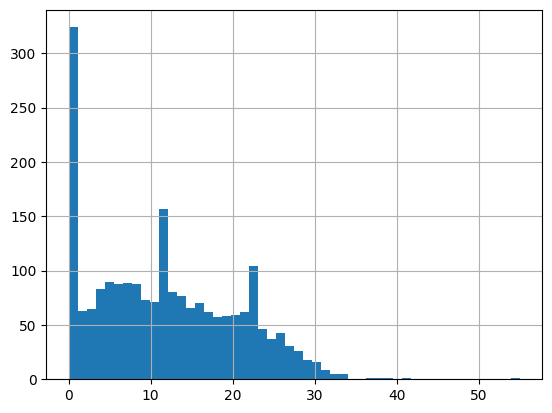

In [37]:
seq_len = [len(i.split()) for i in comments4['Content']]

pd.Series(seq_len).hist(bins = 50)
     

In [38]:
comments4.to_csv('cleaned_reddit4.csv')

# Twitter

In [40]:
df_t = pd.read_csv('labeled_data.csv') #upload data

In [41]:
column_names = ['tweet','class']
tweets = df_t[column_names].copy()
tweets

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [42]:
# Fraction of unique values to maintain
fraction = 0.2

# Shuffle the rows in the DataFrame
shuffled_df = tweets.sample(frac=1, random_state=42)  # Use random_state for reproducibility

# Determine unique values and their counts in the original dataset
unique_values_counts = tweets['class'].value_counts()

# Calculate the number of rows to extract for each unique value
rows_to_extract = {value: int(count * fraction) for value, count in unique_values_counts.items()}

# Extract the required number of rows for each unique value
tweets = []

for value, count in rows_to_extract.items():
    rows_with_value = shuffled_df[shuffled_df['class'] == value]
    tweets.extend(rows_with_value.head(count).values.tolist())

# Create a new DataFrame with the selected rows
tweets = pd.DataFrame(tweets, columns=shuffled_df.columns)

# Print the new DataFrame with the same fraction of unique values
print(tweets)


                                                  tweet  class
0           934 8616\ni got a missed call from yo bitch      1
1     RT @KINGTUNCHI_: Fucking with a bad bitch you ...      1
2     RT @Maxin_Betha Wipe the cum out of them faggo...      1
3     Niggas cheat on they bitch and don't expect no...      1
4     Mother asked what I wanted for Christmas this ...      1
...                                                 ...    ...
4951  &#8220;@SimplyHype: @kobebryant shut the fuck ...      0
4952  @ImToBlame you a fatherless wallet carrying as...      0
4953  For all we know this nigga a rapist. Y'all hoe...      0
4954  RT @HoboKarl: While the men will often be ramb...      0
4955  Is there a full moon out? #CrazyAssholes out i...      0

[4956 rows x 2 columns]


In [43]:
tweets['class'].value_counts()

class
1    3838
2     832
0     286
Name: count, dtype: int64

0 - hate speech, 1- offensive , 2- neither 

In [44]:
tweets = tweets.rename(columns={'tweet':'Content','class':'Label'})

In [45]:
class_label = 0

# Subset the dataset for the given class and number of rows
subset_df = tweets[tweets["Label"] == class_label]
subset_df.Label.value_counts()

Label
0    286
Name: count, dtype: int64

In [46]:
class_label = 2
 # Change this to the desired number of rows

# Subset the dataset for the given class and number of rows
subset_df_2 = tweets[tweets["Label"] == class_label]
subset_df_2.Label.value_counts()

Label
2    832
Name: count, dtype: int64

In [50]:
from sklearn.utils import shuffle

tweets_2 = pd.concat([subset_df,subset_df_2])
tweets_2 = shuffle(tweets_2)
tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, 4046 to 4730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  1118 non-null   object
 1   Label    1118 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.2+ KB


In [51]:
tweets_2['Label'].unique()

array([2, 0])

In [52]:
tweets_2['Label'] = [num if num!=0 else 1 for num in tweets_2['Label']]
tweets_2['Label'] = [num if num!=2 else 0 for num in tweets_2['Label']]

tweets_2['Label'].unique()

array([0, 1])

In [53]:
tweets_2['Label'].value_counts()

Label
0    832
1    286
Name: count, dtype: int64

In [54]:
variable2 = tweets_2['Content'].apply(remove_multiple_spaces)

In [55]:
tweets_2['Content'] = variable2
variable2 = tweets_2['Content'].apply(remove_hyperlinks)
tweets_2['Content'] = variable2


In [56]:
tweets_2

,Content,Label
4046,RT @AishaMoodMills: Fox News mocks victim of R...,0
4215,"@politicsofamy Whoa easy Amy, don't slag the C...",0
3964,Lmaooo naw man RT @DipOnline Yo want in RT @Hu...,0
3880,Just in case the day couldn't get better wife'...,0
4765,@asshole_king pats owner is a kike.,1
...,...,...
4009,RT @MNYves: He's an idiot. RT @M00n_baby: mise...,0
4047,@elise_palmer youre cheating on mickey bubbles...,0
3987,@mis_sarahd @basedpapi1017 tranny,0
4420,RT @mikeimbriano: @briiixo Donnas taxes are go...,0


In [57]:
variable2 = tweets_2['Content'].apply(remove_user_mentions)
tweets_2['Content'] = variable2


In [58]:
variable2 = tweets_2['Content'].apply(emoji2description)


In [59]:
tweets_2['Content']= variable2
tweets_2

,Content,Label
4046,RT : Fox News mocks victim of Ray Rice elevato...,0
4215,"Whoa easy Amy, don't slag the Canucks too muc...",0
3964,Lmaooo naw man RT Yo want in RT : U serious b...,0
3880,Just in case the day couldn't get better wife'...,0
4765,pats owner is a kike.,1
...,...,...
4009,RT : He's an idiot. RT : miserable trash excus...,0
4047,youre cheating on mickey bubbles! :O,0
3987,tranny,0
4420,RT : Donnas taxes are gonna go up.#moulinyan#...,0


In [60]:
variable2 = tweets_2['Content'].apply(remove_new_lines)
tweets_2['Content'] = variable2
variable2 = tweets_2['Content'].apply(remove_noise_symbols)
tweets_2['Content']=variable2
tweets_2['Content']= tweets_2['Content'].str.lower()
tweets_2

,Content,Label
4046,rt : fox news mocks victim of ray rice elevato...,0
4215,"whoa easy amy, dont slag the canucks too much...",0
3964,lmaooo naw man rt yo want in rt : u serious b...,0
3880,just in case the day couldnt get better wifes ...,0
4765,pats owner is a kike.,1
...,...,...
4009,rt : hes an idiot. rt : miserable trash excuse...,0
4047,youre cheating on mickey bubbles :o,0
3987,tranny,0
4420,rt : donnas taxes are gonna go up.#moulinyan#...,0


In [61]:
tweets_2.Content = tweets_2['Content'].apply(clean)
tweets_2

,Content,Label
4046,rt fox news mocks victim of ray rice elevator...,0
4215,whoa easy amy dont slag the canucks too much ...,0
3964,lmaooo naw man rt yo want in rt u serious br...,0
3880,just in case the day couldnt get better wifes ...,0
4765,pats owner is a kike,1
...,...,...
4009,rt hes an idiot rt miserable trash excuse fo...,0
4047,youre cheating on mickey bubbles o,0
3987,tranny,0
4420,rt donnas taxes are gonna go upmoulinyanlol,0


In [62]:
tweets_2.reset_index(drop=True,inplace=True)
tweets_2.to_csv('cleaned_tweets01.csv')

## Gab test

In [74]:
gab = pd.read_csv('length_reduced_gab.csv')
print(gab)

      Unnamed: 0                                               text  Label
0           5019  So, how did they know the baby hadn't been mis...      0
1            488                               Great pic - GM Tom☀️      0
2           3414                           Hello, is this thing on?      0
3           2862               Nice. We're getting a Kosher Switch.      0
4           4674       Listening to the 300: Rise of an Empire OST.      0
...          ...                                                ...    ...
3046         974  whats it like when your team wins that much? d...      0
3047        2593  I can remember back in the 60’s you could buy ...      0
3048        4813  Call me all the names you want but trump still...      0
3049         623                   Let's not forget this either:         0
3050          78                     i dont get why people 404 tbh.      0

[3051 rows x 3 columns]


In [77]:
gab.rename(columns={'text':'Content'},inplace=True)


In [75]:
gab.drop(columns='Unnamed: 0',inplace=True)
gab

,text,Label
0,"So, how did they know the baby hadn't been mis...",0
1,Great pic - GM Tom☀️,0
2,"Hello, is this thing on?",0
3,Nice. We're getting a Kosher Switch.,0
4,Listening to the 300: Rise of an Empire OST.,0
...,...,...
3046,whats it like when your team wins that much? d...,0
3047,I can remember back in the 60’s you could buy ...,0
3048,Call me all the names you want but trump still...,0
3049,Let's not forget this either:,0


In [78]:
gab.columns

Index(['Content', 'Label'], dtype='object')

In [79]:
gab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  3051 non-null   object
 1   Label    3051 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.8+ KB


In [80]:
variable3 = gab['Content'].apply(remove_multiple_spaces)
gab['Content'] = gab['Content'].apply(remove_hyperlinks)
gab['Content'] = gab['Content'].apply(remove_user_mentions)
gab

,Content,Label
0,"So, how did they know the baby hadn't been mis...",0
1,Great pic - GM Tom☀️,0
2,"Hello, is this thing on?",0
3,Nice. We're getting a Kosher Switch.,0
4,Listening to the 300: Rise of an Empire OST.,0
...,...,...
3046,whats it like when your team wins that much? d...,0
3047,I can remember back in the 60’s you could buy ...,0
3048,Call me all the names you want but trump still...,0
3049,Let's not forget this either:,0


In [81]:
gab['Content'] = gab['Content'].apply(emoji2description)


In [82]:
gab['Content'] = gab['Content'].apply(remove_new_lines)
gab['Content'] = gab['Content'].apply(remove_noise_symbols)
gab['Content'] = gab['Content'].apply(clean)
gab.dropna(inplace=True)
gab['Content'] = [date_and_time(t) for t in gab['Content']]

In [83]:
gab['Content'] = gab['Content'].apply(lambda text: expand_contractions(text, contraction))
gab['Content'] = [replace_profanities_with_regex(text, profanities_list) for text in gab['Content']]


In [84]:
gab

,Content,Label
0,so how did they know the baby had not been mis...,0
1,great picture good morning tomsun,0
2,hello is this thing on,0
3,nice were getting a kosher switch,0
4,listening to the rise of an empire ost,0
...,...,...
3046,what is it like when your team wins that much ...,0
3047,i can remember back in the you could buy a me...,0
3048,call me all the names you want but trump still...,0
3049,let us not forget this either,0


In [85]:
gab.to_csv('gab_again2.csv')